In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import lightgbm as lgb
from sklearn.metrics import mean_squared_error,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,LeaveOneOut
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("shen_268_parcellation_networklabels.csv",encoding="utf-8")
filePath = 'D:\jupyter_psychology\Shen268\ROI_FC_r_per\session1'
filePath_list = os.listdir(filePath)
pca_alg = PCA(n_components = 1, whiten=True)
num = [29,34,20,90,50,18,9,18]
num1 = [0,29,63,83,173,223,241,250,268]
net = [10,12,16,52,53,54,56,57,64,65,137,140,145,148,149,150,151,153,156,162,165,183,185,186,187,190,192,194,219,
      1,4,7,8,9,14,17,19,21,22,30,31,47,48,55,70,111,112,116,139,142,143,147,154,157,164,182,184,193,196,199,242,246,247,
      3,5,6,13,49,50,85,86,90,96,115,134,138,141,203,222,223,225,227,239,
      2,11,15,18,20,28,29,32,36,44,83,88,91,93,94,95,99,101,103,104,105,106,107,108,110,113,114,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,135,136,144,146,152,155,169,178,217,220,221,224,226,229,230,231,232,233,234,236,237,238,243,244,245,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,
      23,24,25,26,27,33,34,35,37,38,39,40,45,46,51,58,60,61,62,63,84,89,92,97,109,158,159,160,161,163,166,167,168,170,171,172,173,174,179,180,181,188,189,191,195,197,202,218,228,235,
      42,68,72,75,77,79,80,82,87,98,176,198,205,207,208,211,215,216,
      76,78,81,100,102,212,213,214,241,
      41,43,59,66,67,69,71,73,74,175,177,200,201,204,206,209,210,240]

train_Y = []
train_X = np.empty(shape=[0,1082],dtype=float)

for fp in filePath_list:
    fp_a = ['D:\jupyter_psychology\Shen268\ROI_FC_r_per\session1\\'+fp,'D:\jupyter_psychology\Shen268\ROI_FC_r_per\session2\\'+fp,'D:\jupyter_psychology\Shen268\ROI_FC_r_per\session3\\'+fp]
    train_Y = np.append(train_Y,[0,1,2],axis=0)
    for s in range(3):
        data =  np.loadtxt(fp_a[s])
        #print(data)
        tmp = np.empty(shape=[0,268],dtype=float)
        #行排列
        for i in range(268):
            tmp = np.append(tmp,[data[net[i]-1,:]],axis=0)
        data =  np.empty(shape=[0,268],dtype=float)
        #列排列，8*8网络
        for i in range(268):
            data = np.append(data,[tmp[:,net[i]-1]],axis=0)
        #print(data)
        net_cnct = []
        for i in range(8):
            for j in range(i+1):
                network = data[num1[i]:num1[i+1],num1[j]:num1[j+1]]
                #print(network)
                network = pca_alg.fit_transform(network)
                network = network.ravel()
                net_cnct.extend(list(network))
                #print(net_cnct)
                #train_X[i][j].append(list(network))
                #train_X[i][j] = np.empty(shape=[0,num1[i+1]],dtype=float)
                #train_X[i][j] = np.append(train_X[i][j],[network],axis=0)
        train_X = np.append(train_X,[np.array(net_cnct)],axis=0)
    #break;

In [3]:
# 数据划分
train_x = train_X[:159]
train_y = train_Y[:159]
test_x = train_X[159:]
test_y = train_Y[159:]
# 数据标准化 特征标度
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_x)
X_test = scaler.transform(test_x)

[1]	valid_0's multi_logloss: 1.10118
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10477
[3]	valid_0's multi_logloss: 1.10716
[4]	valid_0's multi_logloss: 1.10312
[5]	valid_0's multi_logloss: 1.10593
[6]	valid_0's multi_logloss: 1.11307
[7]	valid_0's multi_logloss: 1.11052
[8]	valid_0's multi_logloss: 1.11244
[9]	valid_0's multi_logloss: 1.11043
[10]	valid_0's multi_logloss: 1.11403
[11]	valid_0's multi_logloss: 1.11252
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10118
[1]	valid_0's multi_logloss: 1.1023
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10661
[3]	valid_0's multi_logloss: 1.10932
[4]	valid_0's multi_logloss: 1.10696
[5]	valid_0's multi_logloss: 1.11211
[6]	valid_0's multi_logloss: 1.11676
[7]	valid_0's multi_logloss: 1.11856
[8]	valid_0's multi_logloss: 1.11941
[9]	valid_0's multi_logloss: 1.11639
[10]	valid_0's multi_logloss: 1.12191
[11]	valid_0's multi_loglos

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


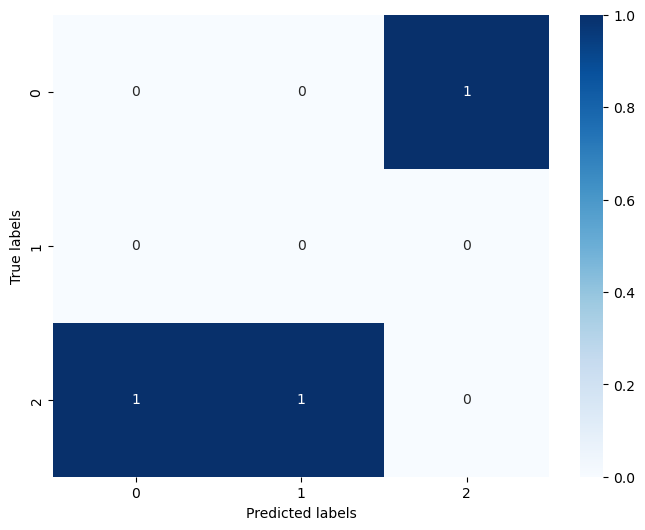

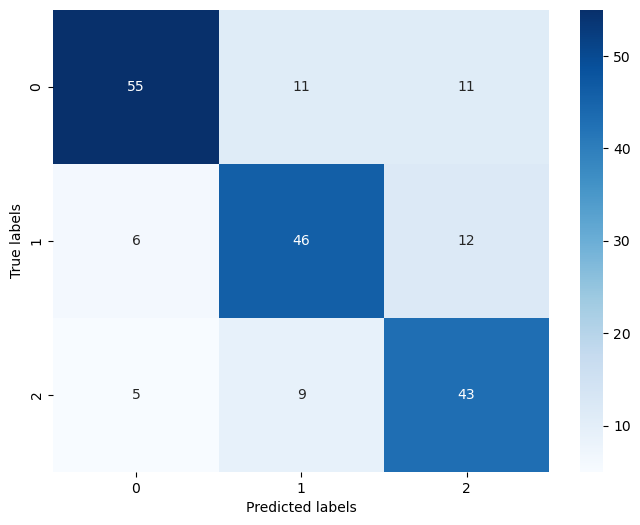

[1]	valid_0's multi_logloss: 1.09914
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09868
[3]	valid_0's multi_logloss: 1.09894
[4]	valid_0's multi_logloss: 1.09706
[5]	valid_0's multi_logloss: 1.10209
[6]	valid_0's multi_logloss: 1.10314
[7]	valid_0's multi_logloss: 1.10442
[8]	valid_0's multi_logloss: 1.10376
[9]	valid_0's multi_logloss: 1.10355
[10]	valid_0's multi_logloss: 1.10514
[11]	valid_0's multi_logloss: 1.10048
[12]	valid_0's multi_logloss: 1.10195
[13]	valid_0's multi_logloss: 1.10409
[14]	valid_0's multi_logloss: 1.10198
Early stopping, best iteration is:
[4]	valid_0's multi_logloss: 1.09706
[1]	valid_0's multi_logloss: 1.09883
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09985
[3]	valid_0's multi_logloss: 1.09808
[4]	valid_0's multi_logloss: 1.09655
[5]	valid_0's multi_logloss: 1.09786
[6]	valid_0's multi_logloss: 1.10396
[7]	valid_0's multi_logloss: 1.10238
[8]	valid_0's multi_logl

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


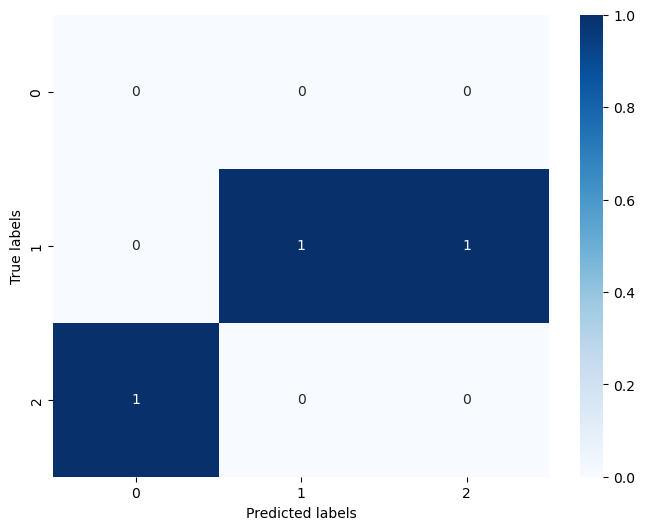

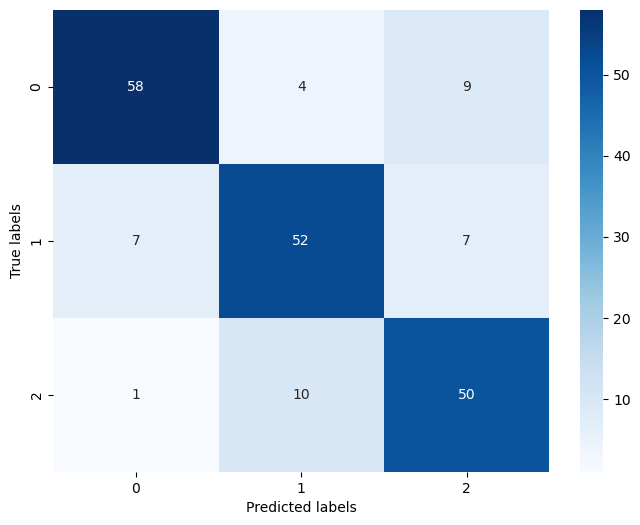

[1]	valid_0's multi_logloss: 1.10079
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10303
[3]	valid_0's multi_logloss: 1.10374
[4]	valid_0's multi_logloss: 1.1062
[5]	valid_0's multi_logloss: 1.10662
[6]	valid_0's multi_logloss: 1.10993
[7]	valid_0's multi_logloss: 1.11145
[8]	valid_0's multi_logloss: 1.11108
[9]	valid_0's multi_logloss: 1.11117
[10]	valid_0's multi_logloss: 1.11349
[11]	valid_0's multi_logloss: 1.11633
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10079
[1]	valid_0's multi_logloss: 1.10019
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10363
[3]	valid_0's multi_logloss: 1.1048
[4]	valid_0's multi_logloss: 1.10675
[5]	valid_0's multi_logloss: 1.1045
[6]	valid_0's multi_logloss: 1.1087
[7]	valid_0's multi_logloss: 1.1079
[8]	valid_0's multi_logloss: 1.10823
[9]	valid_0's multi_logloss: 1.10997
[10]	valid_0's multi_logloss: 1.11311
[11]	valid_0's multi_logloss: 1

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


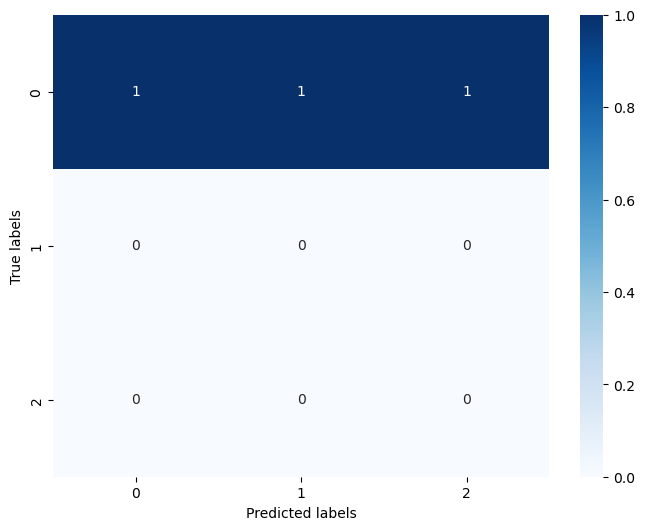

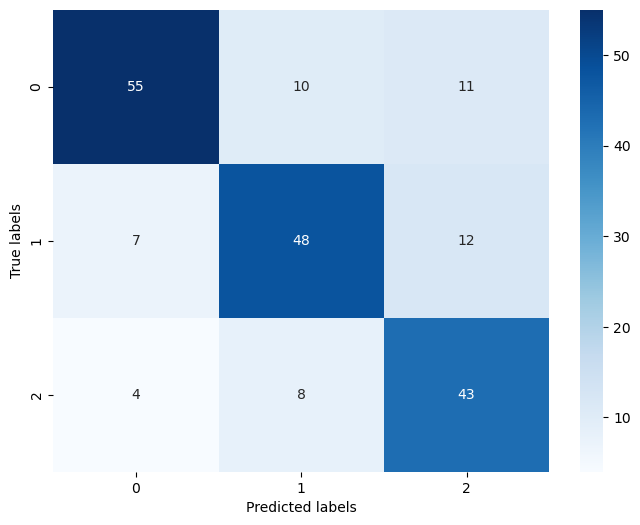

[1]	valid_0's multi_logloss: 1.09687
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.0963
[3]	valid_0's multi_logloss: 1.09543
[4]	valid_0's multi_logloss: 1.09109
[5]	valid_0's multi_logloss: 1.08937
[6]	valid_0's multi_logloss: 1.08554
[7]	valid_0's multi_logloss: 1.08938
[8]	valid_0's multi_logloss: 1.08861
[9]	valid_0's multi_logloss: 1.0855
[10]	valid_0's multi_logloss: 1.08806
[11]	valid_0's multi_logloss: 1.08452
[12]	valid_0's multi_logloss: 1.08026
[13]	valid_0's multi_logloss: 1.08226
[14]	valid_0's multi_logloss: 1.07783
[15]	valid_0's multi_logloss: 1.08072
[16]	valid_0's multi_logloss: 1.07915
[17]	valid_0's multi_logloss: 1.08318
[18]	valid_0's multi_logloss: 1.08449
[19]	valid_0's multi_logloss: 1.09058
[20]	valid_0's multi_logloss: 1.09265
[21]	valid_0's multi_logloss: 1.09914
[22]	valid_0's multi_logloss: 1.09501
[23]	valid_0's multi_logloss: 1.09634
[24]	valid_0's multi_logloss: 1.09967
Early stopping, best iteration is:
[14

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


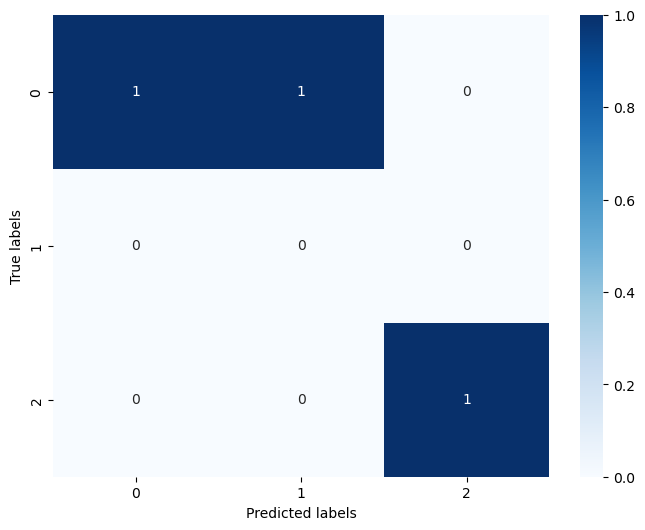

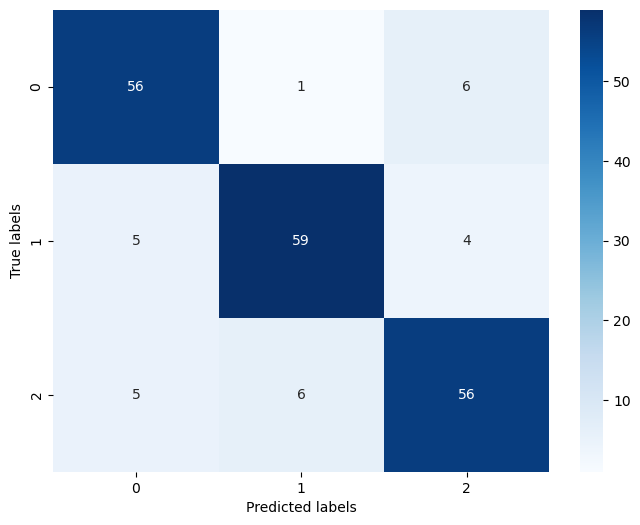

[1]	valid_0's multi_logloss: 1.101
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09886
[3]	valid_0's multi_logloss: 1.09742
[4]	valid_0's multi_logloss: 1.09821
[5]	valid_0's multi_logloss: 1.10057
[6]	valid_0's multi_logloss: 1.09834
[7]	valid_0's multi_logloss: 1.09967
[8]	valid_0's multi_logloss: 1.09719
[9]	valid_0's multi_logloss: 1.09039
[10]	valid_0's multi_logloss: 1.09049
[11]	valid_0's multi_logloss: 1.09102
[12]	valid_0's multi_logloss: 1.09123
[13]	valid_0's multi_logloss: 1.09064
[14]	valid_0's multi_logloss: 1.09128
[15]	valid_0's multi_logloss: 1.09175
[16]	valid_0's multi_logloss: 1.08717
[17]	valid_0's multi_logloss: 1.08724
[18]	valid_0's multi_logloss: 1.08219
[19]	valid_0's multi_logloss: 1.08048
[20]	valid_0's multi_logloss: 1.08008
[21]	valid_0's multi_logloss: 1.07705
[22]	valid_0's multi_logloss: 1.07802
[23]	valid_0's multi_logloss: 1.07753
[24]	valid_0's multi_logloss: 1.08074
[25]	valid_0's multi_logloss: 1.08418


D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


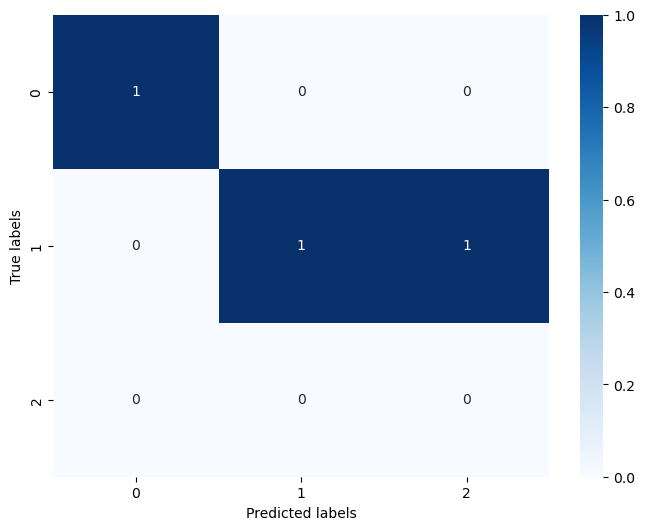

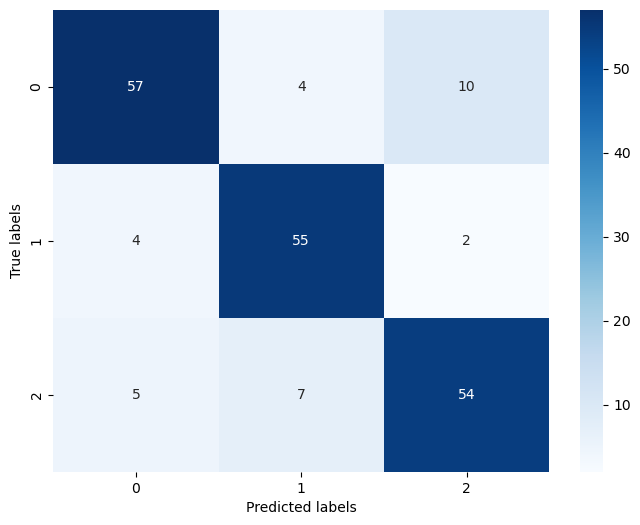

[1]	valid_0's multi_logloss: 1.09937
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10084
[3]	valid_0's multi_logloss: 1.09931
[4]	valid_0's multi_logloss: 1.09515
[5]	valid_0's multi_logloss: 1.09293
[6]	valid_0's multi_logloss: 1.09264
[7]	valid_0's multi_logloss: 1.09132
[8]	valid_0's multi_logloss: 1.08993
[9]	valid_0's multi_logloss: 1.09204
[10]	valid_0's multi_logloss: 1.09622
[11]	valid_0's multi_logloss: 1.09785
[12]	valid_0's multi_logloss: 1.09558
[13]	valid_0's multi_logloss: 1.09723
[14]	valid_0's multi_logloss: 1.09681
[15]	valid_0's multi_logloss: 1.09658
[16]	valid_0's multi_logloss: 1.09861
[17]	valid_0's multi_logloss: 1.09742
[18]	valid_0's multi_logloss: 1.10039
Early stopping, best iteration is:
[8]	valid_0's multi_logloss: 1.08993
[1]	valid_0's multi_logloss: 1.10033
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10006
[3]	valid_0's multi_logloss: 1.10067
[4]	valid_0's multi_

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


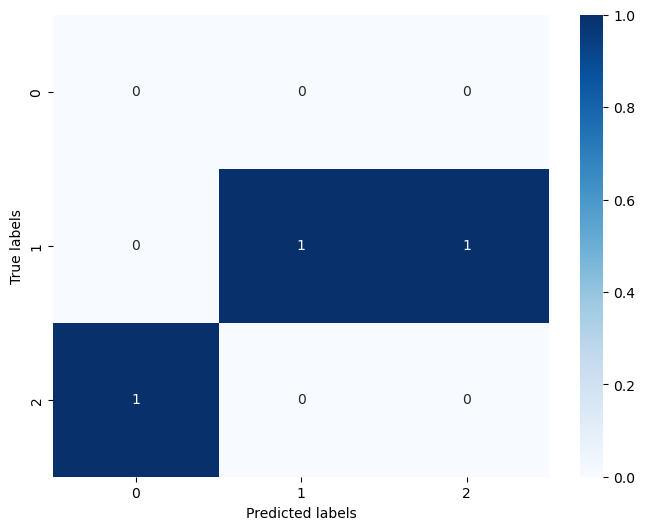

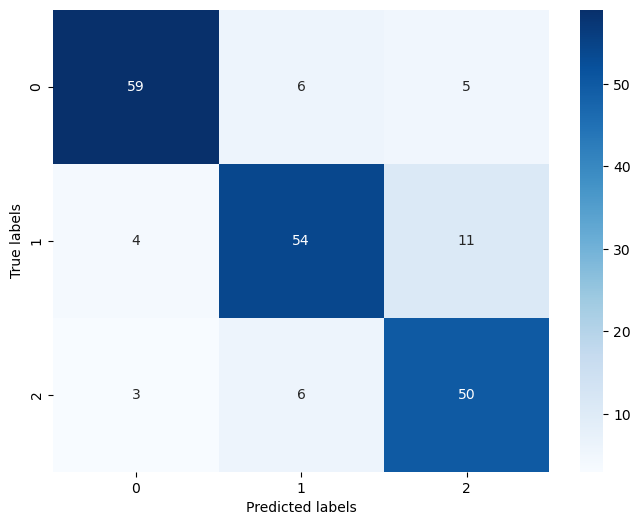

[1]	valid_0's multi_logloss: 1.10025
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10057
[3]	valid_0's multi_logloss: 1.10121
[4]	valid_0's multi_logloss: 1.10032
[5]	valid_0's multi_logloss: 1.09964
[6]	valid_0's multi_logloss: 1.0988
[7]	valid_0's multi_logloss: 1.09887
[8]	valid_0's multi_logloss: 1.09667
[9]	valid_0's multi_logloss: 1.09977
[10]	valid_0's multi_logloss: 1.1001
[11]	valid_0's multi_logloss: 1.09788
[12]	valid_0's multi_logloss: 1.09552
[13]	valid_0's multi_logloss: 1.09623
[14]	valid_0's multi_logloss: 1.09416
[15]	valid_0's multi_logloss: 1.09521
[16]	valid_0's multi_logloss: 1.09039
[17]	valid_0's multi_logloss: 1.08774
[18]	valid_0's multi_logloss: 1.08876
[19]	valid_0's multi_logloss: 1.08856
[20]	valid_0's multi_logloss: 1.08685
[21]	valid_0's multi_logloss: 1.0879
[22]	valid_0's multi_logloss: 1.08196
[23]	valid_0's multi_logloss: 1.08512
[24]	valid_0's multi_logloss: 1.08405
[25]	valid_0's multi_logloss: 1.08187
[

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


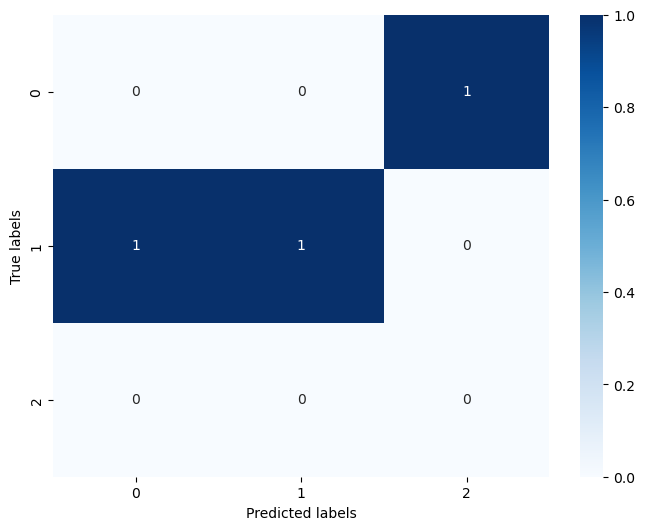

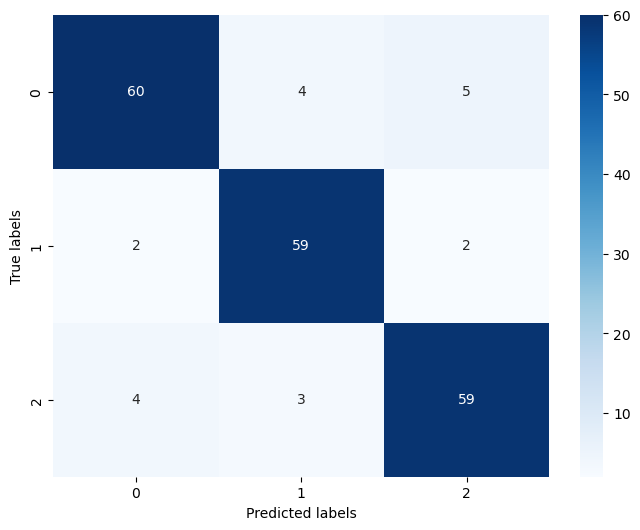

[1]	valid_0's multi_logloss: 1.09617
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09071
[3]	valid_0's multi_logloss: 1.08536
[4]	valid_0's multi_logloss: 1.08894
[5]	valid_0's multi_logloss: 1.08712
[6]	valid_0's multi_logloss: 1.08549
[7]	valid_0's multi_logloss: 1.07594
[8]	valid_0's multi_logloss: 1.06902
[9]	valid_0's multi_logloss: 1.07231
[10]	valid_0's multi_logloss: 1.0716
[11]	valid_0's multi_logloss: 1.06913
[12]	valid_0's multi_logloss: 1.0647
[13]	valid_0's multi_logloss: 1.05945
[14]	valid_0's multi_logloss: 1.05211
[15]	valid_0's multi_logloss: 1.04769
[16]	valid_0's multi_logloss: 1.0449
[17]	valid_0's multi_logloss: 1.04773
[18]	valid_0's multi_logloss: 1.04952
[19]	valid_0's multi_logloss: 1.04838
[20]	valid_0's multi_logloss: 1.04617
[21]	valid_0's multi_logloss: 1.04523
[22]	valid_0's multi_logloss: 1.04063
[23]	valid_0's multi_logloss: 1.03485
[24]	valid_0's multi_logloss: 1.03103
[25]	valid_0's multi_logloss: 1.02541
[

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


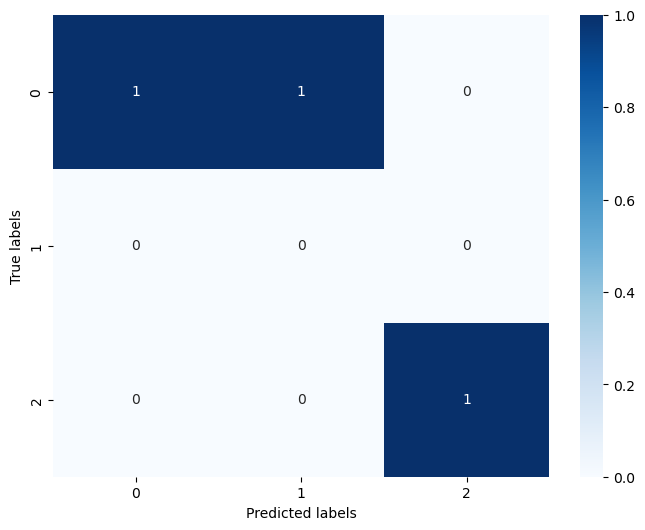

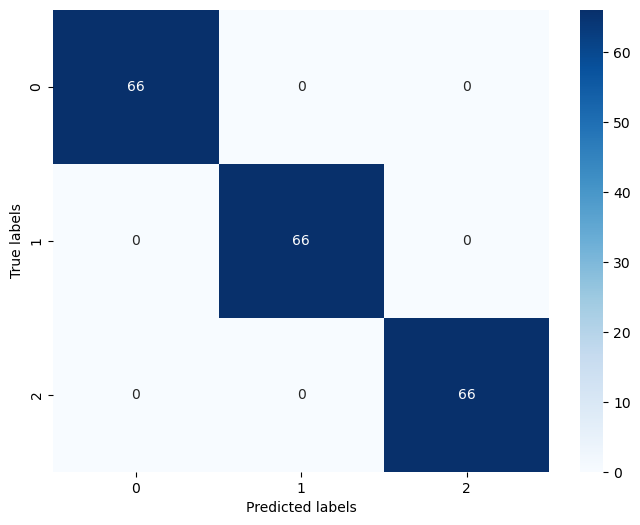

[1]	valid_0's multi_logloss: 1.09286
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08832
[3]	valid_0's multi_logloss: 1.08053
[4]	valid_0's multi_logloss: 1.08168
[5]	valid_0's multi_logloss: 1.07735
[6]	valid_0's multi_logloss: 1.07331
[7]	valid_0's multi_logloss: 1.06861
[8]	valid_0's multi_logloss: 1.06985
[9]	valid_0's multi_logloss: 1.06733
[10]	valid_0's multi_logloss: 1.06744
[11]	valid_0's multi_logloss: 1.06221
[12]	valid_0's multi_logloss: 1.05912
[13]	valid_0's multi_logloss: 1.05799
[14]	valid_0's multi_logloss: 1.05293
[15]	valid_0's multi_logloss: 1.05532
[16]	valid_0's multi_logloss: 1.05303
[17]	valid_0's multi_logloss: 1.04771
[18]	valid_0's multi_logloss: 1.04656
[19]	valid_0's multi_logloss: 1.04673
[20]	valid_0's multi_logloss: 1.04911
[21]	valid_0's multi_logloss: 1.05269
[22]	valid_0's multi_logloss: 1.05378
[23]	valid_0's multi_logloss: 1.05363
[24]	valid_0's multi_logloss: 1.04933
[25]	valid_0's multi_logloss: 1.051


D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


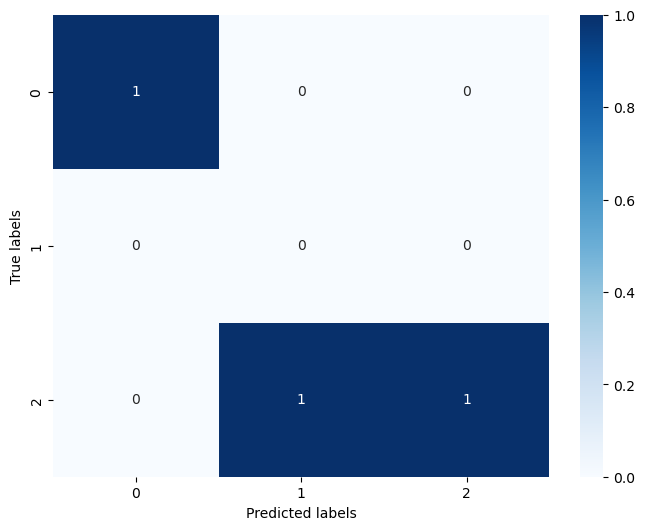

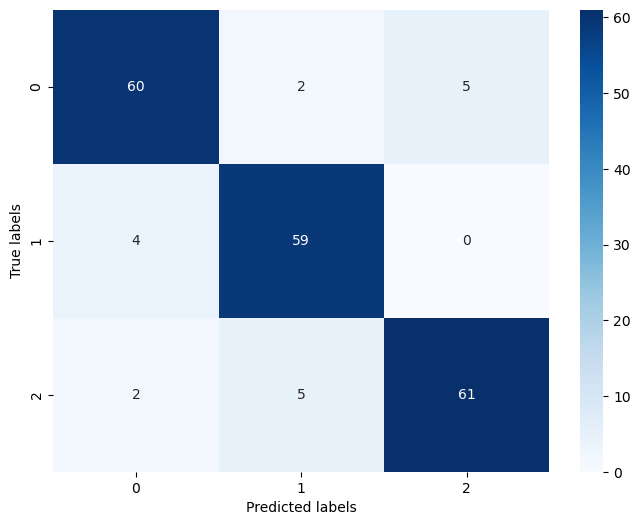

[1]	valid_0's multi_logloss: 1.09969
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10128
[3]	valid_0's multi_logloss: 1.10492
[4]	valid_0's multi_logloss: 1.10537
[5]	valid_0's multi_logloss: 1.10792
[6]	valid_0's multi_logloss: 1.10586
[7]	valid_0's multi_logloss: 1.10588
[8]	valid_0's multi_logloss: 1.1065
[9]	valid_0's multi_logloss: 1.10359
[10]	valid_0's multi_logloss: 1.10278
[11]	valid_0's multi_logloss: 1.09986
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09969
[1]	valid_0's multi_logloss: 1.09959
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.1026
[3]	valid_0's multi_logloss: 1.10617
[4]	valid_0's multi_logloss: 1.10702
[5]	valid_0's multi_logloss: 1.1103
[6]	valid_0's multi_logloss: 1.10988
[7]	valid_0's multi_logloss: 1.11049
[8]	valid_0's multi_logloss: 1.11503
[9]	valid_0's multi_logloss: 1.11349
[10]	valid_0's multi_logloss: 1.11032
[11]	valid_0's multi_logloss:

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


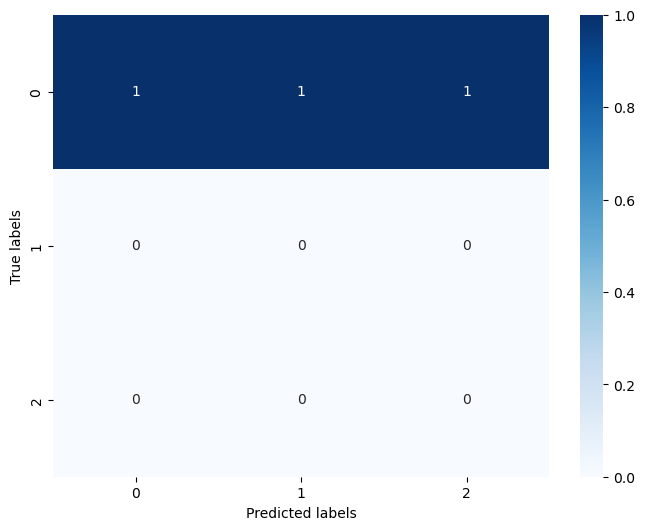

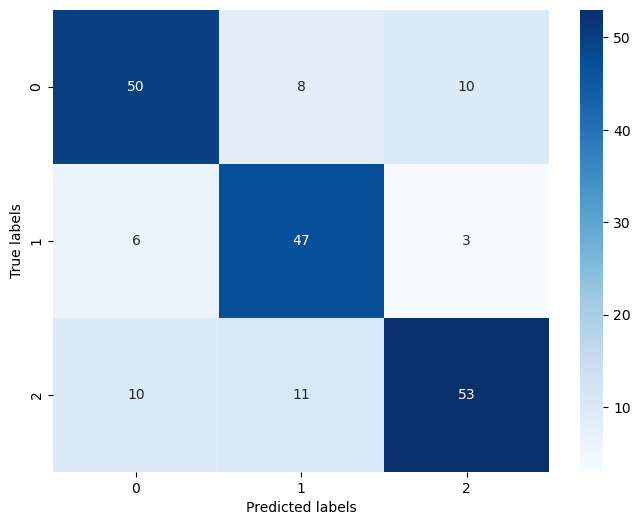

[1]	valid_0's multi_logloss: 1.09953
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.1013
[3]	valid_0's multi_logloss: 1.09646
[4]	valid_0's multi_logloss: 1.09766
[5]	valid_0's multi_logloss: 1.09737
[6]	valid_0's multi_logloss: 1.10192
[7]	valid_0's multi_logloss: 1.1027
[8]	valid_0's multi_logloss: 1.10498
[9]	valid_0's multi_logloss: 1.10962
[10]	valid_0's multi_logloss: 1.1097
[11]	valid_0's multi_logloss: 1.11222
[12]	valid_0's multi_logloss: 1.11457
[13]	valid_0's multi_logloss: 1.11415
Early stopping, best iteration is:
[3]	valid_0's multi_logloss: 1.09646
[1]	valid_0's multi_logloss: 1.09671
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.0957
[3]	valid_0's multi_logloss: 1.08977
[4]	valid_0's multi_logloss: 1.09088
[5]	valid_0's multi_logloss: 1.08809
[6]	valid_0's multi_logloss: 1.08947
[7]	valid_0's multi_logloss: 1.0895
[8]	valid_0's multi_logloss: 1.09136
[9]	valid_0's multi_logloss: 1

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


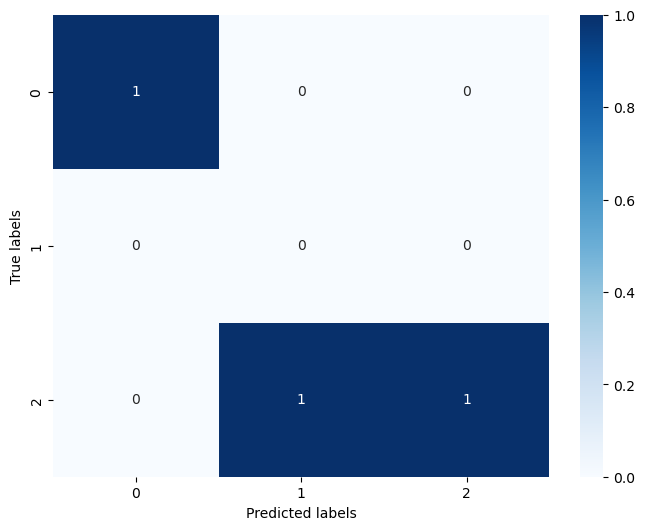

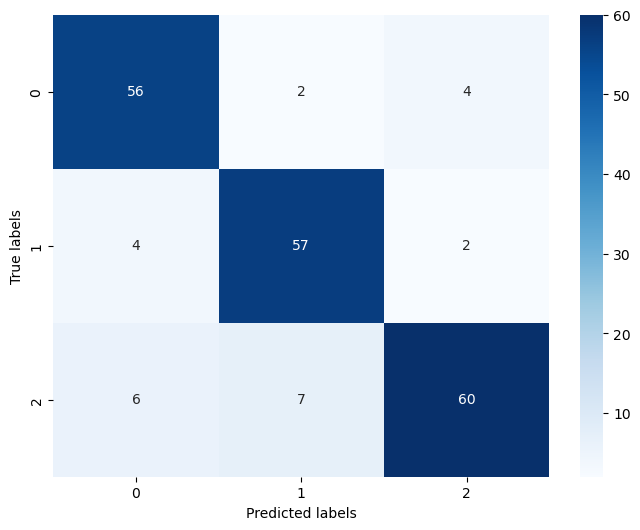

[1]	valid_0's multi_logloss: 1.09934
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10559
[3]	valid_0's multi_logloss: 1.11126
[4]	valid_0's multi_logloss: 1.11894
[5]	valid_0's multi_logloss: 1.12365
[6]	valid_0's multi_logloss: 1.12892
[7]	valid_0's multi_logloss: 1.13391
[8]	valid_0's multi_logloss: 1.13371
[9]	valid_0's multi_logloss: 1.13559
[10]	valid_0's multi_logloss: 1.14529
[11]	valid_0's multi_logloss: 1.14747
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09934
[1]	valid_0's multi_logloss: 1.09945
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10444
[3]	valid_0's multi_logloss: 1.11133
[4]	valid_0's multi_logloss: 1.12067
[5]	valid_0's multi_logloss: 1.12691
[6]	valid_0's multi_logloss: 1.13353
[7]	valid_0's multi_logloss: 1.13357
[8]	valid_0's multi_logloss: 1.13888
[9]	valid_0's multi_logloss: 1.1413
[10]	valid_0's multi_logloss: 1.15043
[11]	valid_0's multi_loglos

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


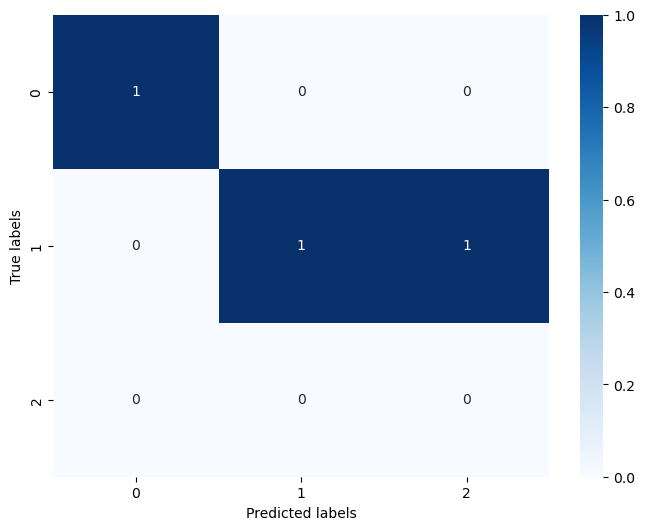

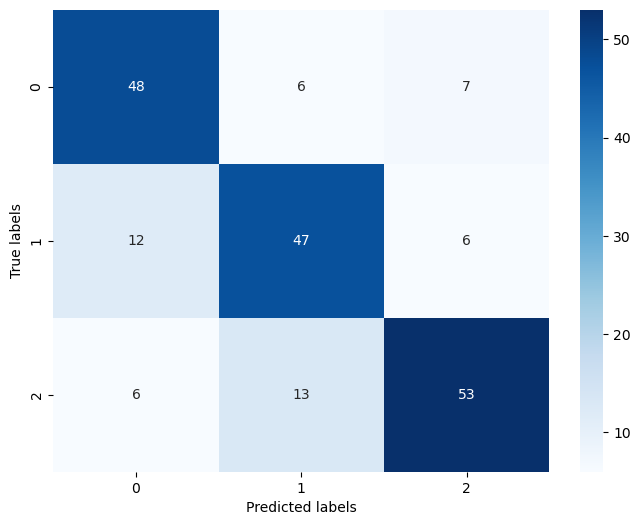

[1]	valid_0's multi_logloss: 1.09712
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09343
[3]	valid_0's multi_logloss: 1.09214
[4]	valid_0's multi_logloss: 1.09058
[5]	valid_0's multi_logloss: 1.08887
[6]	valid_0's multi_logloss: 1.08577
[7]	valid_0's multi_logloss: 1.08609
[8]	valid_0's multi_logloss: 1.08354
[9]	valid_0's multi_logloss: 1.08287
[10]	valid_0's multi_logloss: 1.08241
[11]	valid_0's multi_logloss: 1.07986
[12]	valid_0's multi_logloss: 1.08119
[13]	valid_0's multi_logloss: 1.07952
[14]	valid_0's multi_logloss: 1.07622
[15]	valid_0's multi_logloss: 1.07603
[16]	valid_0's multi_logloss: 1.07406
[17]	valid_0's multi_logloss: 1.0714
[18]	valid_0's multi_logloss: 1.06618
[19]	valid_0's multi_logloss: 1.06491
[20]	valid_0's multi_logloss: 1.06207
[21]	valid_0's multi_logloss: 1.06236
[22]	valid_0's multi_logloss: 1.05938
[23]	valid_0's multi_logloss: 1.05742
[24]	valid_0's multi_logloss: 1.05839
[25]	valid_0's multi_logloss: 1.05602

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


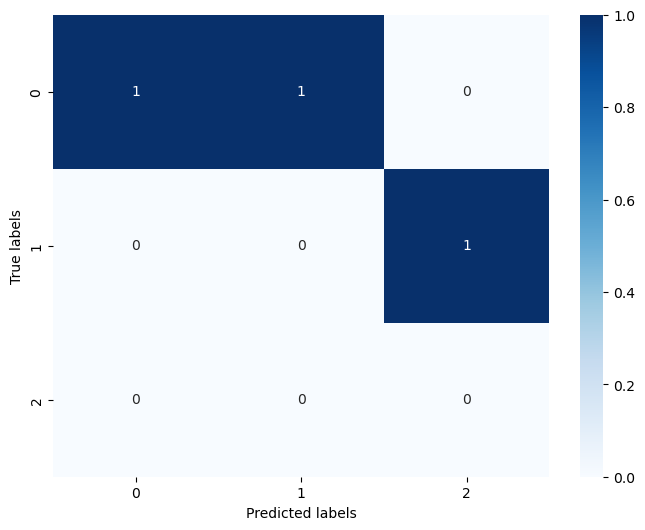

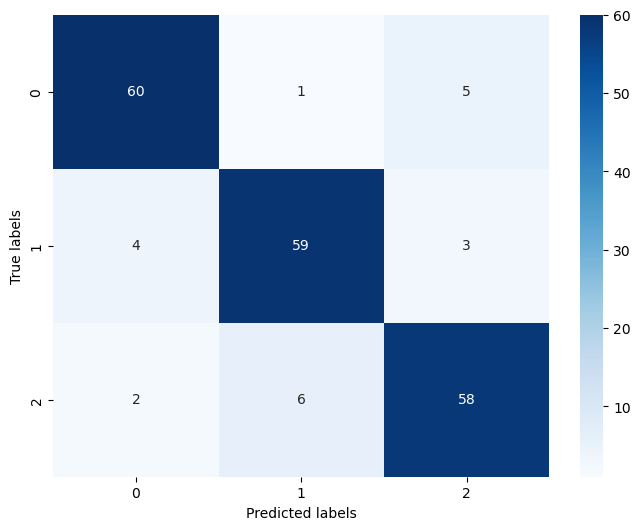

[1]	valid_0's multi_logloss: 1.10152
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10491
[3]	valid_0's multi_logloss: 1.11039
[4]	valid_0's multi_logloss: 1.1128
[5]	valid_0's multi_logloss: 1.11761
[6]	valid_0's multi_logloss: 1.12019
[7]	valid_0's multi_logloss: 1.12494
[8]	valid_0's multi_logloss: 1.13041
[9]	valid_0's multi_logloss: 1.12507
[10]	valid_0's multi_logloss: 1.12417
[11]	valid_0's multi_logloss: 1.12332
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10152
[1]	valid_0's multi_logloss: 1.10239
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10563
[3]	valid_0's multi_logloss: 1.11155
[4]	valid_0's multi_logloss: 1.11571
[5]	valid_0's multi_logloss: 1.12096
[6]	valid_0's multi_logloss: 1.12336
[7]	valid_0's multi_logloss: 1.12854
[8]	valid_0's multi_logloss: 1.13261
[9]	valid_0's multi_logloss: 1.12655
[10]	valid_0's multi_logloss: 1.12508
[11]	valid_0's multi_loglos

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


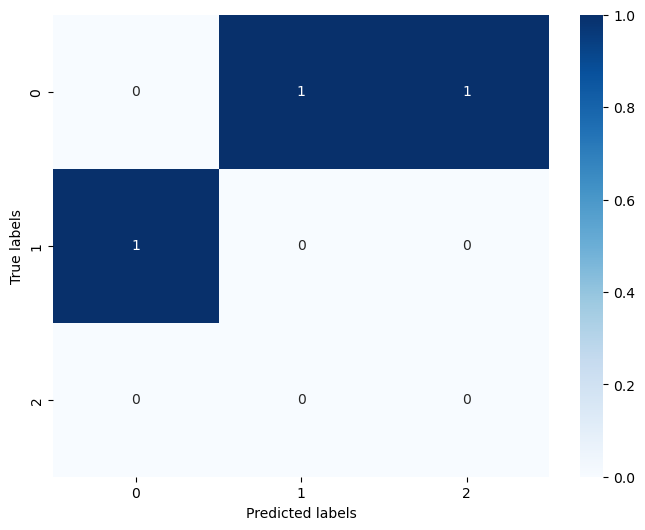

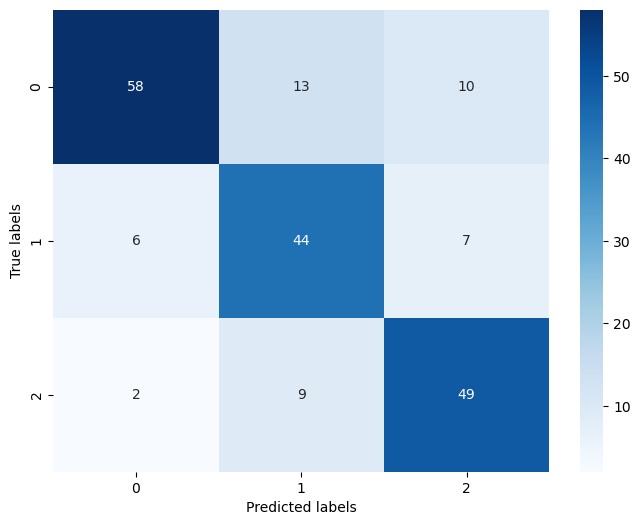

[1]	valid_0's multi_logloss: 1.10116
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10377
[3]	valid_0's multi_logloss: 1.10122
[4]	valid_0's multi_logloss: 1.10141
[5]	valid_0's multi_logloss: 1.09942
[6]	valid_0's multi_logloss: 1.10007
[7]	valid_0's multi_logloss: 1.09938
[8]	valid_0's multi_logloss: 1.09928
[9]	valid_0's multi_logloss: 1.10201
[10]	valid_0's multi_logloss: 1.10006
[11]	valid_0's multi_logloss: 1.1004
[12]	valid_0's multi_logloss: 1.09915
[13]	valid_0's multi_logloss: 1.09934
[14]	valid_0's multi_logloss: 1.10055
[15]	valid_0's multi_logloss: 1.09816
[16]	valid_0's multi_logloss: 1.09633
[17]	valid_0's multi_logloss: 1.09426
[18]	valid_0's multi_logloss: 1.08702
[19]	valid_0's multi_logloss: 1.08605
[20]	valid_0's multi_logloss: 1.08422
[21]	valid_0's multi_logloss: 1.08688
[22]	valid_0's multi_logloss: 1.08457
[23]	valid_0's multi_logloss: 1.0887
[24]	valid_0's multi_logloss: 1.08585
[25]	valid_0's multi_logloss: 1.08593


D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


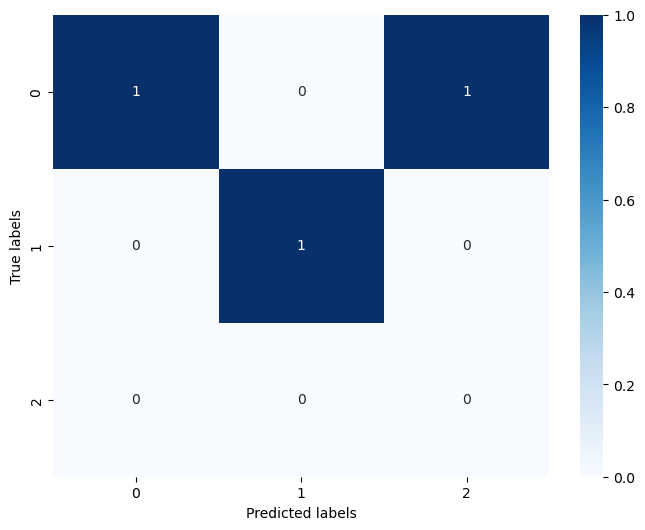

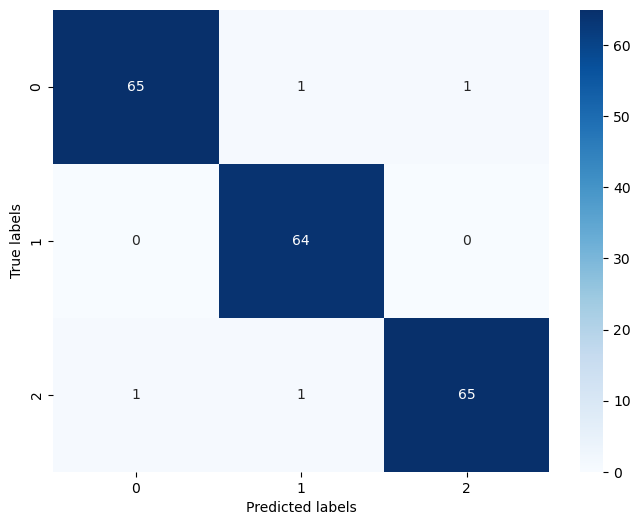

[1]	valid_0's multi_logloss: 1.09651
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09645
[3]	valid_0's multi_logloss: 1.08954
[4]	valid_0's multi_logloss: 1.09142
[5]	valid_0's multi_logloss: 1.08885
[6]	valid_0's multi_logloss: 1.08698
[7]	valid_0's multi_logloss: 1.08938
[8]	valid_0's multi_logloss: 1.08959
[9]	valid_0's multi_logloss: 1.08485
[10]	valid_0's multi_logloss: 1.08347
[11]	valid_0's multi_logloss: 1.07968
[12]	valid_0's multi_logloss: 1.07828
[13]	valid_0's multi_logloss: 1.07196
[14]	valid_0's multi_logloss: 1.07171
[15]	valid_0's multi_logloss: 1.06807
[16]	valid_0's multi_logloss: 1.0682
[17]	valid_0's multi_logloss: 1.069
[18]	valid_0's multi_logloss: 1.06845
[19]	valid_0's multi_logloss: 1.06282
[20]	valid_0's multi_logloss: 1.05688
[21]	valid_0's multi_logloss: 1.05871
[22]	valid_0's multi_logloss: 1.05819
[23]	valid_0's multi_logloss: 1.05448
[24]	valid_0's multi_logloss: 1.05285
[25]	valid_0's multi_logloss: 1.05117
[

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


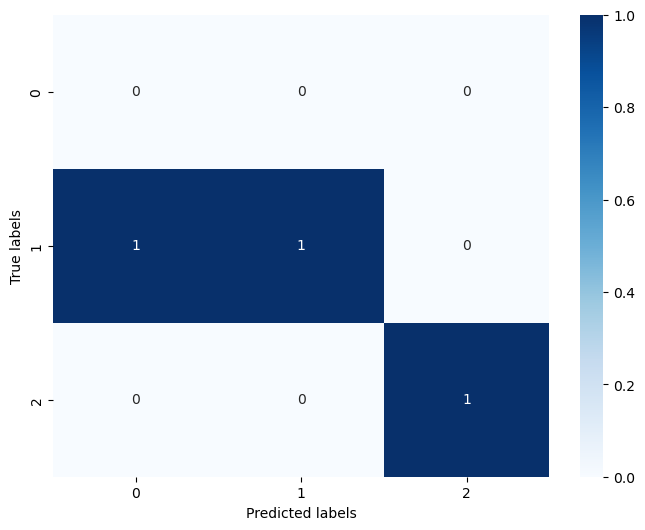

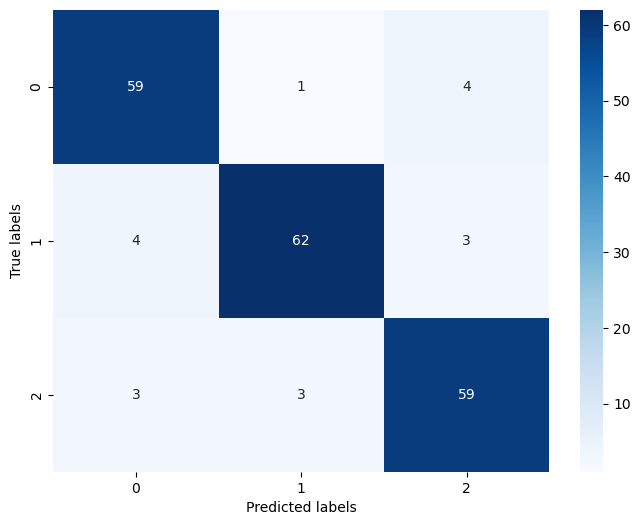

[1]	valid_0's multi_logloss: 1.09252
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08923
[3]	valid_0's multi_logloss: 1.08651
[4]	valid_0's multi_logloss: 1.09246
[5]	valid_0's multi_logloss: 1.08821
[6]	valid_0's multi_logloss: 1.08624
[7]	valid_0's multi_logloss: 1.08653
[8]	valid_0's multi_logloss: 1.08367
[9]	valid_0's multi_logloss: 1.07958
[10]	valid_0's multi_logloss: 1.07594
[11]	valid_0's multi_logloss: 1.07705
[12]	valid_0's multi_logloss: 1.07881
[13]	valid_0's multi_logloss: 1.07705
[14]	valid_0's multi_logloss: 1.07485
[15]	valid_0's multi_logloss: 1.07022
[16]	valid_0's multi_logloss: 1.07308
[17]	valid_0's multi_logloss: 1.06938
[18]	valid_0's multi_logloss: 1.06712
[19]	valid_0's multi_logloss: 1.06649
[20]	valid_0's multi_logloss: 1.06945
[21]	valid_0's multi_logloss: 1.07014
[22]	valid_0's multi_logloss: 1.06836
[23]	valid_0's multi_logloss: 1.06832
[24]	valid_0's multi_logloss: 1.07236
[25]	valid_0's multi_logloss: 1.0682

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


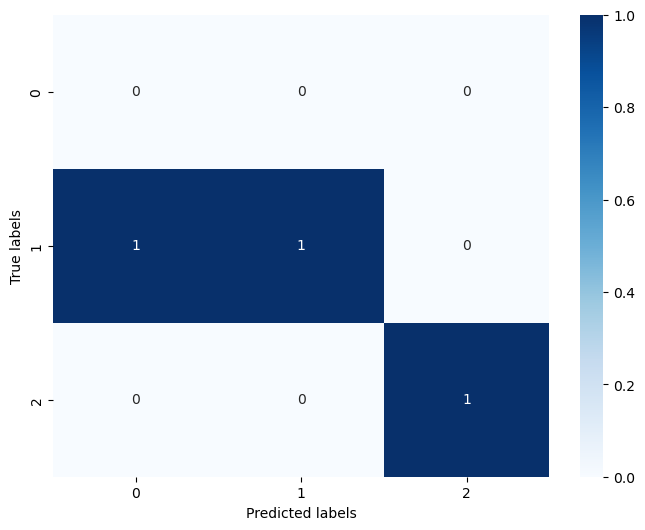

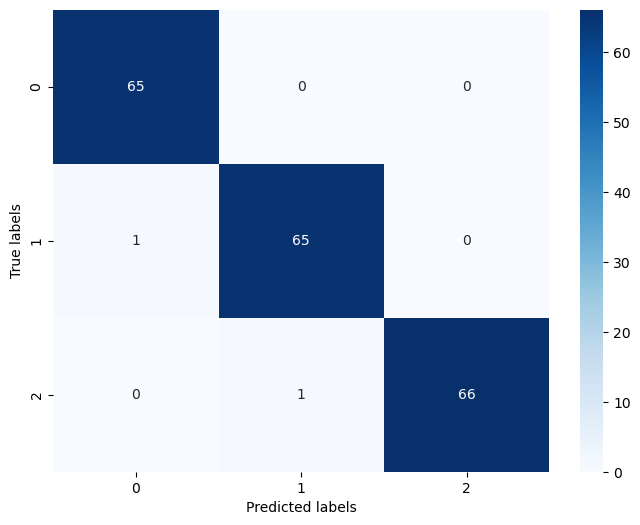

[1]	valid_0's multi_logloss: 1.09674
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08698
[3]	valid_0's multi_logloss: 1.08662
[4]	valid_0's multi_logloss: 1.08436
[5]	valid_0's multi_logloss: 1.08493
[6]	valid_0's multi_logloss: 1.08606
[7]	valid_0's multi_logloss: 1.07638
[8]	valid_0's multi_logloss: 1.07365
[9]	valid_0's multi_logloss: 1.07665
[10]	valid_0's multi_logloss: 1.08091
[11]	valid_0's multi_logloss: 1.07831
[12]	valid_0's multi_logloss: 1.07484
[13]	valid_0's multi_logloss: 1.07153
[14]	valid_0's multi_logloss: 1.07042
[15]	valid_0's multi_logloss: 1.07171
[16]	valid_0's multi_logloss: 1.06704
[17]	valid_0's multi_logloss: 1.06552
[18]	valid_0's multi_logloss: 1.06442
[19]	valid_0's multi_logloss: 1.06388
[20]	valid_0's multi_logloss: 1.06558
[21]	valid_0's multi_logloss: 1.06605
[22]	valid_0's multi_logloss: 1.0651
[23]	valid_0's multi_logloss: 1.06128
[24]	valid_0's multi_logloss: 1.05932
[25]	valid_0's multi_logloss: 1.06096

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


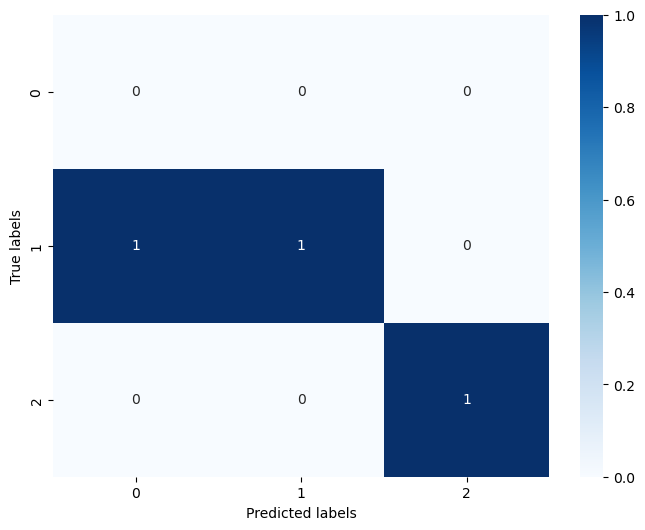

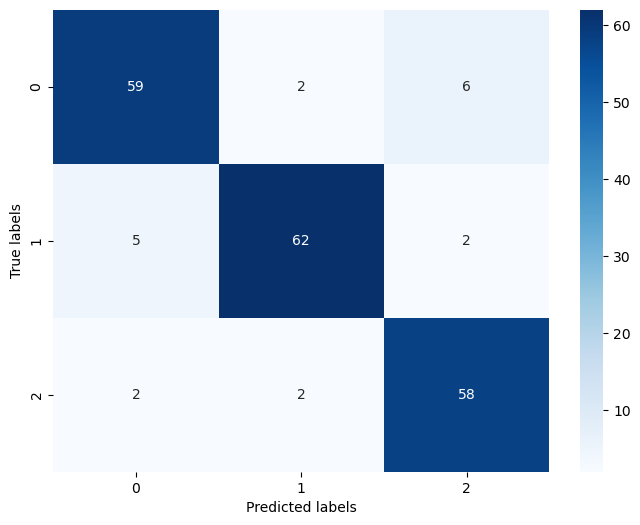

[1]	valid_0's multi_logloss: 1.10259
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10224
[3]	valid_0's multi_logloss: 1.10485
[4]	valid_0's multi_logloss: 1.10763
[5]	valid_0's multi_logloss: 1.1087
[6]	valid_0's multi_logloss: 1.11208
[7]	valid_0's multi_logloss: 1.11251
[8]	valid_0's multi_logloss: 1.11635
[9]	valid_0's multi_logloss: 1.119
[10]	valid_0's multi_logloss: 1.12462
[11]	valid_0's multi_logloss: 1.12386
[12]	valid_0's multi_logloss: 1.11825
Early stopping, best iteration is:
[2]	valid_0's multi_logloss: 1.10224
[1]	valid_0's multi_logloss: 1.10081
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09871
[3]	valid_0's multi_logloss: 1.09769
[4]	valid_0's multi_logloss: 1.09736
[5]	valid_0's multi_logloss: 1.09815
[6]	valid_0's multi_logloss: 1.10145
[7]	valid_0's multi_logloss: 1.10045
[8]	valid_0's multi_logloss: 1.10259
[9]	valid_0's multi_logloss: 1.10485
[10]	valid_0's multi_logloss:

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


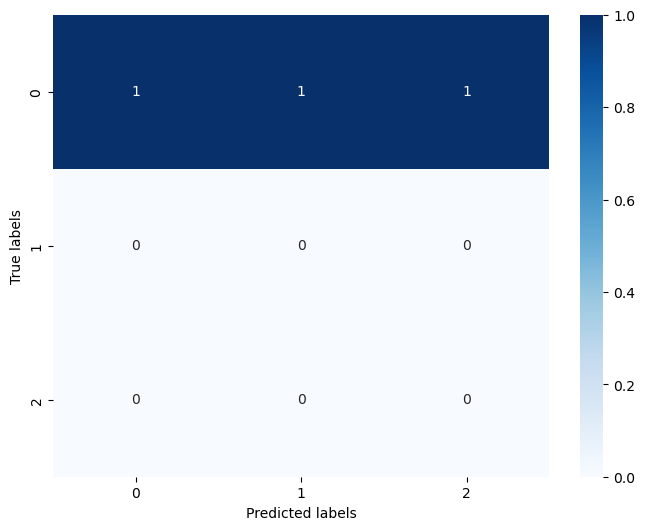

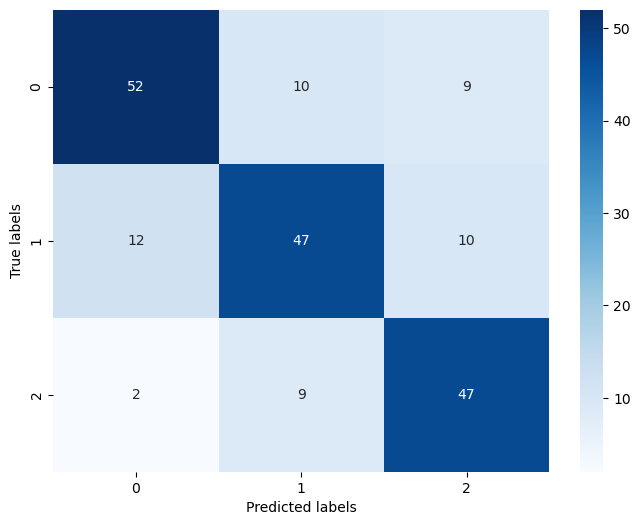

[1]	valid_0's multi_logloss: 1.10007
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10091
[3]	valid_0's multi_logloss: 1.10095
[4]	valid_0's multi_logloss: 1.09738
[5]	valid_0's multi_logloss: 1.09829
[6]	valid_0's multi_logloss: 1.09993
[7]	valid_0's multi_logloss: 1.09727
[8]	valid_0's multi_logloss: 1.09601
[9]	valid_0's multi_logloss: 1.09843
[10]	valid_0's multi_logloss: 1.09794
[11]	valid_0's multi_logloss: 1.09851
[12]	valid_0's multi_logloss: 1.10207
[13]	valid_0's multi_logloss: 1.10604
[14]	valid_0's multi_logloss: 1.10646
[15]	valid_0's multi_logloss: 1.10802
[16]	valid_0's multi_logloss: 1.11052
[17]	valid_0's multi_logloss: 1.1103
[18]	valid_0's multi_logloss: 1.11138
Early stopping, best iteration is:
[8]	valid_0's multi_logloss: 1.09601
[1]	valid_0's multi_logloss: 1.10009
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10194
[3]	valid_0's multi_logloss: 1.10014
[4]	valid_0's multi_l

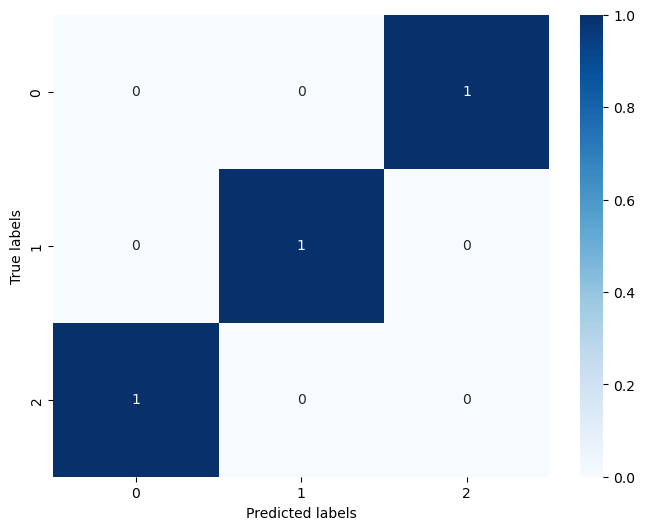

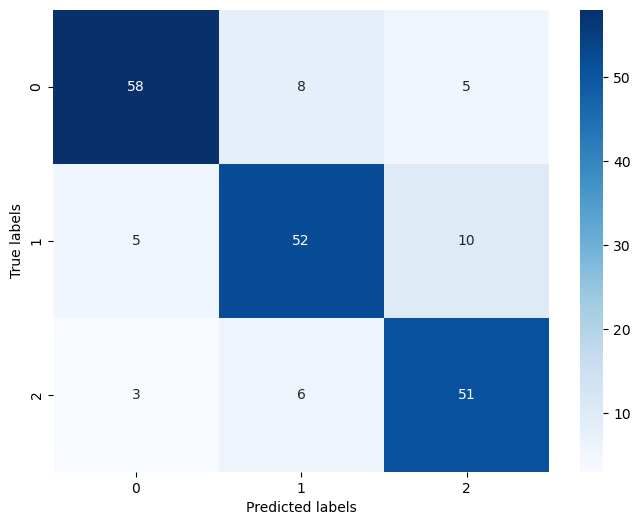

[1]	valid_0's multi_logloss: 1.09697
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09385
[3]	valid_0's multi_logloss: 1.09069
[4]	valid_0's multi_logloss: 1.09155
[5]	valid_0's multi_logloss: 1.08986
[6]	valid_0's multi_logloss: 1.08647
[7]	valid_0's multi_logloss: 1.08519
[8]	valid_0's multi_logloss: 1.08197
[9]	valid_0's multi_logloss: 1.07569
[10]	valid_0's multi_logloss: 1.07338
[11]	valid_0's multi_logloss: 1.06994
[12]	valid_0's multi_logloss: 1.06655
[13]	valid_0's multi_logloss: 1.06448
[14]	valid_0's multi_logloss: 1.06166
[15]	valid_0's multi_logloss: 1.05835
[16]	valid_0's multi_logloss: 1.05568
[17]	valid_0's multi_logloss: 1.05618
[18]	valid_0's multi_logloss: 1.05408
[19]	valid_0's multi_logloss: 1.05522
[20]	valid_0's multi_logloss: 1.05305
[21]	valid_0's multi_logloss: 1.0544
[22]	valid_0's multi_logloss: 1.05704
[23]	valid_0's multi_logloss: 1.05242
[24]	valid_0's multi_logloss: 1.0557
[25]	valid_0's multi_logloss: 1.049
[2

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


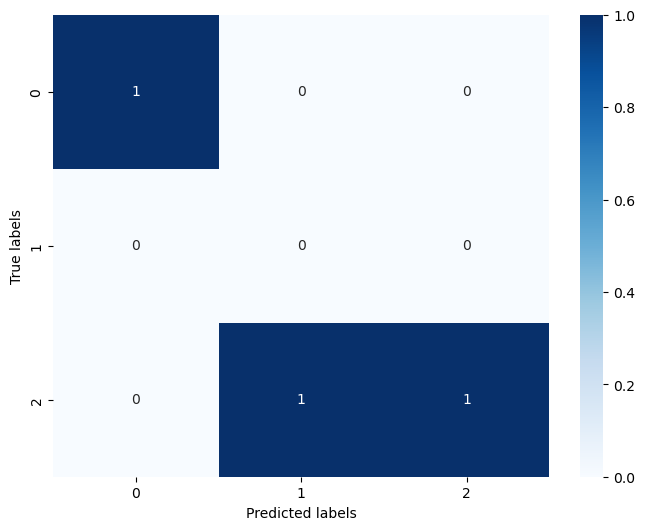

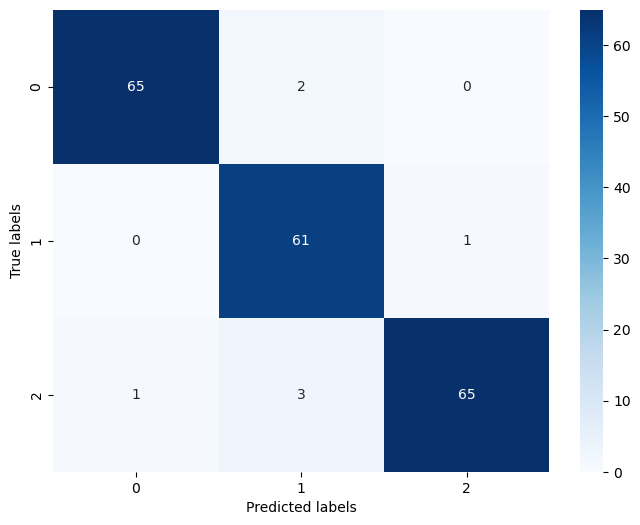

[1]	valid_0's multi_logloss: 1.10275
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10468
[3]	valid_0's multi_logloss: 1.1024
[4]	valid_0's multi_logloss: 1.10839
[5]	valid_0's multi_logloss: 1.10755
[6]	valid_0's multi_logloss: 1.10951
[7]	valid_0's multi_logloss: 1.10951
[8]	valid_0's multi_logloss: 1.11151
[9]	valid_0's multi_logloss: 1.11618
[10]	valid_0's multi_logloss: 1.11792
[11]	valid_0's multi_logloss: 1.1144
[12]	valid_0's multi_logloss: 1.11238
[13]	valid_0's multi_logloss: 1.11317
Early stopping, best iteration is:
[3]	valid_0's multi_logloss: 1.1024
[1]	valid_0's multi_logloss: 1.10136
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10219
[3]	valid_0's multi_logloss: 1.09794
[4]	valid_0's multi_logloss: 1.10284
[5]	valid_0's multi_logloss: 1.10381
[6]	valid_0's multi_logloss: 1.10167
[7]	valid_0's multi_logloss: 1.10552
[8]	valid_0's multi_logloss: 1.1031
[9]	valid_0's multi_logloss: 

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


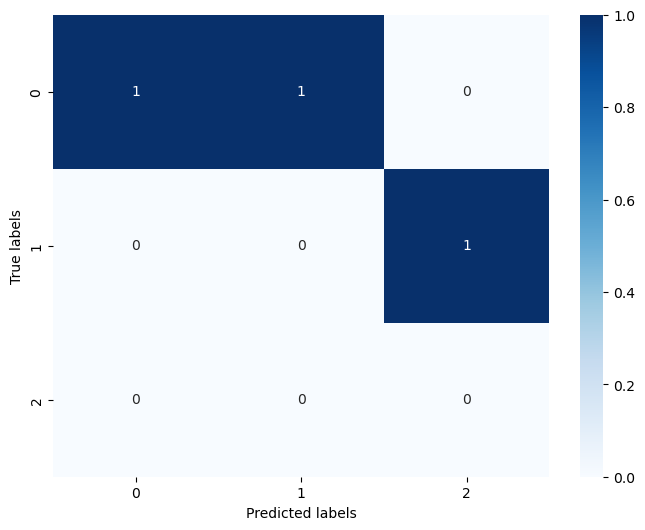

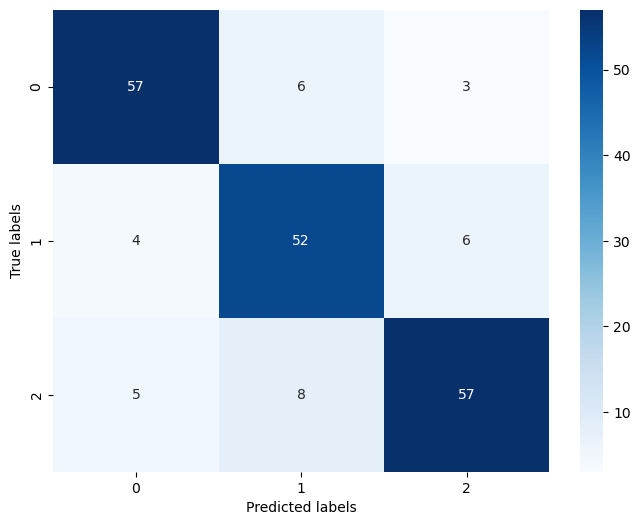

[1]	valid_0's multi_logloss: 1.09955
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10324
[3]	valid_0's multi_logloss: 1.10473
[4]	valid_0's multi_logloss: 1.10417
[5]	valid_0's multi_logloss: 1.10839
[6]	valid_0's multi_logloss: 1.10992
[7]	valid_0's multi_logloss: 1.11247
[8]	valid_0's multi_logloss: 1.11134
[9]	valid_0's multi_logloss: 1.11229
[10]	valid_0's multi_logloss: 1.11314
[11]	valid_0's multi_logloss: 1.11508
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09955
[1]	valid_0's multi_logloss: 1.09707
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09816
[3]	valid_0's multi_logloss: 1.09756
[4]	valid_0's multi_logloss: 1.09466
[5]	valid_0's multi_logloss: 1.09681
[6]	valid_0's multi_logloss: 1.09627
[7]	valid_0's multi_logloss: 1.09774
[8]	valid_0's multi_logloss: 1.09625
[9]	valid_0's multi_logloss: 1.09726
[10]	valid_0's multi_logloss: 1.09423
[11]	valid_0's multi_loglo

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


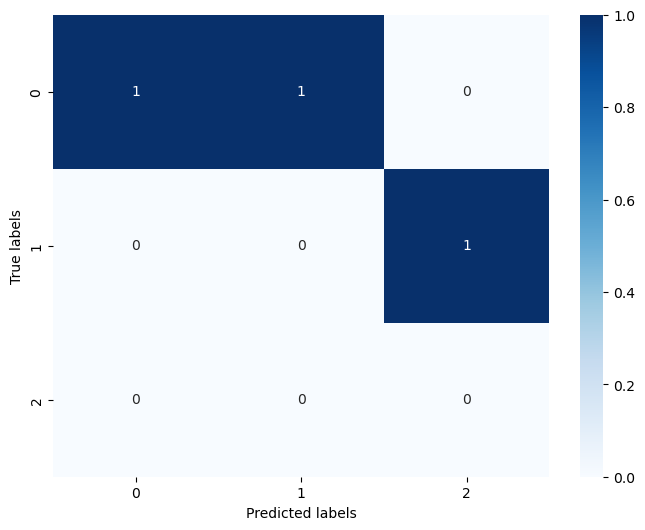

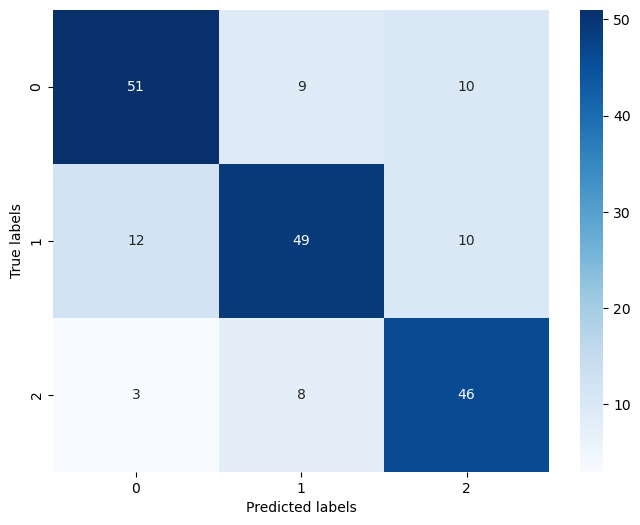

[1]	valid_0's multi_logloss: 1.10168
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10516
[3]	valid_0's multi_logloss: 1.10877
[4]	valid_0's multi_logloss: 1.113
[5]	valid_0's multi_logloss: 1.11236
[6]	valid_0's multi_logloss: 1.11843
[7]	valid_0's multi_logloss: 1.1202
[8]	valid_0's multi_logloss: 1.11886
[9]	valid_0's multi_logloss: 1.12037
[10]	valid_0's multi_logloss: 1.12462
[11]	valid_0's multi_logloss: 1.12914
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10168
[1]	valid_0's multi_logloss: 1.10257
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10488
[3]	valid_0's multi_logloss: 1.1089
[4]	valid_0's multi_logloss: 1.11468
[5]	valid_0's multi_logloss: 1.11505
[6]	valid_0's multi_logloss: 1.11889
[7]	valid_0's multi_logloss: 1.11861
[8]	valid_0's multi_logloss: 1.1155
[9]	valid_0's multi_logloss: 1.11601
[10]	valid_0's multi_logloss: 1.11545
[11]	valid_0's multi_logloss: 1

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


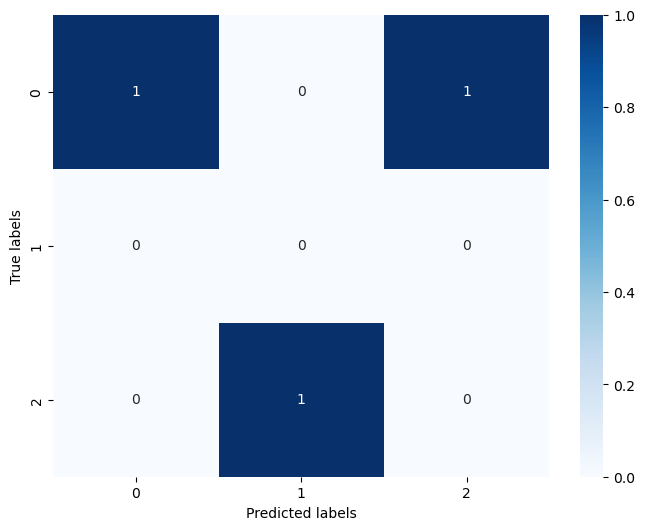

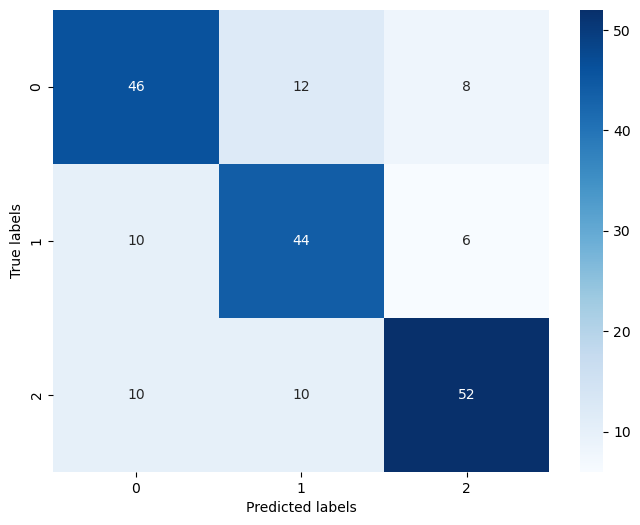

[1]	valid_0's multi_logloss: 1.09618
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09393
[3]	valid_0's multi_logloss: 1.09139
[4]	valid_0's multi_logloss: 1.09014
[5]	valid_0's multi_logloss: 1.08944
[6]	valid_0's multi_logloss: 1.08746
[7]	valid_0's multi_logloss: 1.08881
[8]	valid_0's multi_logloss: 1.09041
[9]	valid_0's multi_logloss: 1.08363
[10]	valid_0's multi_logloss: 1.07946
[11]	valid_0's multi_logloss: 1.07653
[12]	valid_0's multi_logloss: 1.07355
[13]	valid_0's multi_logloss: 1.07076
[14]	valid_0's multi_logloss: 1.06803
[15]	valid_0's multi_logloss: 1.06536
[16]	valid_0's multi_logloss: 1.06434
[17]	valid_0's multi_logloss: 1.06343
[18]	valid_0's multi_logloss: 1.05855
[19]	valid_0's multi_logloss: 1.0587
[20]	valid_0's multi_logloss: 1.05577
[21]	valid_0's multi_logloss: 1.05445
[22]	valid_0's multi_logloss: 1.05458
[23]	valid_0's multi_logloss: 1.04963
[24]	valid_0's multi_logloss: 1.04978
[25]	valid_0's multi_logloss: 1.05005

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


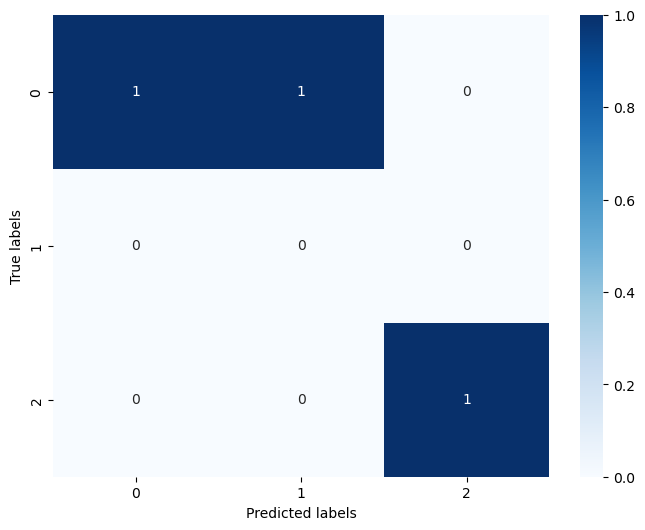

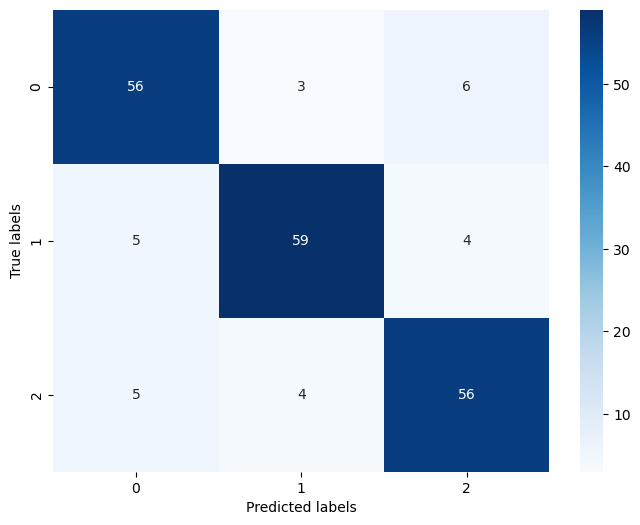

[1]	valid_0's multi_logloss: 1.09301
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08299
[3]	valid_0's multi_logloss: 1.07595
[4]	valid_0's multi_logloss: 1.07072
[5]	valid_0's multi_logloss: 1.06768
[6]	valid_0's multi_logloss: 1.06341
[7]	valid_0's multi_logloss: 1.05714
[8]	valid_0's multi_logloss: 1.05417
[9]	valid_0's multi_logloss: 1.05094
[10]	valid_0's multi_logloss: 1.04887
[11]	valid_0's multi_logloss: 1.04434
[12]	valid_0's multi_logloss: 1.03989
[13]	valid_0's multi_logloss: 1.03348
[14]	valid_0's multi_logloss: 1.02784
[15]	valid_0's multi_logloss: 1.02292
[16]	valid_0's multi_logloss: 1.02057
[17]	valid_0's multi_logloss: 1.01808
[18]	valid_0's multi_logloss: 1.01396
[19]	valid_0's multi_logloss: 1.01172
[20]	valid_0's multi_logloss: 1.00983
[21]	valid_0's multi_logloss: 1.00469
[22]	valid_0's multi_logloss: 0.99896
[23]	valid_0's multi_logloss: 0.99237
[24]	valid_0's multi_logloss: 0.987187
[25]	valid_0's multi_logloss: 0.981

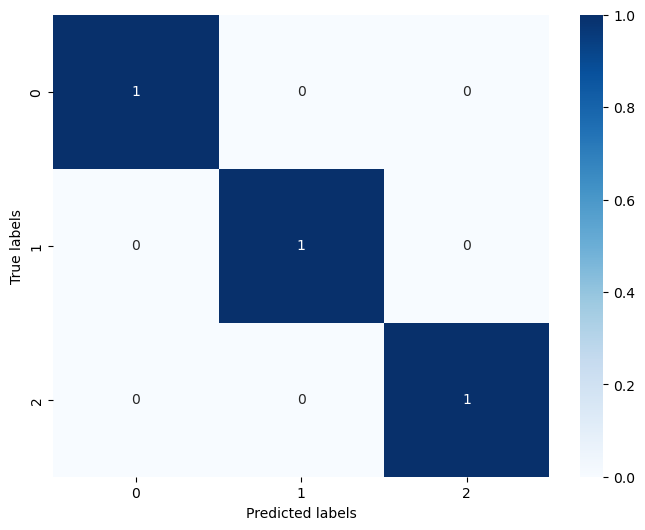

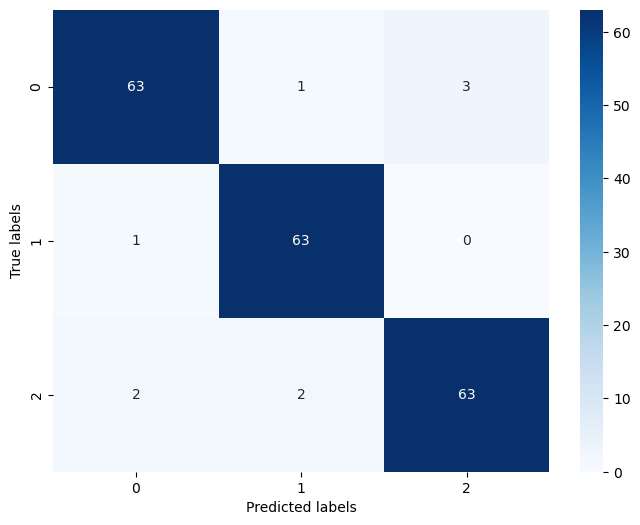

[1]	valid_0's multi_logloss: 1.10522
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10902
[3]	valid_0's multi_logloss: 1.11308
[4]	valid_0's multi_logloss: 1.10942
[5]	valid_0's multi_logloss: 1.11601
[6]	valid_0's multi_logloss: 1.11955
[7]	valid_0's multi_logloss: 1.12432
[8]	valid_0's multi_logloss: 1.12361
[9]	valid_0's multi_logloss: 1.12686
[10]	valid_0's multi_logloss: 1.13449
[11]	valid_0's multi_logloss: 1.13875
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10522
[1]	valid_0's multi_logloss: 1.10477
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10995
[3]	valid_0's multi_logloss: 1.115
[4]	valid_0's multi_logloss: 1.1123
[5]	valid_0's multi_logloss: 1.11825
[6]	valid_0's multi_logloss: 1.1217
[7]	valid_0's multi_logloss: 1.12307
[8]	valid_0's multi_logloss: 1.12328
[9]	valid_0's multi_logloss: 1.12689
[10]	valid_0's multi_logloss: 1.13475
[11]	valid_0's multi_logloss: 

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


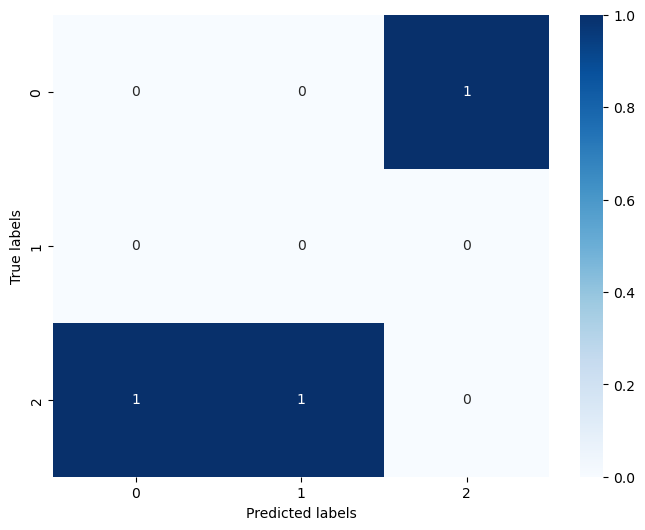

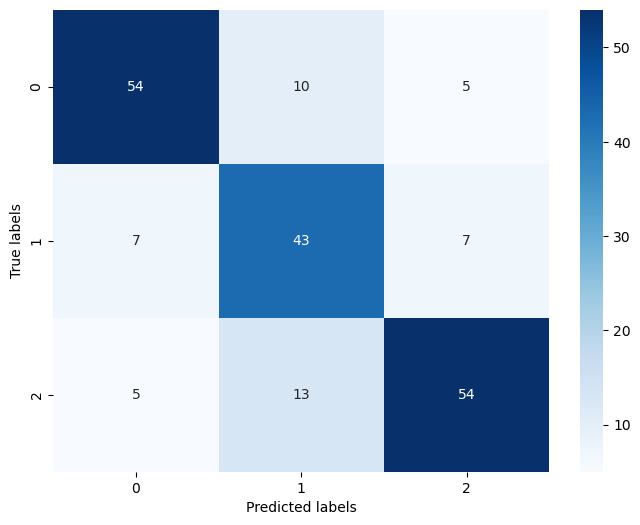

[1]	valid_0's multi_logloss: 1.09886
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.0977
[3]	valid_0's multi_logloss: 1.09666
[4]	valid_0's multi_logloss: 1.10101
[5]	valid_0's multi_logloss: 1.10323
[6]	valid_0's multi_logloss: 1.1
[7]	valid_0's multi_logloss: 1.10107
[8]	valid_0's multi_logloss: 1.10325
[9]	valid_0's multi_logloss: 1.10235
[10]	valid_0's multi_logloss: 1.10351
[11]	valid_0's multi_logloss: 1.10519
[12]	valid_0's multi_logloss: 1.10845
[13]	valid_0's multi_logloss: 1.11009
Early stopping, best iteration is:
[3]	valid_0's multi_logloss: 1.09666
[1]	valid_0's multi_logloss: 1.09809
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09617
[3]	valid_0's multi_logloss: 1.09436
[4]	valid_0's multi_logloss: 1.09918
[5]	valid_0's multi_logloss: 1.10152
[6]	valid_0's multi_logloss: 1.10073
[7]	valid_0's multi_logloss: 1.09683
[8]	valid_0's multi_logloss: 1.09504
[9]	valid_0's multi_logloss: 1

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


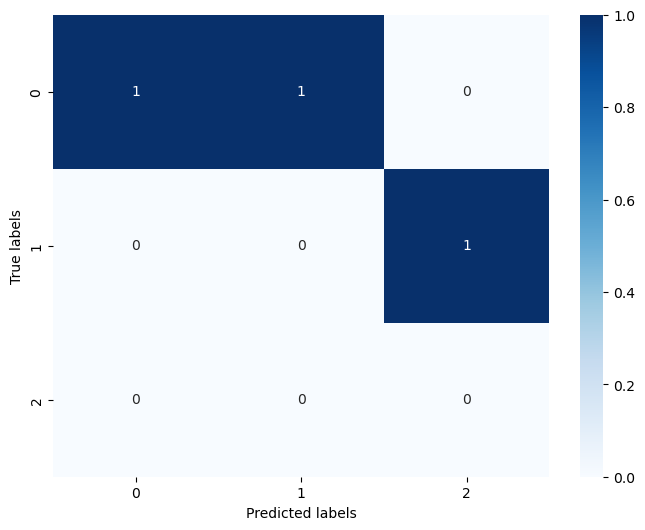

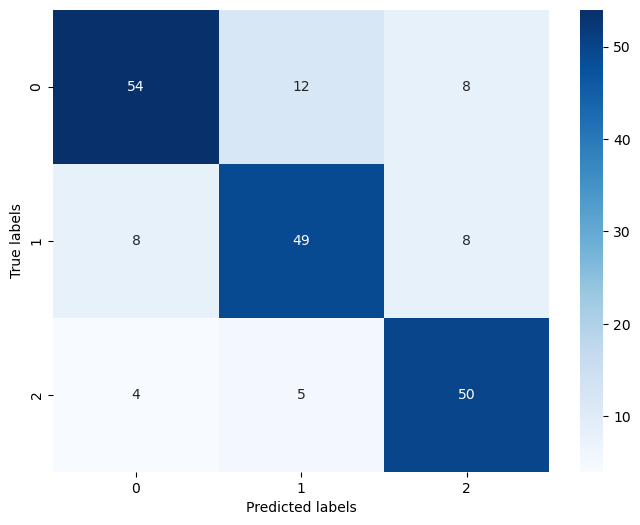

[1]	valid_0's multi_logloss: 1.10175
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10538
[3]	valid_0's multi_logloss: 1.10952
[4]	valid_0's multi_logloss: 1.10246
[5]	valid_0's multi_logloss: 1.10699
[6]	valid_0's multi_logloss: 1.11113
[7]	valid_0's multi_logloss: 1.11623
[8]	valid_0's multi_logloss: 1.12131
[9]	valid_0's multi_logloss: 1.11645
[10]	valid_0's multi_logloss: 1.11674
[11]	valid_0's multi_logloss: 1.12087
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10175
[1]	valid_0's multi_logloss: 1.10136
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10539
[3]	valid_0's multi_logloss: 1.10975
[4]	valid_0's multi_logloss: 1.10158
[5]	valid_0's multi_logloss: 1.10418
[6]	valid_0's multi_logloss: 1.107
[7]	valid_0's multi_logloss: 1.11164
[8]	valid_0's multi_logloss: 1.11536
[9]	valid_0's multi_logloss: 1.11042
[10]	valid_0's multi_logloss: 1.11072
[11]	valid_0's multi_logloss

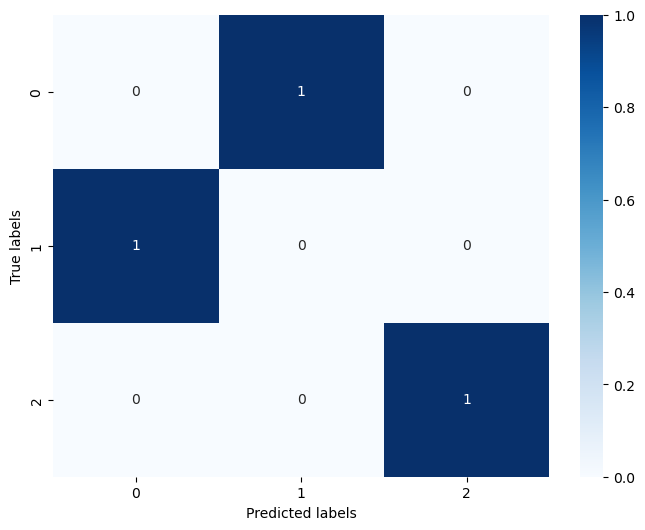

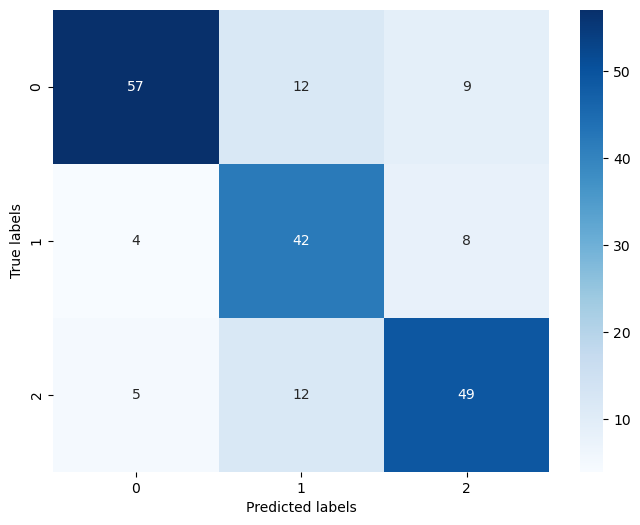

[1]	valid_0's multi_logloss: 1.09185
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08295
[3]	valid_0's multi_logloss: 1.07722
[4]	valid_0's multi_logloss: 1.07647
[5]	valid_0's multi_logloss: 1.06957
[6]	valid_0's multi_logloss: 1.06371
[7]	valid_0's multi_logloss: 1.05991
[8]	valid_0's multi_logloss: 1.05527
[9]	valid_0's multi_logloss: 1.0533
[10]	valid_0's multi_logloss: 1.04805
[11]	valid_0's multi_logloss: 1.04359
[12]	valid_0's multi_logloss: 1.04011
[13]	valid_0's multi_logloss: 1.03548
[14]	valid_0's multi_logloss: 1.02979
[15]	valid_0's multi_logloss: 1.02471
[16]	valid_0's multi_logloss: 1.01963
[17]	valid_0's multi_logloss: 1.02056
[18]	valid_0's multi_logloss: 1.01685
[19]	valid_0's multi_logloss: 1.01278
[20]	valid_0's multi_logloss: 1.00877
[21]	valid_0's multi_logloss: 1.00827
[22]	valid_0's multi_logloss: 1.00566
[23]	valid_0's multi_logloss: 0.999031
[24]	valid_0's multi_logloss: 0.997205
[25]	valid_0's multi_logloss: 0.993

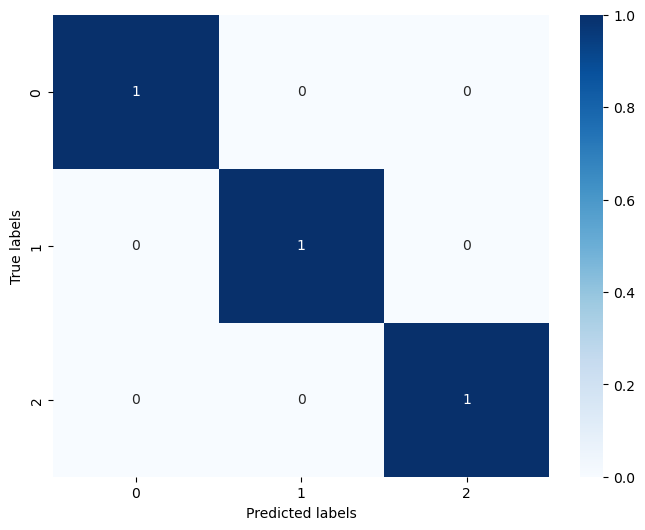

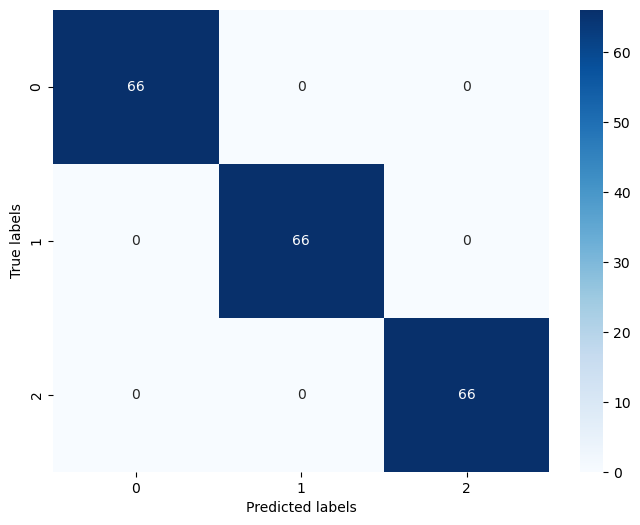

[1]	valid_0's multi_logloss: 1.10344
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10651
[3]	valid_0's multi_logloss: 1.11303
[4]	valid_0's multi_logloss: 1.11774
[5]	valid_0's multi_logloss: 1.12295
[6]	valid_0's multi_logloss: 1.12623
[7]	valid_0's multi_logloss: 1.13299
[8]	valid_0's multi_logloss: 1.13526
[9]	valid_0's multi_logloss: 1.13315
[10]	valid_0's multi_logloss: 1.13614
[11]	valid_0's multi_logloss: 1.13821
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10344
[1]	valid_0's multi_logloss: 1.10447
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10958
[3]	valid_0's multi_logloss: 1.11441
[4]	valid_0's multi_logloss: 1.11965
[5]	valid_0's multi_logloss: 1.12476
[6]	valid_0's multi_logloss: 1.13306
[7]	valid_0's multi_logloss: 1.13899
[8]	valid_0's multi_logloss: 1.14166
[9]	valid_0's multi_logloss: 1.14077
[10]	valid_0's multi_logloss: 1.14723
[11]	valid_0's multi_loglo

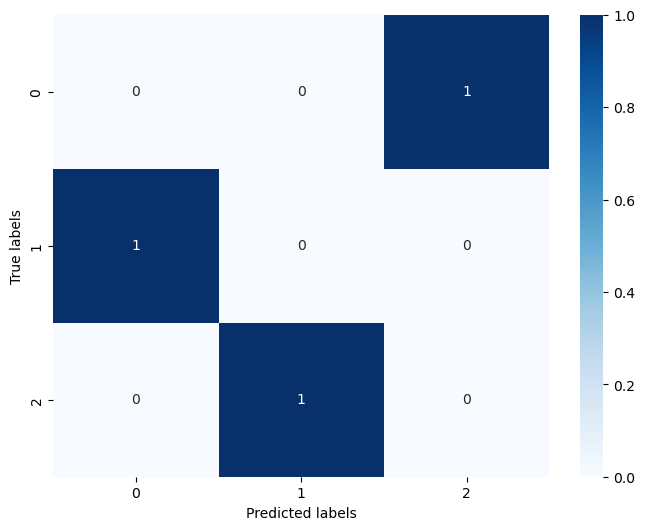

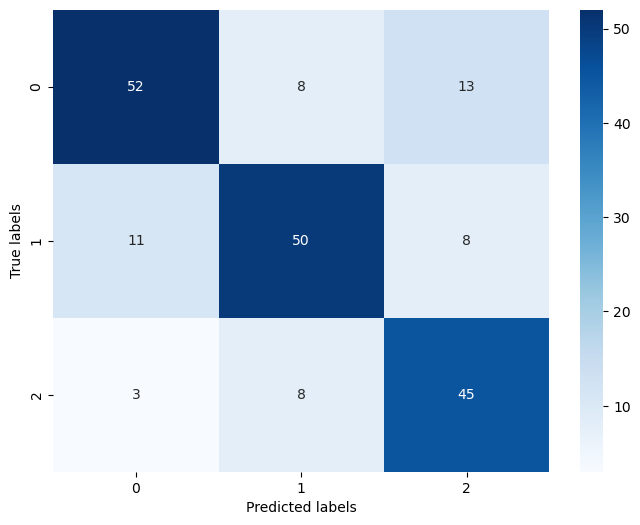

[1]	valid_0's multi_logloss: 1.1009
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10407
[3]	valid_0's multi_logloss: 1.10725
[4]	valid_0's multi_logloss: 1.10724
[5]	valid_0's multi_logloss: 1.11035
[6]	valid_0's multi_logloss: 1.1105
[7]	valid_0's multi_logloss: 1.11272
[8]	valid_0's multi_logloss: 1.11494
[9]	valid_0's multi_logloss: 1.11658
[10]	valid_0's multi_logloss: 1.12292
[11]	valid_0's multi_logloss: 1.12159
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.1009
[1]	valid_0's multi_logloss: 1.10084
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.104
[3]	valid_0's multi_logloss: 1.10664
[4]	valid_0's multi_logloss: 1.10663
[5]	valid_0's multi_logloss: 1.10872
[6]	valid_0's multi_logloss: 1.10886
[7]	valid_0's multi_logloss: 1.11102
[8]	valid_0's multi_logloss: 1.11363
[9]	valid_0's multi_logloss: 1.11922
[10]	valid_0's multi_logloss: 1.12729
[11]	valid_0's multi_logloss: 1

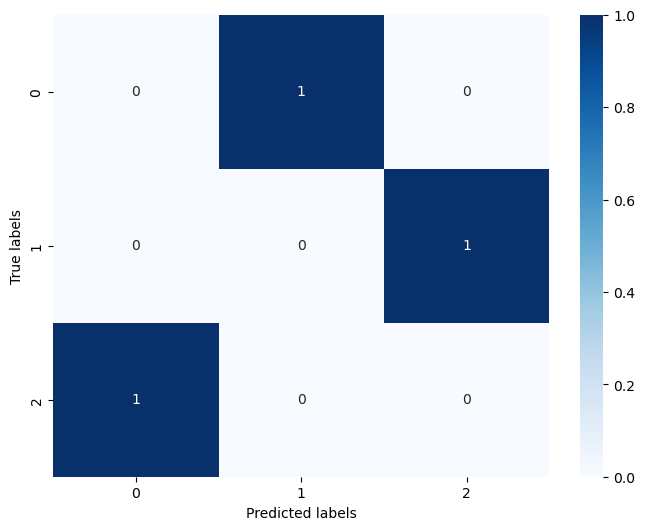

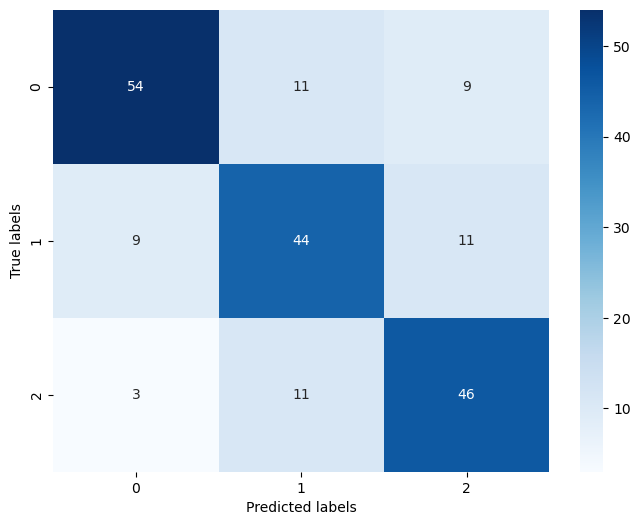

[1]	valid_0's multi_logloss: 1.09396
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08792
[3]	valid_0's multi_logloss: 1.08551
[4]	valid_0's multi_logloss: 1.08479
[5]	valid_0's multi_logloss: 1.08024
[6]	valid_0's multi_logloss: 1.07831
[7]	valid_0's multi_logloss: 1.07605
[8]	valid_0's multi_logloss: 1.0716
[9]	valid_0's multi_logloss: 1.07266
[10]	valid_0's multi_logloss: 1.0744
[11]	valid_0's multi_logloss: 1.07069
[12]	valid_0's multi_logloss: 1.06705
[13]	valid_0's multi_logloss: 1.06338
[14]	valid_0's multi_logloss: 1.06074
[15]	valid_0's multi_logloss: 1.05717
[16]	valid_0's multi_logloss: 1.05199
[17]	valid_0's multi_logloss: 1.05048
[18]	valid_0's multi_logloss: 1.04883
[19]	valid_0's multi_logloss: 1.0464
[20]	valid_0's multi_logloss: 1.04819
[21]	valid_0's multi_logloss: 1.04705
[22]	valid_0's multi_logloss: 1.04426
[23]	valid_0's multi_logloss: 1.04264
[24]	valid_0's multi_logloss: 1.04176
[25]	valid_0's multi_logloss: 1.0426
[2

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


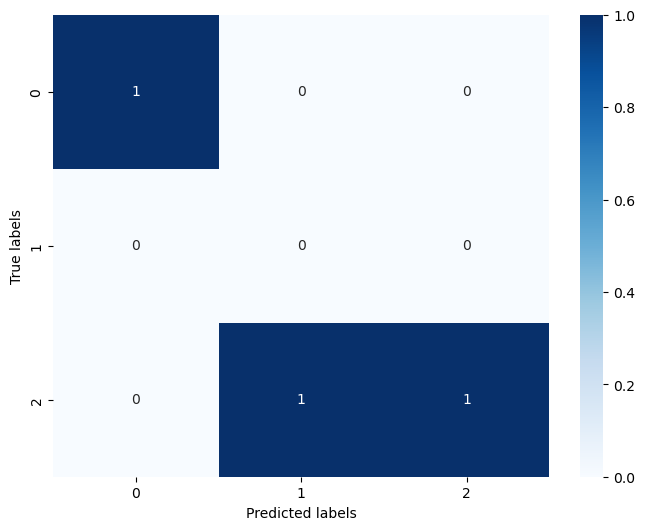

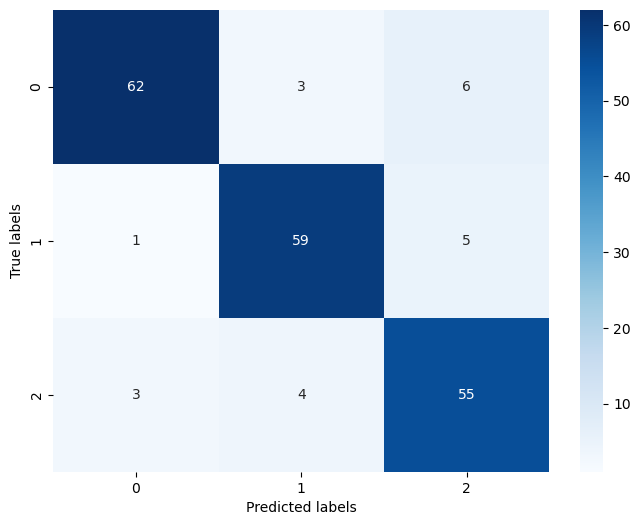

[1]	valid_0's multi_logloss: 1.10035
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.1006
[3]	valid_0's multi_logloss: 1.09769
[4]	valid_0's multi_logloss: 1.09473
[5]	valid_0's multi_logloss: 1.09188
[6]	valid_0's multi_logloss: 1.09191
[7]	valid_0's multi_logloss: 1.09109
[8]	valid_0's multi_logloss: 1.08734
[9]	valid_0's multi_logloss: 1.08498
[10]	valid_0's multi_logloss: 1.08538
[11]	valid_0's multi_logloss: 1.08113
[12]	valid_0's multi_logloss: 1.07751
[13]	valid_0's multi_logloss: 1.07487
[14]	valid_0's multi_logloss: 1.07078
[15]	valid_0's multi_logloss: 1.07021
[16]	valid_0's multi_logloss: 1.06401
[17]	valid_0's multi_logloss: 1.06258
[18]	valid_0's multi_logloss: 1.06656
[19]	valid_0's multi_logloss: 1.06322
[20]	valid_0's multi_logloss: 1.06035
[21]	valid_0's multi_logloss: 1.05991
[22]	valid_0's multi_logloss: 1.06259
[23]	valid_0's multi_logloss: 1.06305
[24]	valid_0's multi_logloss: 1.06202
[25]	valid_0's multi_logloss: 1.06375

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


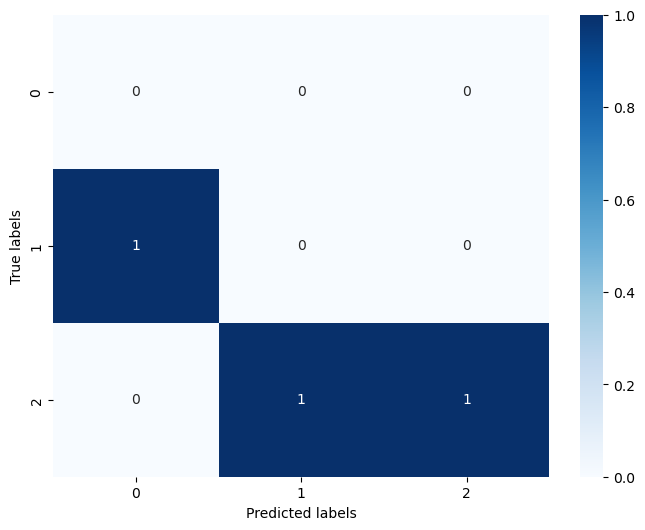

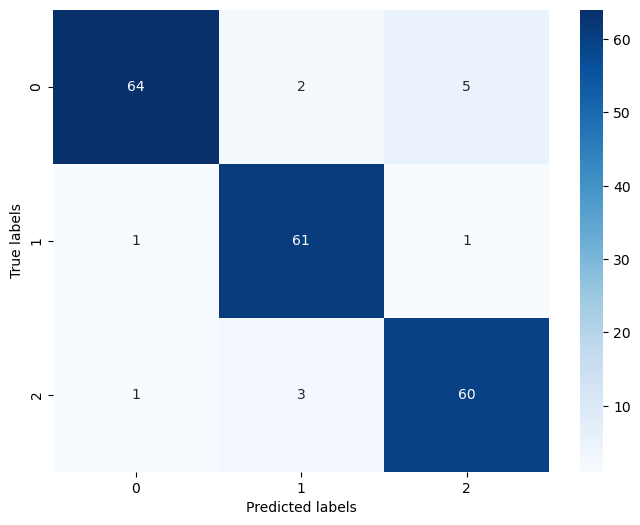

[1]	valid_0's multi_logloss: 1.09778
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09949
[3]	valid_0's multi_logloss: 1.10149
[4]	valid_0's multi_logloss: 1.10577
[5]	valid_0's multi_logloss: 1.10912
[6]	valid_0's multi_logloss: 1.11124
[7]	valid_0's multi_logloss: 1.11328
[8]	valid_0's multi_logloss: 1.11302
[9]	valid_0's multi_logloss: 1.11376
[10]	valid_0's multi_logloss: 1.11837
[11]	valid_0's multi_logloss: 1.12325
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09778
[1]	valid_0's multi_logloss: 1.09361
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09297
[3]	valid_0's multi_logloss: 1.08934
[4]	valid_0's multi_logloss: 1.09466
[5]	valid_0's multi_logloss: 1.09552
[6]	valid_0's multi_logloss: 1.09495
[7]	valid_0's multi_logloss: 1.09737
[8]	valid_0's multi_logloss: 1.09709
[9]	valid_0's multi_logloss: 1.0994
[10]	valid_0's multi_logloss: 1.09933
[11]	valid_0's multi_loglos

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


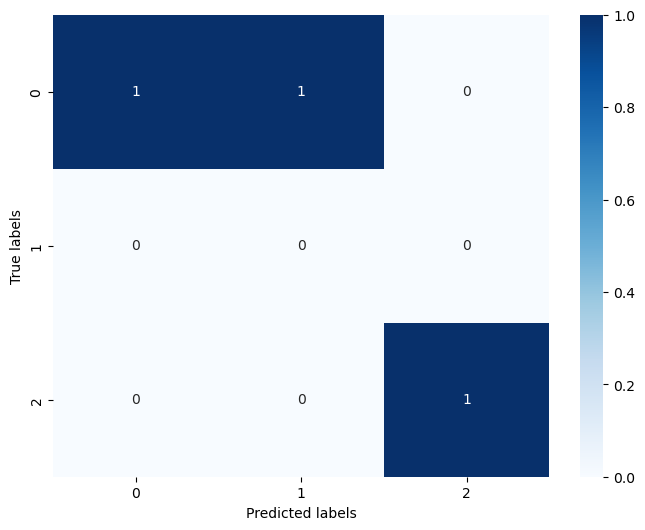

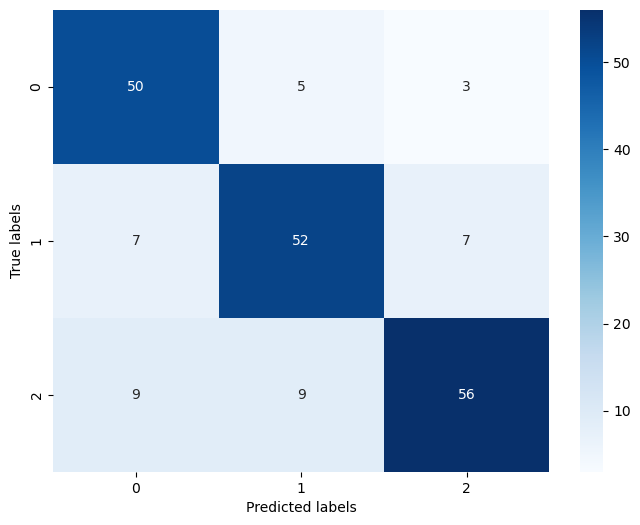

[1]	valid_0's multi_logloss: 1.09691
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09726
[3]	valid_0's multi_logloss: 1.09387
[4]	valid_0's multi_logloss: 1.09249
[5]	valid_0's multi_logloss: 1.09237
[6]	valid_0's multi_logloss: 1.08869
[7]	valid_0's multi_logloss: 1.09276
[8]	valid_0's multi_logloss: 1.0889
[9]	valid_0's multi_logloss: 1.08567
[10]	valid_0's multi_logloss: 1.08845
[11]	valid_0's multi_logloss: 1.08411
[12]	valid_0's multi_logloss: 1.07959
[13]	valid_0's multi_logloss: 1.07799
[14]	valid_0's multi_logloss: 1.07622
[15]	valid_0's multi_logloss: 1.07092
[16]	valid_0's multi_logloss: 1.06589
[17]	valid_0's multi_logloss: 1.06659
[18]	valid_0's multi_logloss: 1.06864
[19]	valid_0's multi_logloss: 1.06613
[20]	valid_0's multi_logloss: 1.06346
[21]	valid_0's multi_logloss: 1.06218
[22]	valid_0's multi_logloss: 1.06303
[23]	valid_0's multi_logloss: 1.06609
[24]	valid_0's multi_logloss: 1.05865
[25]	valid_0's multi_logloss: 1.05924

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


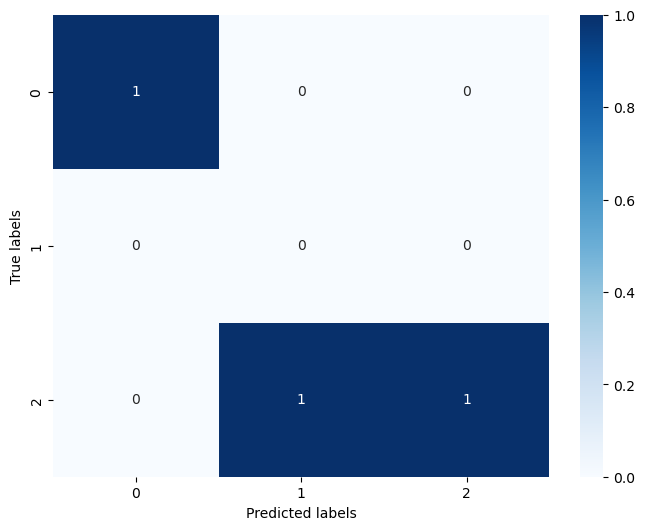

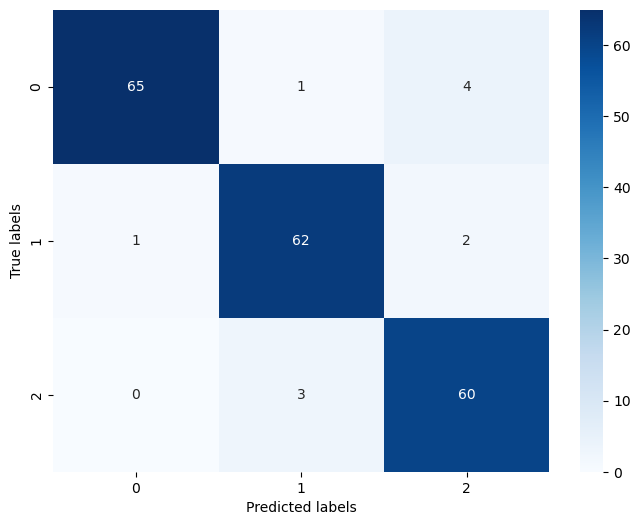

[1]	valid_0's multi_logloss: 1.097
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09141
[3]	valid_0's multi_logloss: 1.08445
[4]	valid_0's multi_logloss: 1.08569
[5]	valid_0's multi_logloss: 1.08111
[6]	valid_0's multi_logloss: 1.08204
[7]	valid_0's multi_logloss: 1.08144
[8]	valid_0's multi_logloss: 1.08378
[9]	valid_0's multi_logloss: 1.08612
[10]	valid_0's multi_logloss: 1.08846
[11]	valid_0's multi_logloss: 1.08986
[12]	valid_0's multi_logloss: 1.08769
[13]	valid_0's multi_logloss: 1.0874
[14]	valid_0's multi_logloss: 1.08839
[15]	valid_0's multi_logloss: 1.08746
Early stopping, best iteration is:
[5]	valid_0's multi_logloss: 1.08111
[1]	valid_0's multi_logloss: 1.10101
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09592
[3]	valid_0's multi_logloss: 1.08946
[4]	valid_0's multi_logloss: 1.0921
[5]	valid_0's multi_logloss: 1.08693
[6]	valid_0's multi_logloss: 1.09124
[7]	valid_0's multi_logloss

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


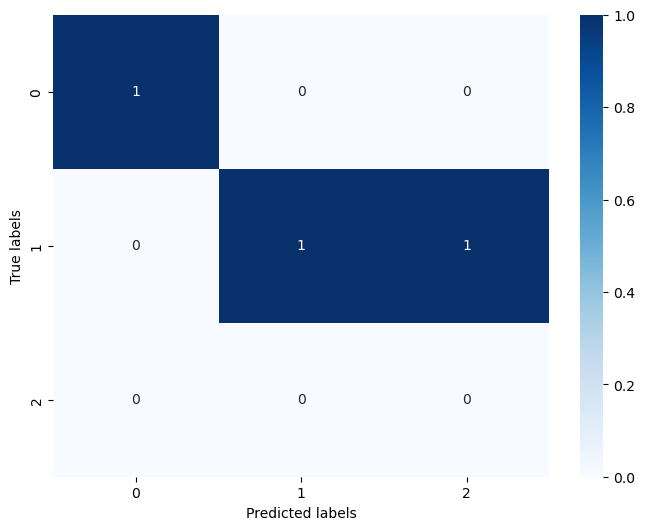

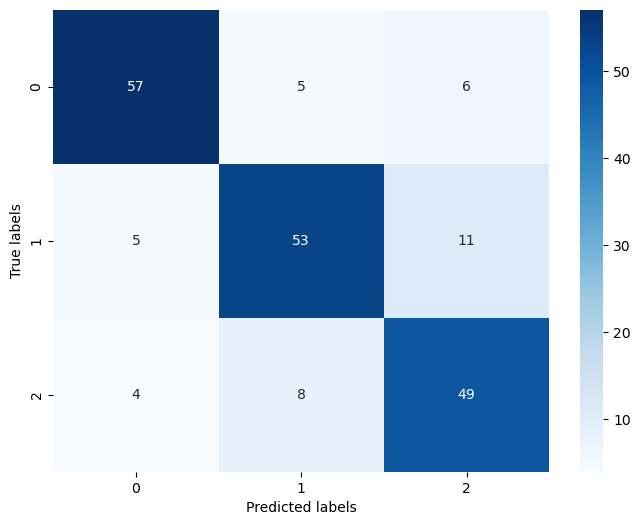

[1]	valid_0's multi_logloss: 1.09901
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09826
[3]	valid_0's multi_logloss: 1.09719
[4]	valid_0's multi_logloss: 1.0988
[5]	valid_0's multi_logloss: 1.09625
[6]	valid_0's multi_logloss: 1.09699
[7]	valid_0's multi_logloss: 1.0947
[8]	valid_0's multi_logloss: 1.09628
[9]	valid_0's multi_logloss: 1.09622
[10]	valid_0's multi_logloss: 1.09861
[11]	valid_0's multi_logloss: 1.09754
[12]	valid_0's multi_logloss: 1.10125
[13]	valid_0's multi_logloss: 1.10341
[14]	valid_0's multi_logloss: 1.10399
[15]	valid_0's multi_logloss: 1.10505
[16]	valid_0's multi_logloss: 1.10601
[17]	valid_0's multi_logloss: 1.10253
Early stopping, best iteration is:
[7]	valid_0's multi_logloss: 1.0947
[1]	valid_0's multi_logloss: 1.0983
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09683
[3]	valid_0's multi_logloss: 1.09662
[4]	valid_0's multi_logloss: 1.10034
[5]	valid_0's multi_loglo

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


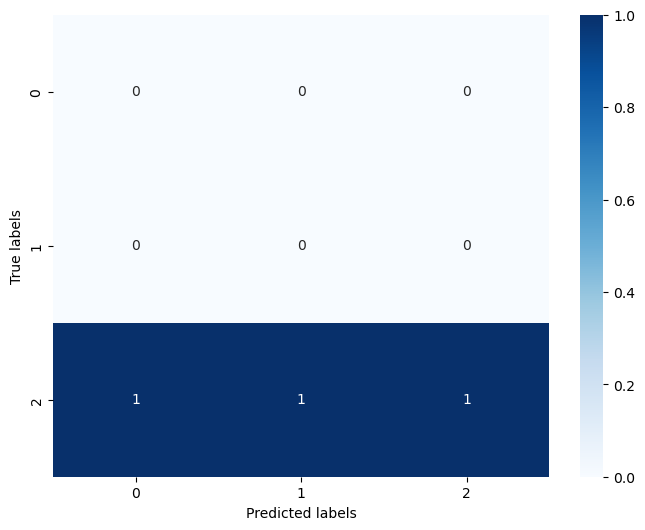

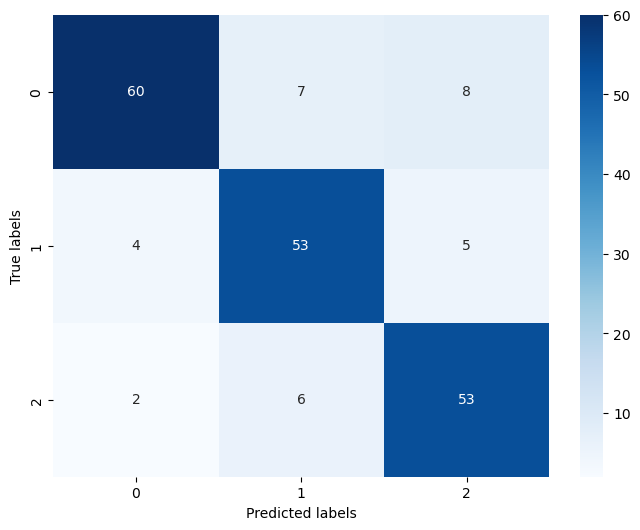

[1]	valid_0's multi_logloss: 1.09918
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.1026
[3]	valid_0's multi_logloss: 1.10072
[4]	valid_0's multi_logloss: 1.10094
[5]	valid_0's multi_logloss: 1.09891
[6]	valid_0's multi_logloss: 1.10185
[7]	valid_0's multi_logloss: 1.1053
[8]	valid_0's multi_logloss: 1.10127
[9]	valid_0's multi_logloss: 1.09511
[10]	valid_0's multi_logloss: 1.0923
[11]	valid_0's multi_logloss: 1.08911
[12]	valid_0's multi_logloss: 1.08713
[13]	valid_0's multi_logloss: 1.08737
[14]	valid_0's multi_logloss: 1.08595
[15]	valid_0's multi_logloss: 1.08498
[16]	valid_0's multi_logloss: 1.07906
[17]	valid_0's multi_logloss: 1.07945
[18]	valid_0's multi_logloss: 1.07617
[19]	valid_0's multi_logloss: 1.07266
[20]	valid_0's multi_logloss: 1.06803
[21]	valid_0's multi_logloss: 1.06173
[22]	valid_0's multi_logloss: 1.0641
[23]	valid_0's multi_logloss: 1.06376
[24]	valid_0's multi_logloss: 1.06467
[25]	valid_0's multi_logloss: 1.05648
[2

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


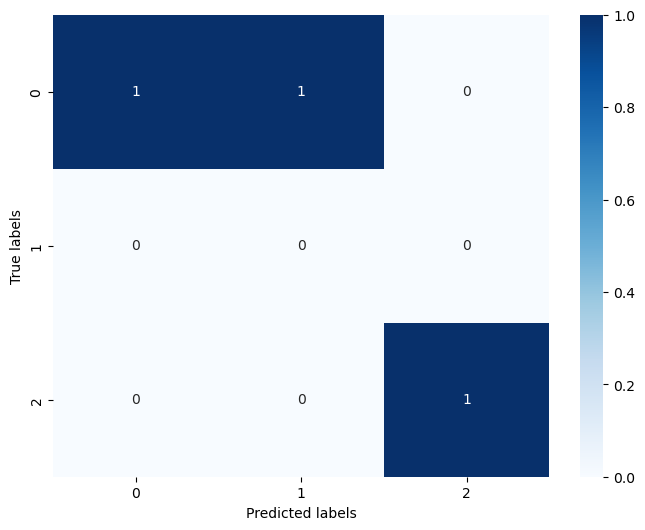

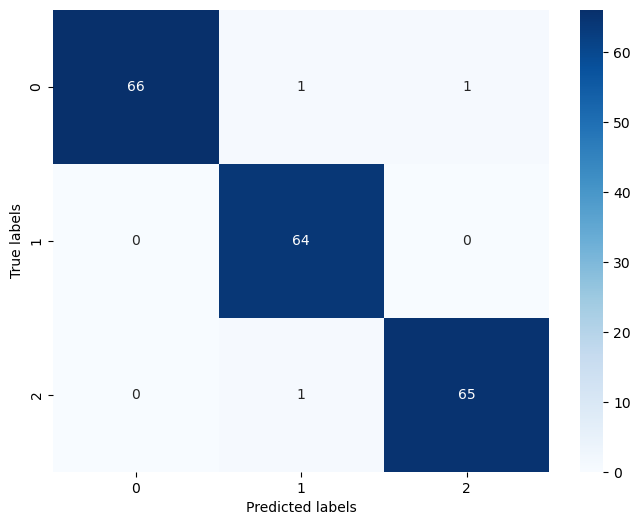

[1]	valid_0's multi_logloss: 1.09992
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10223
[3]	valid_0's multi_logloss: 1.10448
[4]	valid_0's multi_logloss: 1.1022
[5]	valid_0's multi_logloss: 1.10531
[6]	valid_0's multi_logloss: 1.10531
[7]	valid_0's multi_logloss: 1.10133
[8]	valid_0's multi_logloss: 1.10085
[9]	valid_0's multi_logloss: 1.10166
[10]	valid_0's multi_logloss: 1.1005
[11]	valid_0's multi_logloss: 1.1017
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.09992
[1]	valid_0's multi_logloss: 1.10069
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10411
[3]	valid_0's multi_logloss: 1.10791
[4]	valid_0's multi_logloss: 1.10314
[5]	valid_0's multi_logloss: 1.10543
[6]	valid_0's multi_logloss: 1.1074
[7]	valid_0's multi_logloss: 1.10255
[8]	valid_0's multi_logloss: 1.10082
[9]	valid_0's multi_logloss: 1.1019
[10]	valid_0's multi_logloss: 1.0999
[11]	valid_0's multi_logloss: 1.

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


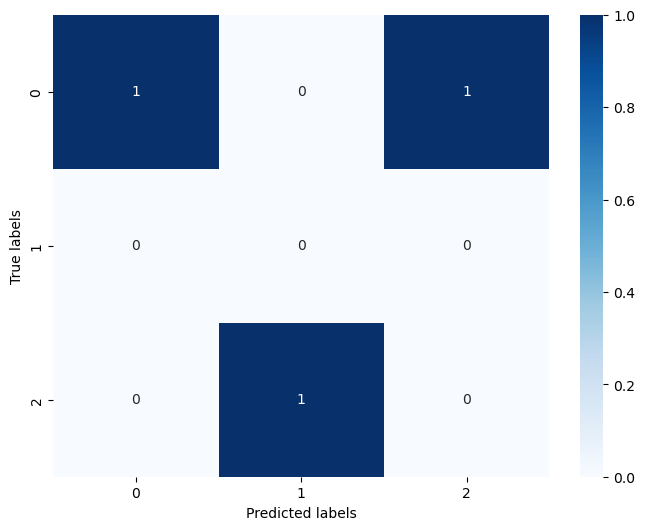

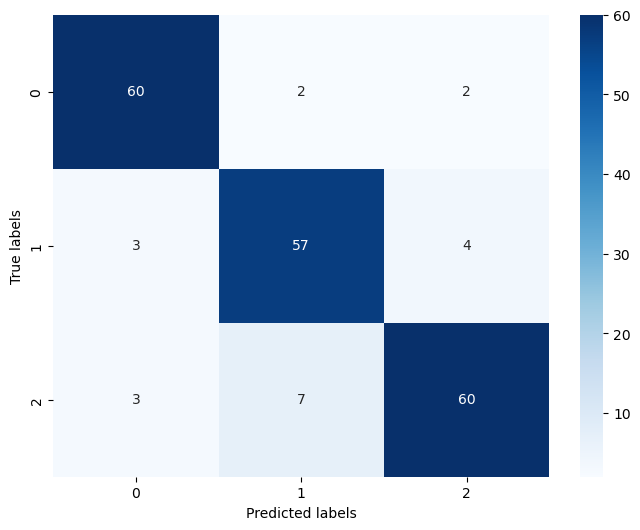

[1]	valid_0's multi_logloss: 1.09946
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09897
[3]	valid_0's multi_logloss: 1.09989
[4]	valid_0's multi_logloss: 1.09887
[5]	valid_0's multi_logloss: 1.09846
[6]	valid_0's multi_logloss: 1.09709
[7]	valid_0's multi_logloss: 1.09625
[8]	valid_0's multi_logloss: 1.09339
[9]	valid_0's multi_logloss: 1.09202
[10]	valid_0's multi_logloss: 1.0885
[11]	valid_0's multi_logloss: 1.08538
[12]	valid_0's multi_logloss: 1.08251
[13]	valid_0's multi_logloss: 1.07928
[14]	valid_0's multi_logloss: 1.07613
[15]	valid_0's multi_logloss: 1.07294
[16]	valid_0's multi_logloss: 1.06771
[17]	valid_0's multi_logloss: 1.06632
[18]	valid_0's multi_logloss: 1.06375
[19]	valid_0's multi_logloss: 1.06013
[20]	valid_0's multi_logloss: 1.05763
[21]	valid_0's multi_logloss: 1.05659
[22]	valid_0's multi_logloss: 1.06011
[23]	valid_0's multi_logloss: 1.0576
[24]	valid_0's multi_logloss: 1.05423
[25]	valid_0's multi_logloss: 1.05172


D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


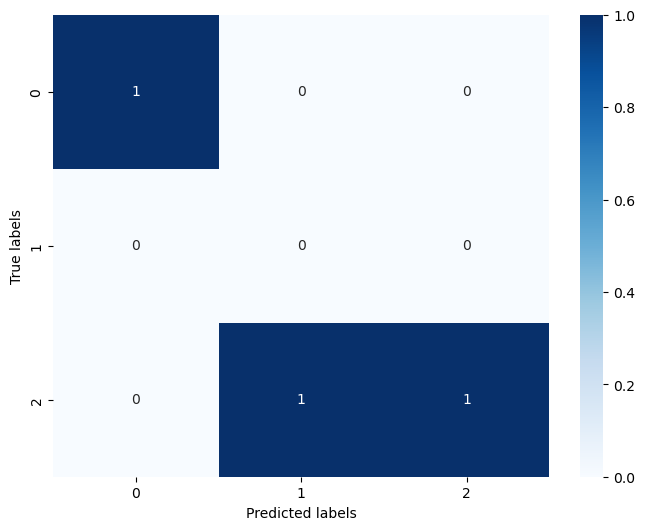

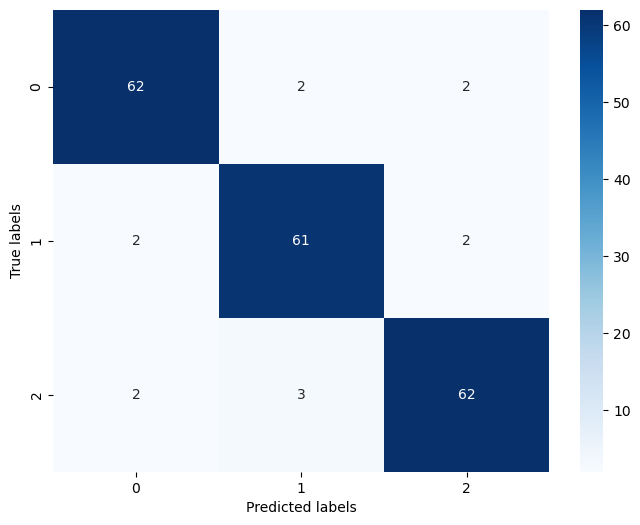

[1]	valid_0's multi_logloss: 1.10407
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10889
[3]	valid_0's multi_logloss: 1.11527
[4]	valid_0's multi_logloss: 1.11475
[5]	valid_0's multi_logloss: 1.11896
[6]	valid_0's multi_logloss: 1.12531
[7]	valid_0's multi_logloss: 1.13004
[8]	valid_0's multi_logloss: 1.13066
[9]	valid_0's multi_logloss: 1.13006
[10]	valid_0's multi_logloss: 1.13523
[11]	valid_0's multi_logloss: 1.1416
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10407
[1]	valid_0's multi_logloss: 1.10313
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.11022
[3]	valid_0's multi_logloss: 1.11292
[4]	valid_0's multi_logloss: 1.11309
[5]	valid_0's multi_logloss: 1.11945
[6]	valid_0's multi_logloss: 1.12474
[7]	valid_0's multi_logloss: 1.12871
[8]	valid_0's multi_logloss: 1.12835
[9]	valid_0's multi_logloss: 1.13054
[10]	valid_0's multi_logloss: 1.14001
[11]	valid_0's multi_loglos

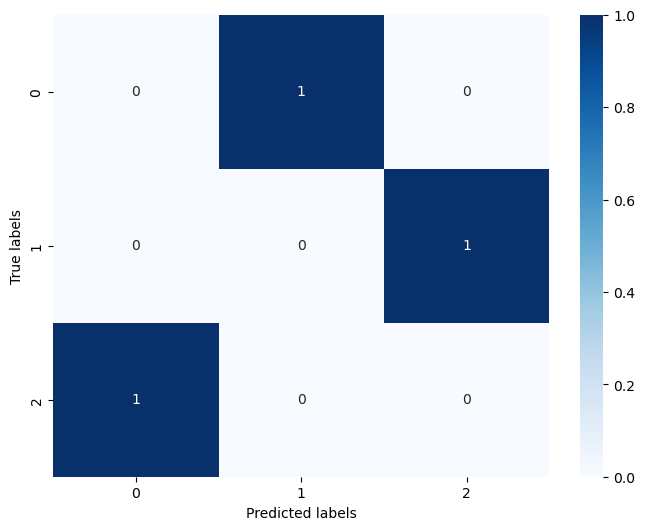

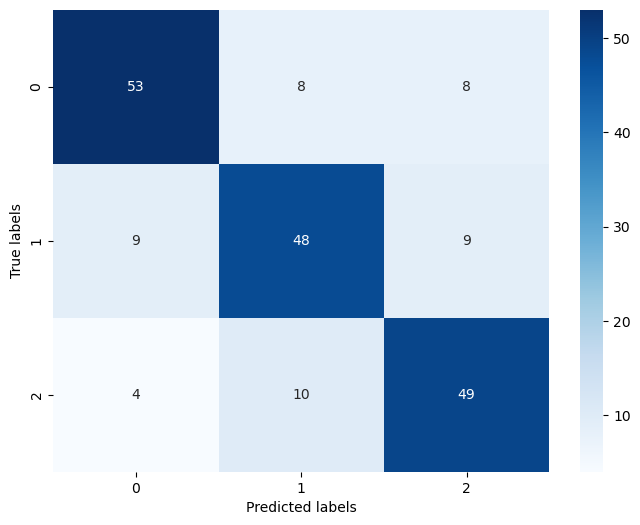

[1]	valid_0's multi_logloss: 1.10145
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10265
[3]	valid_0's multi_logloss: 1.1008
[4]	valid_0's multi_logloss: 1.0968
[5]	valid_0's multi_logloss: 1.09642
[6]	valid_0's multi_logloss: 1.09371
[7]	valid_0's multi_logloss: 1.09109
[8]	valid_0's multi_logloss: 1.09194
[9]	valid_0's multi_logloss: 1.09091
[10]	valid_0's multi_logloss: 1.08861
[11]	valid_0's multi_logloss: 1.08846
[12]	valid_0's multi_logloss: 1.0861
[13]	valid_0's multi_logloss: 1.08656
[14]	valid_0's multi_logloss: 1.08392
[15]	valid_0's multi_logloss: 1.0838
[16]	valid_0's multi_logloss: 1.08053
[17]	valid_0's multi_logloss: 1.07658
[18]	valid_0's multi_logloss: 1.07514
[19]	valid_0's multi_logloss: 1.07125
[20]	valid_0's multi_logloss: 1.07368
[21]	valid_0's multi_logloss: 1.07014
[22]	valid_0's multi_logloss: 1.06719
[23]	valid_0's multi_logloss: 1.06864
[24]	valid_0's multi_logloss: 1.06808
[25]	valid_0's multi_logloss: 1.06643
[2

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


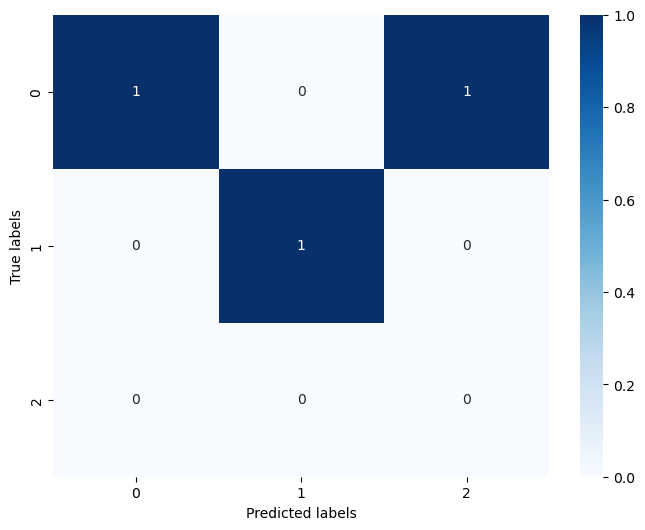

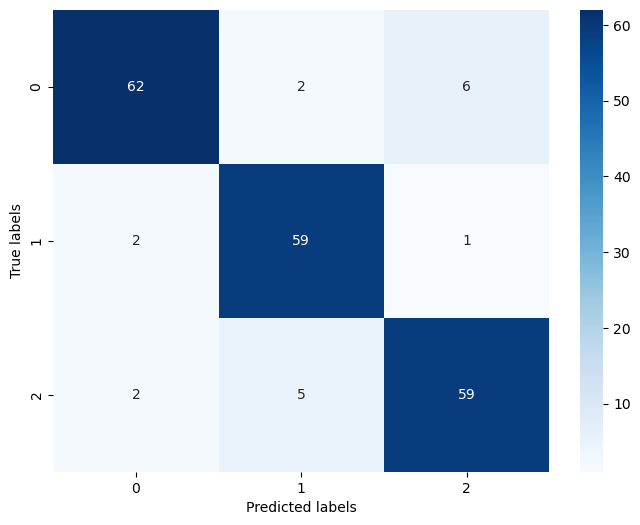

[1]	valid_0's multi_logloss: 1.09559
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09178
[3]	valid_0's multi_logloss: 1.08683
[4]	valid_0's multi_logloss: 1.08804
[5]	valid_0's multi_logloss: 1.08505
[6]	valid_0's multi_logloss: 1.08687
[7]	valid_0's multi_logloss: 1.08851
[8]	valid_0's multi_logloss: 1.09099
[9]	valid_0's multi_logloss: 1.0885
[10]	valid_0's multi_logloss: 1.08129
[11]	valid_0's multi_logloss: 1.07715
[12]	valid_0's multi_logloss: 1.07775
[13]	valid_0's multi_logloss: 1.07853
[14]	valid_0's multi_logloss: 1.07319
[15]	valid_0's multi_logloss: 1.07557
[16]	valid_0's multi_logloss: 1.07059
[17]	valid_0's multi_logloss: 1.07142
[18]	valid_0's multi_logloss: 1.07498
[19]	valid_0's multi_logloss: 1.07116
[20]	valid_0's multi_logloss: 1.0715
[21]	valid_0's multi_logloss: 1.06864
[22]	valid_0's multi_logloss: 1.06654
[23]	valid_0's multi_logloss: 1.06765
[24]	valid_0's multi_logloss: 1.067
[25]	valid_0's multi_logloss: 1.06564
[2

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


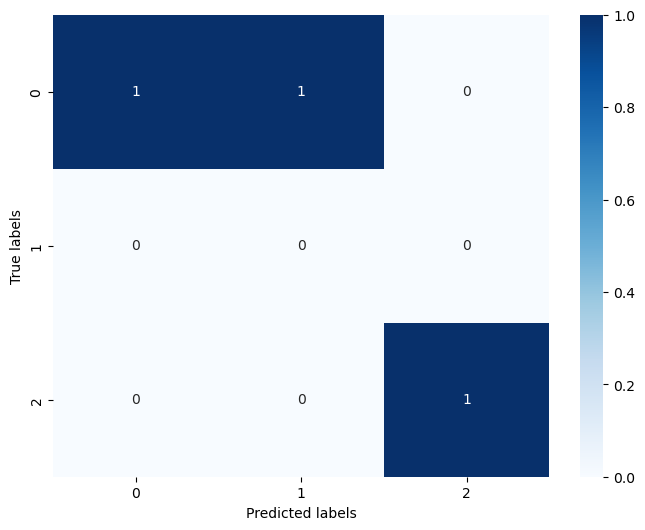

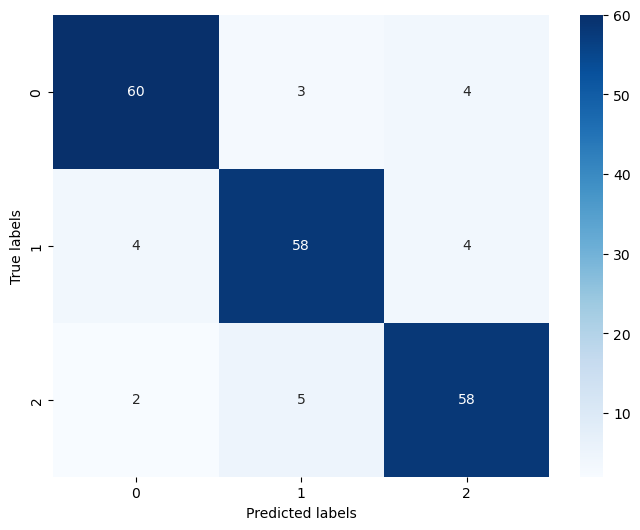

[1]	valid_0's multi_logloss: 1.09565
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.0972
[3]	valid_0's multi_logloss: 1.09392
[4]	valid_0's multi_logloss: 1.09448
[5]	valid_0's multi_logloss: 1.09002
[6]	valid_0's multi_logloss: 1.09001
[7]	valid_0's multi_logloss: 1.09089
[8]	valid_0's multi_logloss: 1.09093
[9]	valid_0's multi_logloss: 1.08351
[10]	valid_0's multi_logloss: 1.08488
[11]	valid_0's multi_logloss: 1.08161
[12]	valid_0's multi_logloss: 1.07819
[13]	valid_0's multi_logloss: 1.0792
[14]	valid_0's multi_logloss: 1.07545
[15]	valid_0's multi_logloss: 1.07548
[16]	valid_0's multi_logloss: 1.07501
[17]	valid_0's multi_logloss: 1.07636
[18]	valid_0's multi_logloss: 1.07099
[19]	valid_0's multi_logloss: 1.06573
[20]	valid_0's multi_logloss: 1.06437
[21]	valid_0's multi_logloss: 1.05737
[22]	valid_0's multi_logloss: 1.06148
[23]	valid_0's multi_logloss: 1.06076
[24]	valid_0's multi_logloss: 1.05758
[25]	valid_0's multi_logloss: 1.05232


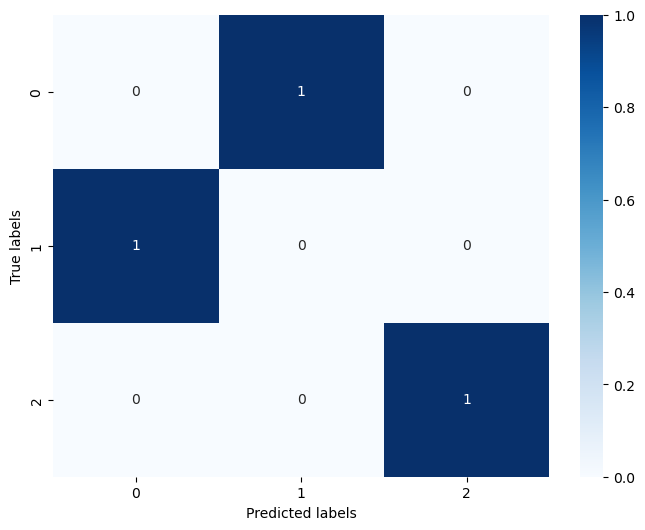

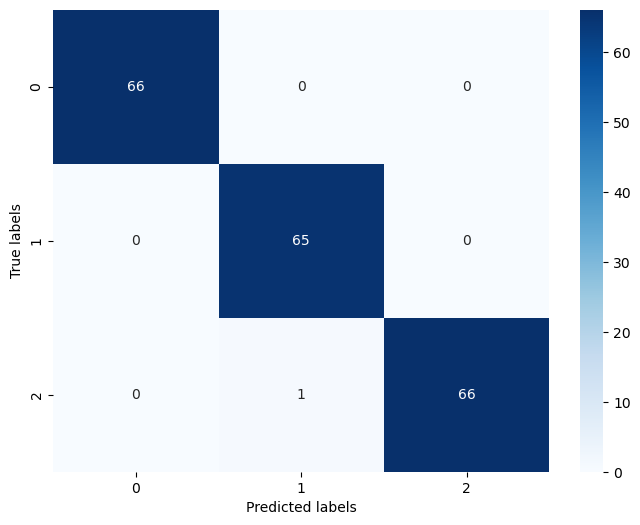

[1]	valid_0's multi_logloss: 1.09604
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09616
[3]	valid_0's multi_logloss: 1.09496
[4]	valid_0's multi_logloss: 1.0927
[5]	valid_0's multi_logloss: 1.09353
[6]	valid_0's multi_logloss: 1.09117
[7]	valid_0's multi_logloss: 1.09067
[8]	valid_0's multi_logloss: 1.08642
[9]	valid_0's multi_logloss: 1.09012
[10]	valid_0's multi_logloss: 1.09058
[11]	valid_0's multi_logloss: 1.08487
[12]	valid_0's multi_logloss: 1.08671
[13]	valid_0's multi_logloss: 1.08335
[14]	valid_0's multi_logloss: 1.08384
[15]	valid_0's multi_logloss: 1.07827
[16]	valid_0's multi_logloss: 1.07853
[17]	valid_0's multi_logloss: 1.07535
[18]	valid_0's multi_logloss: 1.07682
[19]	valid_0's multi_logloss: 1.07321
[20]	valid_0's multi_logloss: 1.06778
[21]	valid_0's multi_logloss: 1.06973
[22]	valid_0's multi_logloss: 1.06909
[23]	valid_0's multi_logloss: 1.06714
[24]	valid_0's multi_logloss: 1.06323
[25]	valid_0's multi_logloss: 1.05465

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


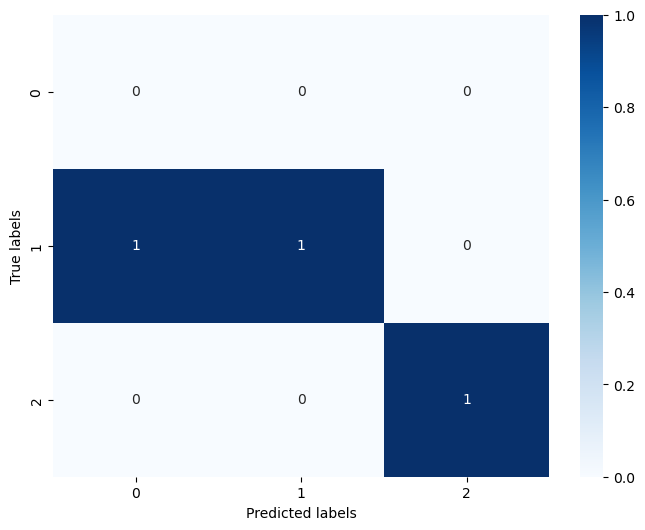

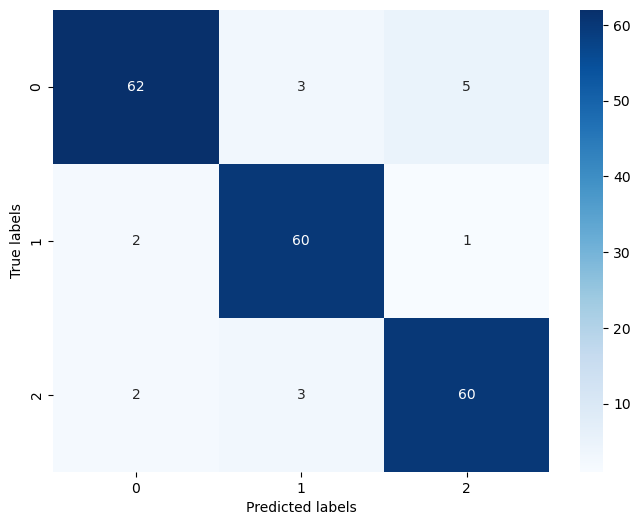

[1]	valid_0's multi_logloss: 1.08964
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08084
[3]	valid_0's multi_logloss: 1.07285
[4]	valid_0's multi_logloss: 1.06902
[5]	valid_0's multi_logloss: 1.06059
[6]	valid_0's multi_logloss: 1.05473
[7]	valid_0's multi_logloss: 1.04972
[8]	valid_0's multi_logloss: 1.04667
[9]	valid_0's multi_logloss: 1.04291
[10]	valid_0's multi_logloss: 1.03722
[11]	valid_0's multi_logloss: 1.03145
[12]	valid_0's multi_logloss: 1.02927
[13]	valid_0's multi_logloss: 1.02529
[14]	valid_0's multi_logloss: 1.01989
[15]	valid_0's multi_logloss: 1.01897
[16]	valid_0's multi_logloss: 1.01482
[17]	valid_0's multi_logloss: 1.01128
[18]	valid_0's multi_logloss: 1.00741
[19]	valid_0's multi_logloss: 1.00221
[20]	valid_0's multi_logloss: 1.00144
[21]	valid_0's multi_logloss: 1.00243
[22]	valid_0's multi_logloss: 0.996878
[23]	valid_0's multi_logloss: 0.997454
[24]	valid_0's multi_logloss: 0.992637
[25]	valid_0's multi_logloss: 0.9

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


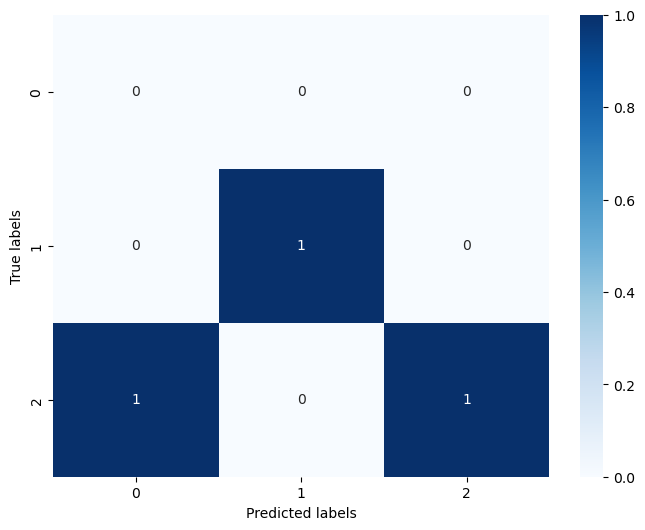

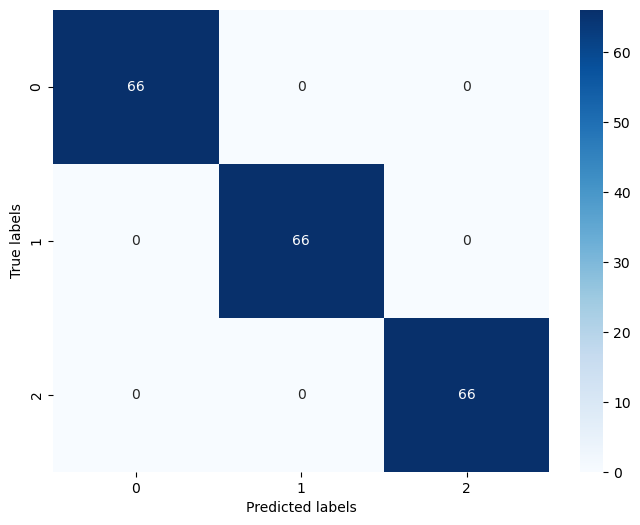

[1]	valid_0's multi_logloss: 1.09281
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08858
[3]	valid_0's multi_logloss: 1.08182
[4]	valid_0's multi_logloss: 1.084
[5]	valid_0's multi_logloss: 1.07995
[6]	valid_0's multi_logloss: 1.07401
[7]	valid_0's multi_logloss: 1.07386
[8]	valid_0's multi_logloss: 1.06807
[9]	valid_0's multi_logloss: 1.06328
[10]	valid_0's multi_logloss: 1.05985
[11]	valid_0's multi_logloss: 1.05623
[12]	valid_0's multi_logloss: 1.05171
[13]	valid_0's multi_logloss: 1.04682
[14]	valid_0's multi_logloss: 1.04116
[15]	valid_0's multi_logloss: 1.03568
[16]	valid_0's multi_logloss: 1.03241
[17]	valid_0's multi_logloss: 1.0331
[18]	valid_0's multi_logloss: 1.02509
[19]	valid_0's multi_logloss: 1.0225
[20]	valid_0's multi_logloss: 1.0202
[21]	valid_0's multi_logloss: 1.01753
[22]	valid_0's multi_logloss: 1.01824
[23]	valid_0's multi_logloss: 1.01721
[24]	valid_0's multi_logloss: 1.01927
[25]	valid_0's multi_logloss: 1.01384
[26

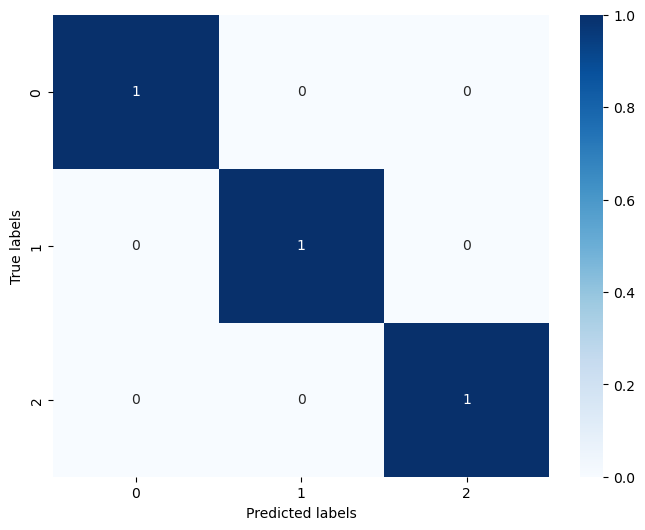

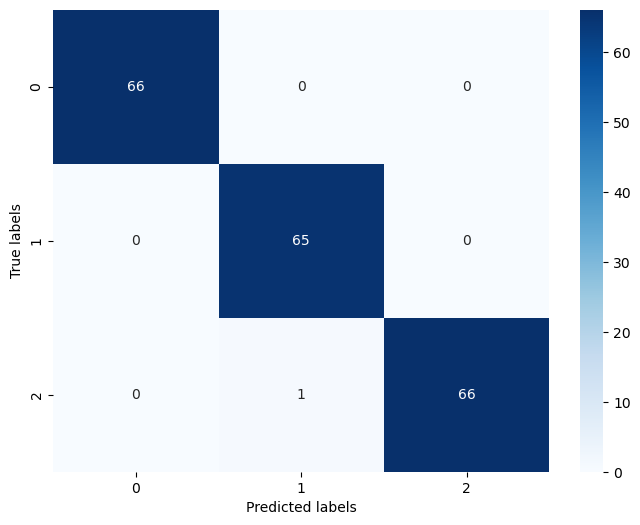

[1]	valid_0's multi_logloss: 1.09316
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08739
[3]	valid_0's multi_logloss: 1.08302
[4]	valid_0's multi_logloss: 1.08135
[5]	valid_0's multi_logloss: 1.07612
[6]	valid_0's multi_logloss: 1.07237
[7]	valid_0's multi_logloss: 1.06679
[8]	valid_0's multi_logloss: 1.05919
[9]	valid_0's multi_logloss: 1.05607
[10]	valid_0's multi_logloss: 1.05138
[11]	valid_0's multi_logloss: 1.04731
[12]	valid_0's multi_logloss: 1.04426
[13]	valid_0's multi_logloss: 1.0403
[14]	valid_0's multi_logloss: 1.03595
[15]	valid_0's multi_logloss: 1.03019
[16]	valid_0's multi_logloss: 1.02465
[17]	valid_0's multi_logloss: 1.0231
[18]	valid_0's multi_logloss: 1.01855
[19]	valid_0's multi_logloss: 1.0166
[20]	valid_0's multi_logloss: 1.01079
[21]	valid_0's multi_logloss: 1.00547
[22]	valid_0's multi_logloss: 1.00107
[23]	valid_0's multi_logloss: 0.994179
[24]	valid_0's multi_logloss: 0.991585
[25]	valid_0's multi_logloss: 0.98907

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


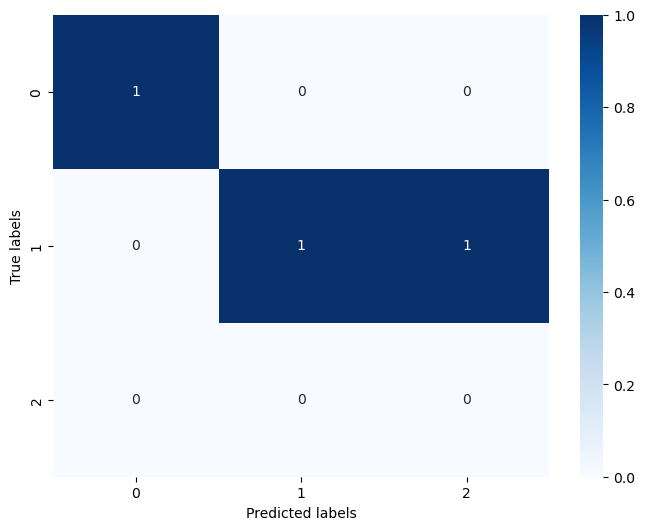

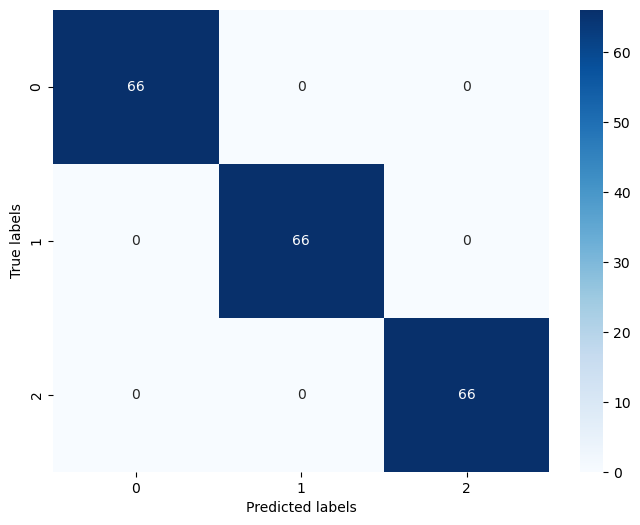

[1]	valid_0's multi_logloss: 1.10246
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10633
[3]	valid_0's multi_logloss: 1.10871
[4]	valid_0's multi_logloss: 1.10924
[5]	valid_0's multi_logloss: 1.11448
[6]	valid_0's multi_logloss: 1.11835
[7]	valid_0's multi_logloss: 1.12388
[8]	valid_0's multi_logloss: 1.12848
[9]	valid_0's multi_logloss: 1.12663
[10]	valid_0's multi_logloss: 1.12509
[11]	valid_0's multi_logloss: 1.12361
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10246
[1]	valid_0's multi_logloss: 1.1007
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10451
[3]	valid_0's multi_logloss: 1.10647
[4]	valid_0's multi_logloss: 1.10546
[5]	valid_0's multi_logloss: 1.10924
[6]	valid_0's multi_logloss: 1.11145
[7]	valid_0's multi_logloss: 1.11816
[8]	valid_0's multi_logloss: 1.12108
[9]	valid_0's multi_logloss: 1.11819
[10]	valid_0's multi_logloss: 1.11689
[11]	valid_0's multi_loglos

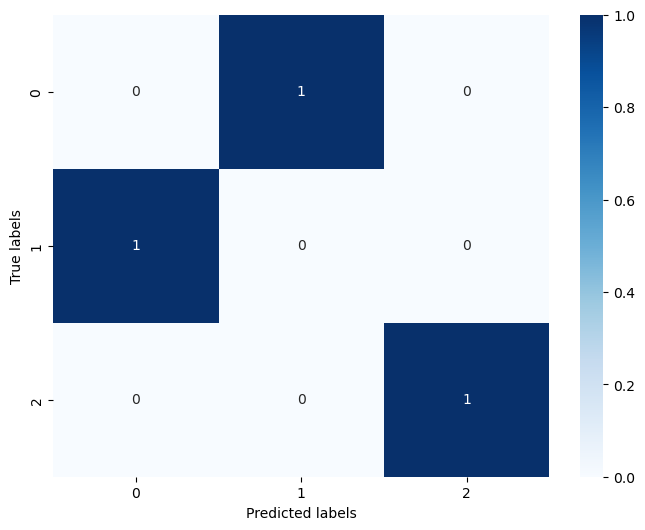

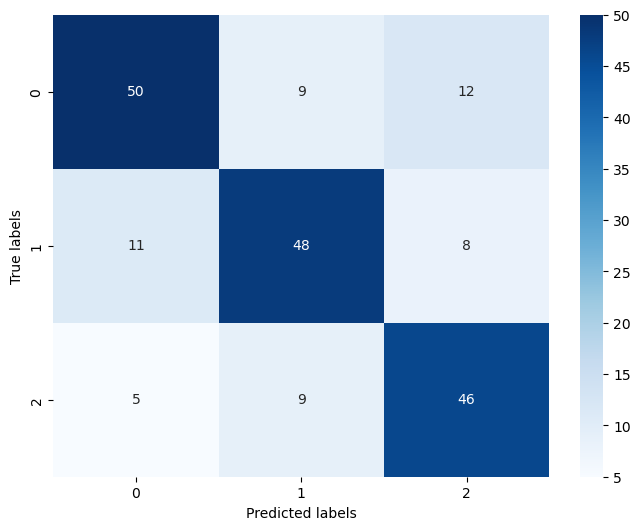

[1]	valid_0's multi_logloss: 1.09395
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09088
[3]	valid_0's multi_logloss: 1.08525
[4]	valid_0's multi_logloss: 1.08057
[5]	valid_0's multi_logloss: 1.07764
[6]	valid_0's multi_logloss: 1.07227
[7]	valid_0's multi_logloss: 1.06826
[8]	valid_0's multi_logloss: 1.06401
[9]	valid_0's multi_logloss: 1.062
[10]	valid_0's multi_logloss: 1.05657
[11]	valid_0's multi_logloss: 1.05147
[12]	valid_0's multi_logloss: 1.04599
[13]	valid_0's multi_logloss: 1.0418
[14]	valid_0's multi_logloss: 1.03689
[15]	valid_0's multi_logloss: 1.03453
[16]	valid_0's multi_logloss: 1.02836
[17]	valid_0's multi_logloss: 1.02894
[18]	valid_0's multi_logloss: 1.02327
[19]	valid_0's multi_logloss: 1.01735
[20]	valid_0's multi_logloss: 1.01604
[21]	valid_0's multi_logloss: 1.00894
[22]	valid_0's multi_logloss: 1.00883
[23]	valid_0's multi_logloss: 1.01056
[24]	valid_0's multi_logloss: 1.00738
[25]	valid_0's multi_logloss: 1.00733
[

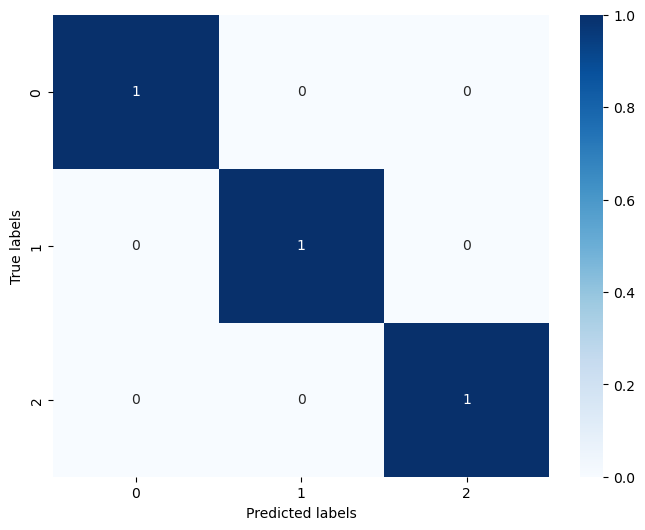

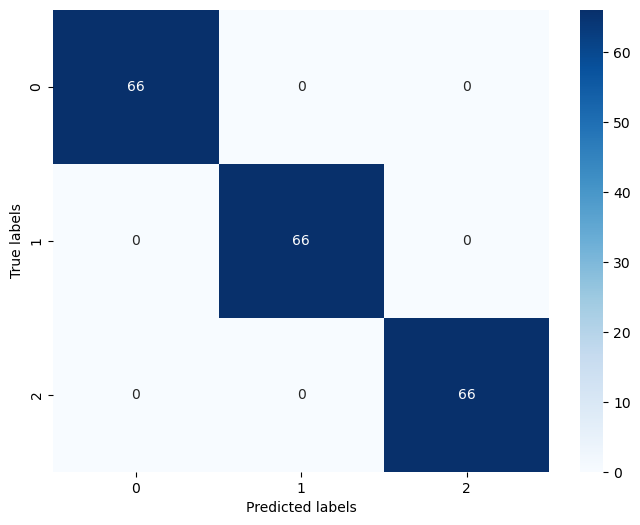

[1]	valid_0's multi_logloss: 1.09571
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09131
[3]	valid_0's multi_logloss: 1.08908
[4]	valid_0's multi_logloss: 1.09258
[5]	valid_0's multi_logloss: 1.09075
[6]	valid_0's multi_logloss: 1.08812
[7]	valid_0's multi_logloss: 1.08542
[8]	valid_0's multi_logloss: 1.08338
[9]	valid_0's multi_logloss: 1.08466
[10]	valid_0's multi_logloss: 1.08593
[11]	valid_0's multi_logloss: 1.08674
[12]	valid_0's multi_logloss: 1.08519
[13]	valid_0's multi_logloss: 1.08561
[14]	valid_0's multi_logloss: 1.08406
[15]	valid_0's multi_logloss: 1.08809
[16]	valid_0's multi_logloss: 1.08797
[17]	valid_0's multi_logloss: 1.08969
[18]	valid_0's multi_logloss: 1.09039
Early stopping, best iteration is:
[8]	valid_0's multi_logloss: 1.08338
[1]	valid_0's multi_logloss: 1.09713
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.0933
[3]	valid_0's multi_logloss: 1.08932
[4]	valid_0's multi_l

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


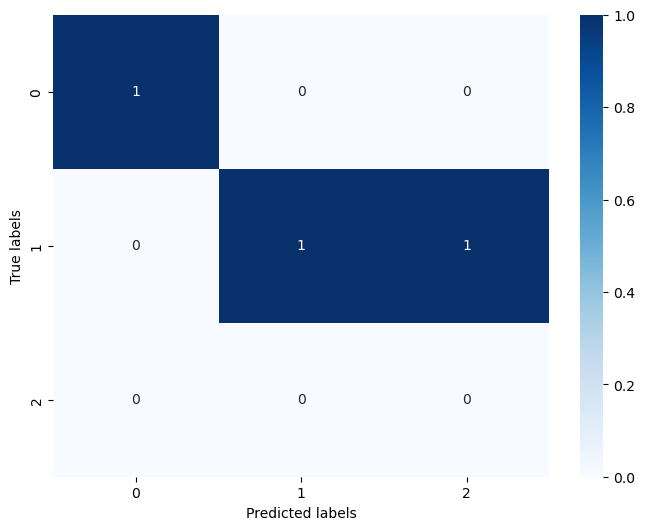

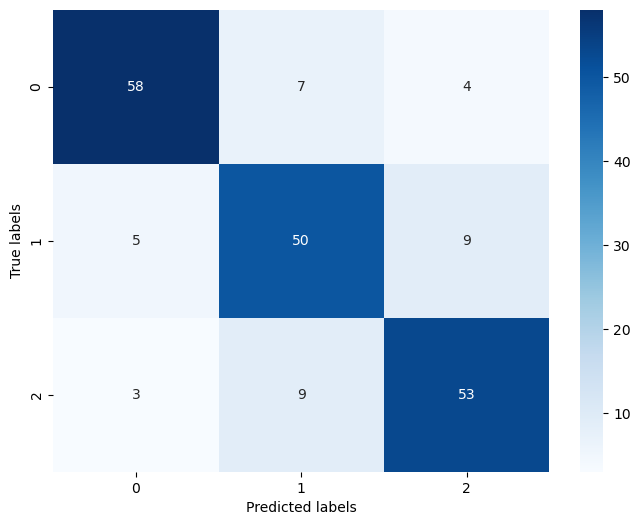

[1]	valid_0's multi_logloss: 1.09923
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09833
[3]	valid_0's multi_logloss: 1.09864
[4]	valid_0's multi_logloss: 1.09895
[5]	valid_0's multi_logloss: 1.09817
[6]	valid_0's multi_logloss: 1.1016
[7]	valid_0's multi_logloss: 1.09779
[8]	valid_0's multi_logloss: 1.09773
[9]	valid_0's multi_logloss: 1.09808
[10]	valid_0's multi_logloss: 1.09706
[11]	valid_0's multi_logloss: 1.0962
[12]	valid_0's multi_logloss: 1.09419
[13]	valid_0's multi_logloss: 1.09144
[14]	valid_0's multi_logloss: 1.09227
[15]	valid_0's multi_logloss: 1.09172
[16]	valid_0's multi_logloss: 1.09259
[17]	valid_0's multi_logloss: 1.09467
[18]	valid_0's multi_logloss: 1.09355
[19]	valid_0's multi_logloss: 1.09025
[20]	valid_0's multi_logloss: 1.09115
[21]	valid_0's multi_logloss: 1.08686
[22]	valid_0's multi_logloss: 1.08484
[23]	valid_0's multi_logloss: 1.07668
[24]	valid_0's multi_logloss: 1.07808
[25]	valid_0's multi_logloss: 1.07416


D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


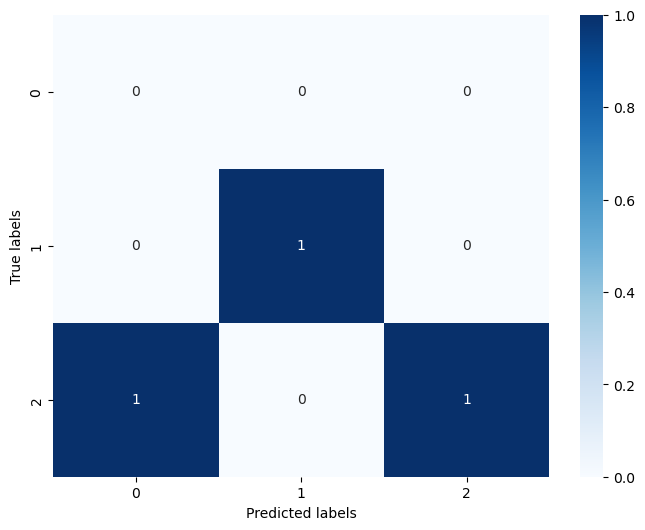

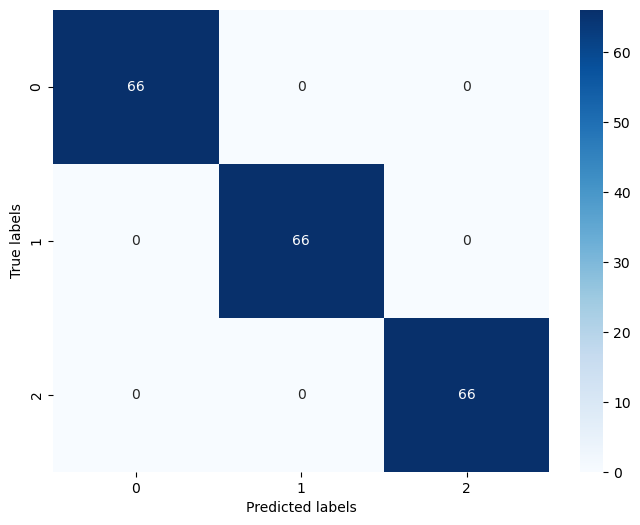

[1]	valid_0's multi_logloss: 1.10026
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10378
[3]	valid_0's multi_logloss: 1.10128
[4]	valid_0's multi_logloss: 1.09836
[5]	valid_0's multi_logloss: 1.09888
[6]	valid_0's multi_logloss: 1.10081
[7]	valid_0's multi_logloss: 1.10438
[8]	valid_0's multi_logloss: 1.10311
[9]	valid_0's multi_logloss: 1.10338
[10]	valid_0's multi_logloss: 1.09999
[11]	valid_0's multi_logloss: 1.09833
[12]	valid_0's multi_logloss: 1.09836
[13]	valid_0's multi_logloss: 1.09686
[14]	valid_0's multi_logloss: 1.09248
[15]	valid_0's multi_logloss: 1.08732
[16]	valid_0's multi_logloss: 1.08374
[17]	valid_0's multi_logloss: 1.0863
[18]	valid_0's multi_logloss: 1.08862
[19]	valid_0's multi_logloss: 1.08621
[20]	valid_0's multi_logloss: 1.08637
[21]	valid_0's multi_logloss: 1.08165
[22]	valid_0's multi_logloss: 1.0774
[23]	valid_0's multi_logloss: 1.08027
[24]	valid_0's multi_logloss: 1.07722
[25]	valid_0's multi_logloss: 1.07343


D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


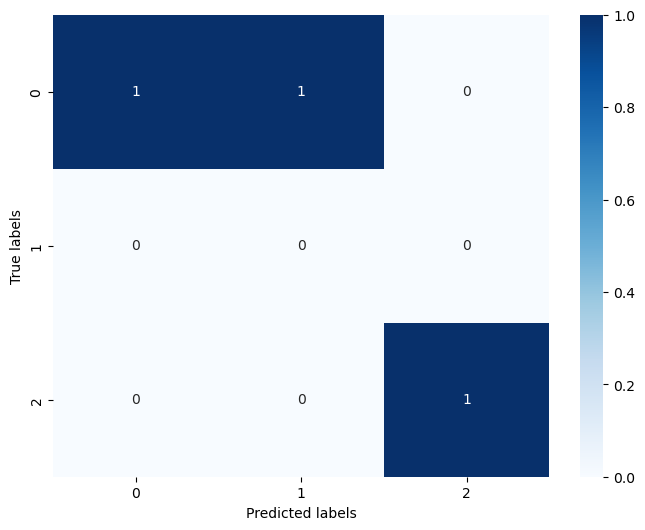

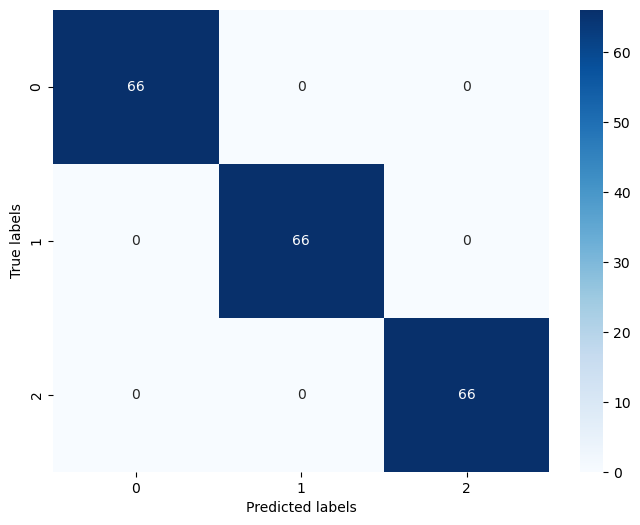

[1]	valid_0's multi_logloss: 1.10012
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10065
[3]	valid_0's multi_logloss: 1.09635
[4]	valid_0's multi_logloss: 1.09909
[5]	valid_0's multi_logloss: 1.09492
[6]	valid_0's multi_logloss: 1.09404
[7]	valid_0's multi_logloss: 1.09703
[8]	valid_0's multi_logloss: 1.10061
[9]	valid_0's multi_logloss: 1.09653
[10]	valid_0's multi_logloss: 1.09696
[11]	valid_0's multi_logloss: 1.09735
[12]	valid_0's multi_logloss: 1.08769
[13]	valid_0's multi_logloss: 1.08543
[14]	valid_0's multi_logloss: 1.07822
[15]	valid_0's multi_logloss: 1.07491
[16]	valid_0's multi_logloss: 1.07464
[17]	valid_0's multi_logloss: 1.07184
[18]	valid_0's multi_logloss: 1.0672
[19]	valid_0's multi_logloss: 1.06244
[20]	valid_0's multi_logloss: 1.06147
[21]	valid_0's multi_logloss: 1.06274
[22]	valid_0's multi_logloss: 1.07032
[23]	valid_0's multi_logloss: 1.07177
[24]	valid_0's multi_logloss: 1.06997
[25]	valid_0's multi_logloss: 1.0664


D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


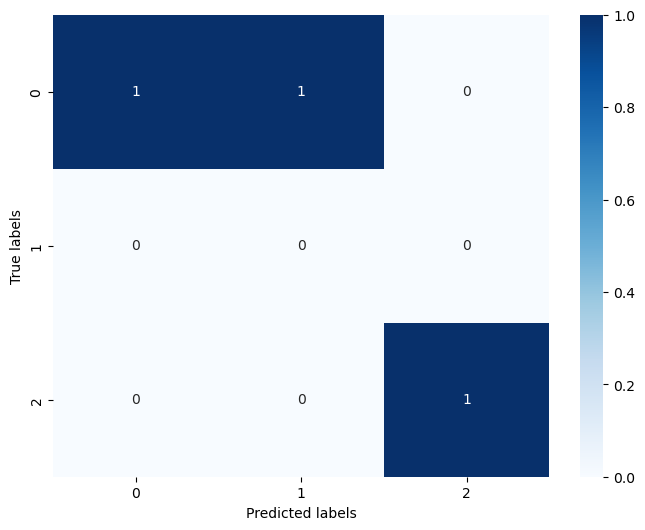

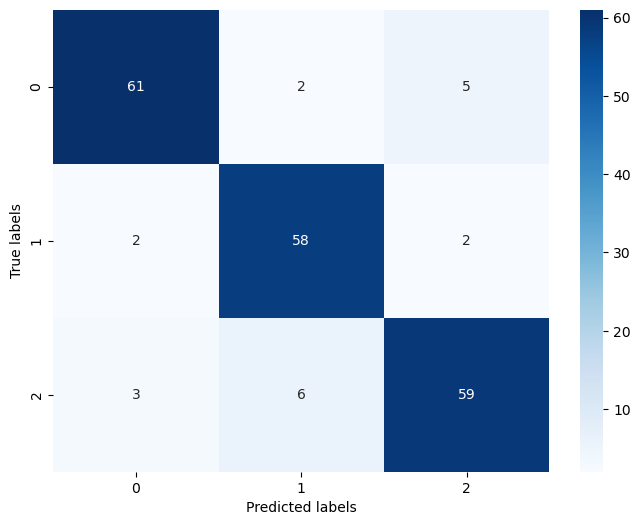

[1]	valid_0's multi_logloss: 1.10153
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10382
[3]	valid_0's multi_logloss: 1.10787
[4]	valid_0's multi_logloss: 1.11449
[5]	valid_0's multi_logloss: 1.11015
[6]	valid_0's multi_logloss: 1.10899
[7]	valid_0's multi_logloss: 1.10862
[8]	valid_0's multi_logloss: 1.10916
[9]	valid_0's multi_logloss: 1.11528
[10]	valid_0's multi_logloss: 1.11263
[11]	valid_0's multi_logloss: 1.11282
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10153
[1]	valid_0's multi_logloss: 1.10089
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10259
[3]	valid_0's multi_logloss: 1.1022
[4]	valid_0's multi_logloss: 1.10694
[5]	valid_0's multi_logloss: 1.10178
[6]	valid_0's multi_logloss: 1.09969
[7]	valid_0's multi_logloss: 1.10216
[8]	valid_0's multi_logloss: 1.09786
[9]	valid_0's multi_logloss: 1.10252
[10]	valid_0's multi_logloss: 1.10194
[11]	valid_0's multi_loglos

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


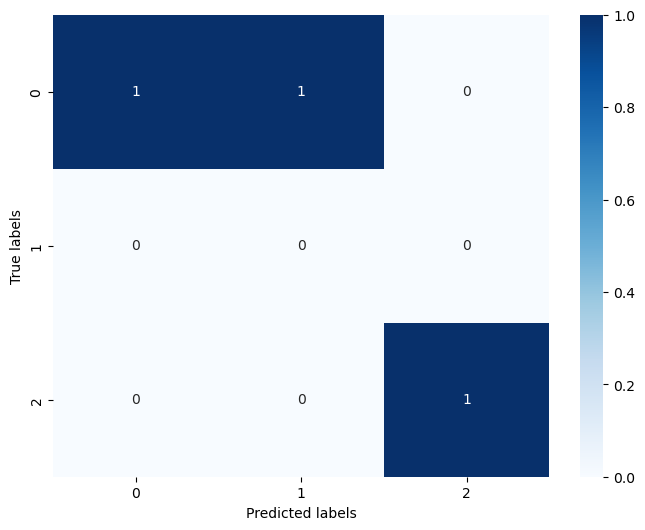

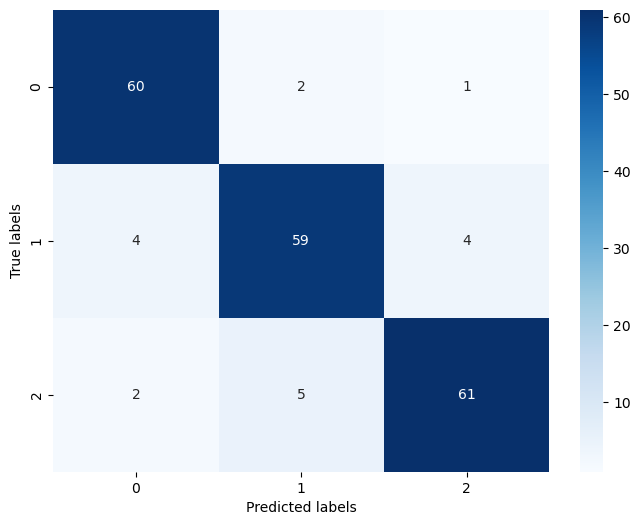

[1]	valid_0's multi_logloss: 1.09859
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09302
[3]	valid_0's multi_logloss: 1.09027
[4]	valid_0's multi_logloss: 1.09218
[5]	valid_0's multi_logloss: 1.08827
[6]	valid_0's multi_logloss: 1.08475
[7]	valid_0's multi_logloss: 1.08424
[8]	valid_0's multi_logloss: 1.09039
[9]	valid_0's multi_logloss: 1.08946
[10]	valid_0's multi_logloss: 1.08782
[11]	valid_0's multi_logloss: 1.08714
[12]	valid_0's multi_logloss: 1.09014
[13]	valid_0's multi_logloss: 1.0895
[14]	valid_0's multi_logloss: 1.09216
[15]	valid_0's multi_logloss: 1.09433
[16]	valid_0's multi_logloss: 1.0953
[17]	valid_0's multi_logloss: 1.09654
Early stopping, best iteration is:
[7]	valid_0's multi_logloss: 1.08424
[1]	valid_0's multi_logloss: 1.09882
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09585
[3]	valid_0's multi_logloss: 1.08892
[4]	valid_0's multi_logloss: 1.09169
[5]	valid_0's multi_log

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


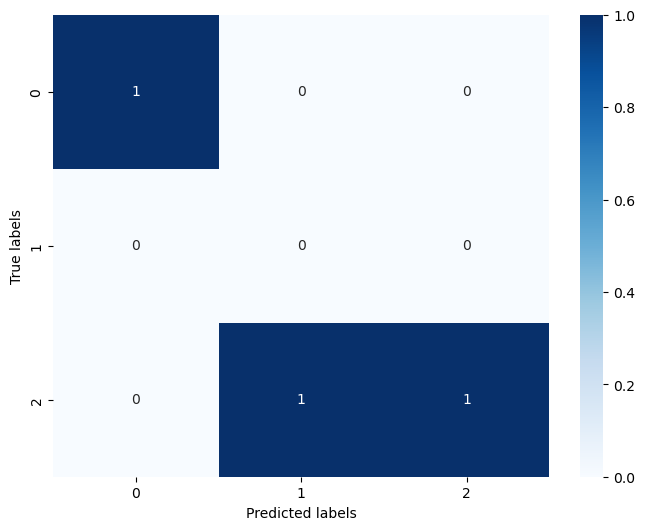

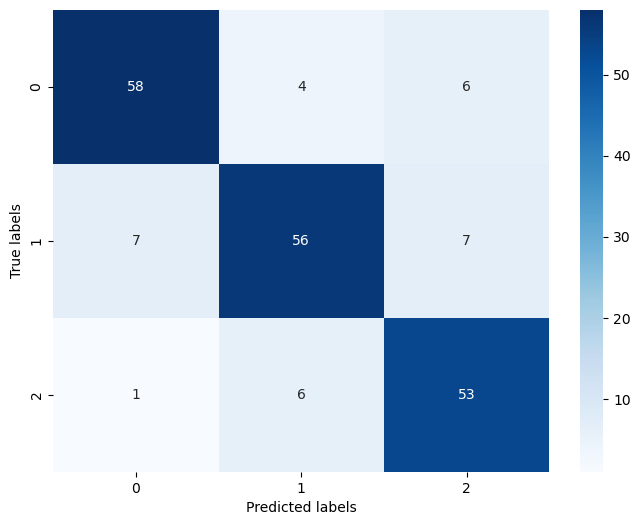

[1]	valid_0's multi_logloss: 1.10223
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.106
[3]	valid_0's multi_logloss: 1.1066
[4]	valid_0's multi_logloss: 1.1131
[5]	valid_0's multi_logloss: 1.11374
[6]	valid_0's multi_logloss: 1.11338
[7]	valid_0's multi_logloss: 1.11798
[8]	valid_0's multi_logloss: 1.12341
[9]	valid_0's multi_logloss: 1.12136
[10]	valid_0's multi_logloss: 1.12194
[11]	valid_0's multi_logloss: 1.12266
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.10223
[1]	valid_0's multi_logloss: 1.10198
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10551
[3]	valid_0's multi_logloss: 1.10557
[4]	valid_0's multi_logloss: 1.11249
[5]	valid_0's multi_logloss: 1.11355
[6]	valid_0's multi_logloss: 1.11297
[7]	valid_0's multi_logloss: 1.11692
[8]	valid_0's multi_logloss: 1.12281
[9]	valid_0's multi_logloss: 1.12382
[10]	valid_0's multi_logloss: 1.11933
[11]	valid_0's multi_logloss: 

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


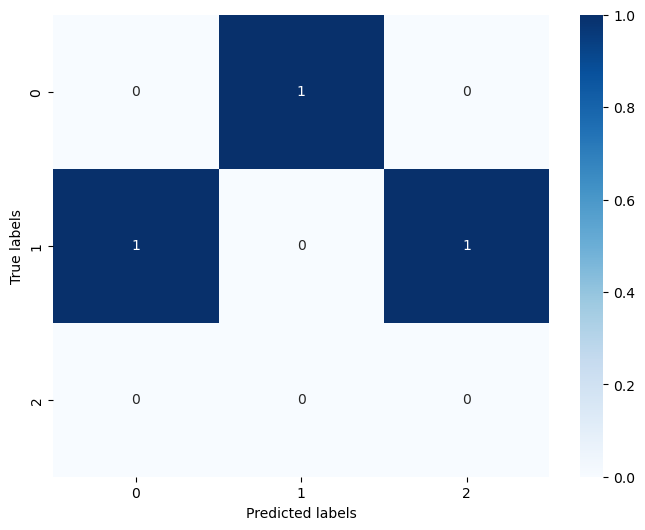

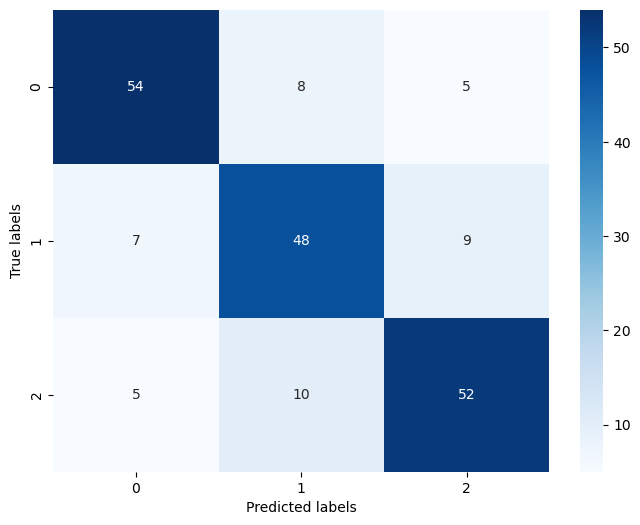

[1]	valid_0's multi_logloss: 1.09295
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09155
[3]	valid_0's multi_logloss: 1.08598
[4]	valid_0's multi_logloss: 1.08778
[5]	valid_0's multi_logloss: 1.08487
[6]	valid_0's multi_logloss: 1.07961
[7]	valid_0's multi_logloss: 1.08093
[8]	valid_0's multi_logloss: 1.07772
[9]	valid_0's multi_logloss: 1.07779
[10]	valid_0's multi_logloss: 1.07463
[11]	valid_0's multi_logloss: 1.07233
[12]	valid_0's multi_logloss: 1.07007
[13]	valid_0's multi_logloss: 1.06912
[14]	valid_0's multi_logloss: 1.0691
[15]	valid_0's multi_logloss: 1.0682
[16]	valid_0's multi_logloss: 1.07261
[17]	valid_0's multi_logloss: 1.07208
[18]	valid_0's multi_logloss: 1.07436
[19]	valid_0's multi_logloss: 1.07065
[20]	valid_0's multi_logloss: 1.06716
[21]	valid_0's multi_logloss: 1.07095
[22]	valid_0's multi_logloss: 1.07323
[23]	valid_0's multi_logloss: 1.07258
[24]	valid_0's multi_logloss: 1.07251
[25]	valid_0's multi_logloss: 1.06919


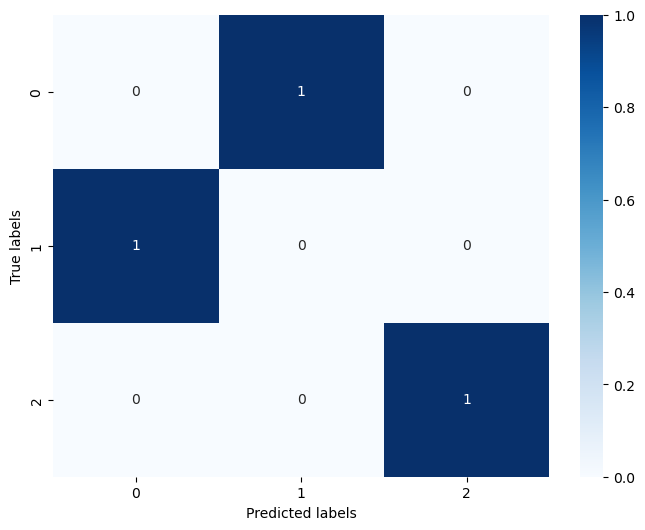

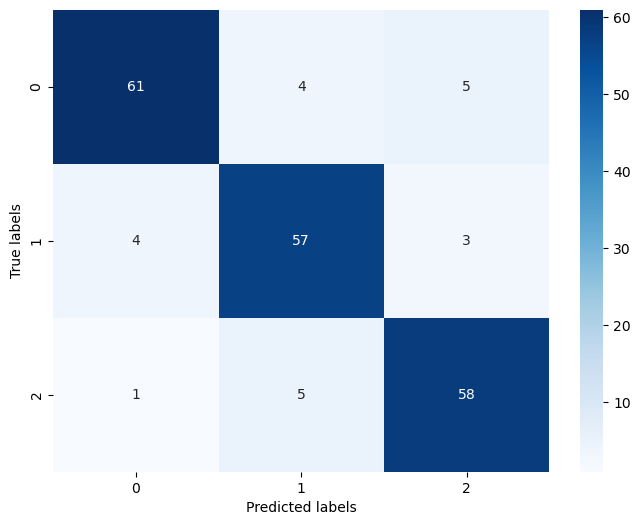

[1]	valid_0's multi_logloss: 1.0963
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09494
[3]	valid_0's multi_logloss: 1.09283
[4]	valid_0's multi_logloss: 1.08958
[5]	valid_0's multi_logloss: 1.08764
[6]	valid_0's multi_logloss: 1.08584
[7]	valid_0's multi_logloss: 1.09017
[8]	valid_0's multi_logloss: 1.08934
[9]	valid_0's multi_logloss: 1.0849
[10]	valid_0's multi_logloss: 1.08064
[11]	valid_0's multi_logloss: 1.07921
[12]	valid_0's multi_logloss: 1.07761
[13]	valid_0's multi_logloss: 1.07333
[14]	valid_0's multi_logloss: 1.07171
[15]	valid_0's multi_logloss: 1.06663
[16]	valid_0's multi_logloss: 1.05981
[17]	valid_0's multi_logloss: 1.06362
[18]	valid_0's multi_logloss: 1.06295
[19]	valid_0's multi_logloss: 1.05739
[20]	valid_0's multi_logloss: 1.05214
[21]	valid_0's multi_logloss: 1.04568
[22]	valid_0's multi_logloss: 1.04817
[23]	valid_0's multi_logloss: 1.04643
[24]	valid_0's multi_logloss: 1.04152
[25]	valid_0's multi_logloss: 1.03978


D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


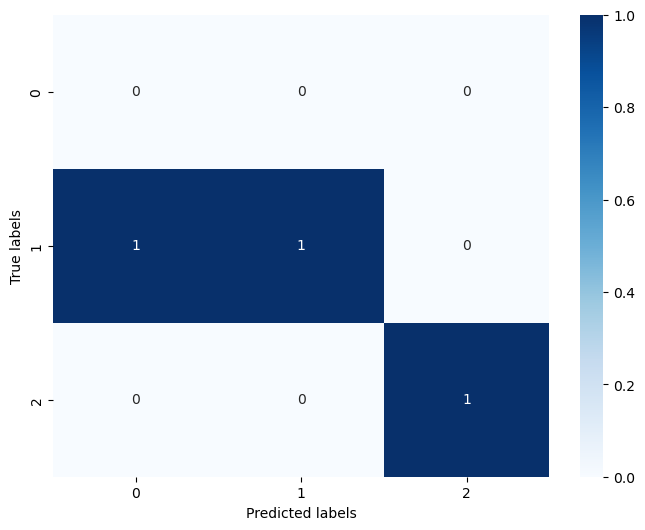

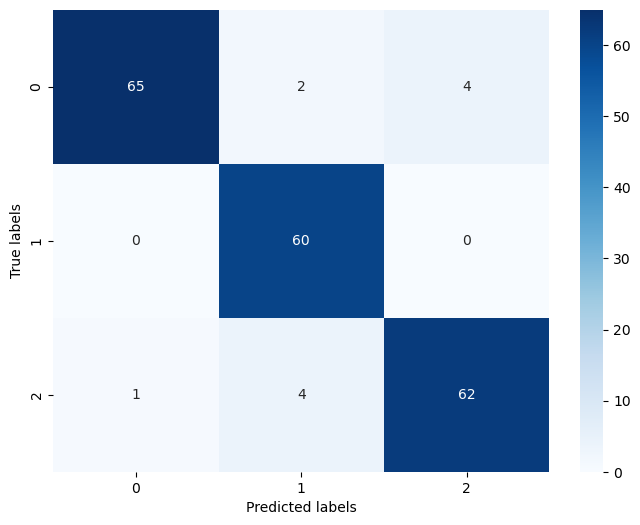

[1]	valid_0's multi_logloss: 1.09544
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.0936
[3]	valid_0's multi_logloss: 1.09054
[4]	valid_0's multi_logloss: 1.09247
[5]	valid_0's multi_logloss: 1.09122
[6]	valid_0's multi_logloss: 1.08748
[7]	valid_0's multi_logloss: 1.08735
[8]	valid_0's multi_logloss: 1.08847
[9]	valid_0's multi_logloss: 1.08811
[10]	valid_0's multi_logloss: 1.08549
[11]	valid_0's multi_logloss: 1.08187
[12]	valid_0's multi_logloss: 1.08078
[13]	valid_0's multi_logloss: 1.08305
[14]	valid_0's multi_logloss: 1.07949
[15]	valid_0's multi_logloss: 1.07928
[16]	valid_0's multi_logloss: 1.07987
[17]	valid_0's multi_logloss: 1.08119
[18]	valid_0's multi_logloss: 1.07874
[19]	valid_0's multi_logloss: 1.07726
[20]	valid_0's multi_logloss: 1.07809
[21]	valid_0's multi_logloss: 1.07565
[22]	valid_0's multi_logloss: 1.07553
[23]	valid_0's multi_logloss: 1.06963
[24]	valid_0's multi_logloss: 1.07123
[25]	valid_0's multi_logloss: 1.06741

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


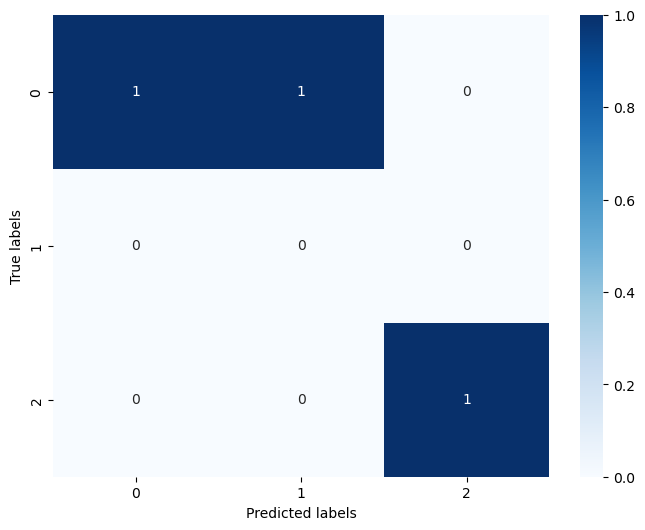

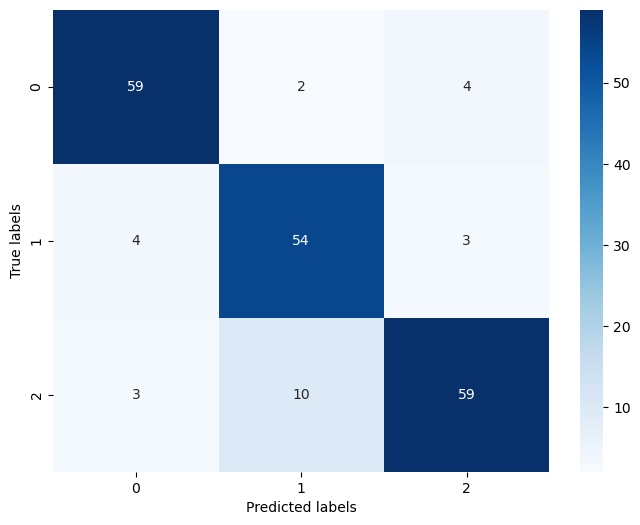

[1]	valid_0's multi_logloss: 1.09558
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08908
[3]	valid_0's multi_logloss: 1.08713
[4]	valid_0's multi_logloss: 1.084
[5]	valid_0's multi_logloss: 1.07606
[6]	valid_0's multi_logloss: 1.07621
[7]	valid_0's multi_logloss: 1.07305
[8]	valid_0's multi_logloss: 1.066
[9]	valid_0's multi_logloss: 1.06284
[10]	valid_0's multi_logloss: 1.0579
[11]	valid_0's multi_logloss: 1.05257
[12]	valid_0's multi_logloss: 1.04649
[13]	valid_0's multi_logloss: 1.04339
[14]	valid_0's multi_logloss: 1.04013
[15]	valid_0's multi_logloss: 1.03616
[16]	valid_0's multi_logloss: 1.03373
[17]	valid_0's multi_logloss: 1.03213
[18]	valid_0's multi_logloss: 1.03105
[19]	valid_0's multi_logloss: 1.03016
[20]	valid_0's multi_logloss: 1.02438
[21]	valid_0's multi_logloss: 1.02261
[22]	valid_0's multi_logloss: 1.01971
[23]	valid_0's multi_logloss: 1.01357
[24]	valid_0's multi_logloss: 1.01025
[25]	valid_0's multi_logloss: 1.00554
[26

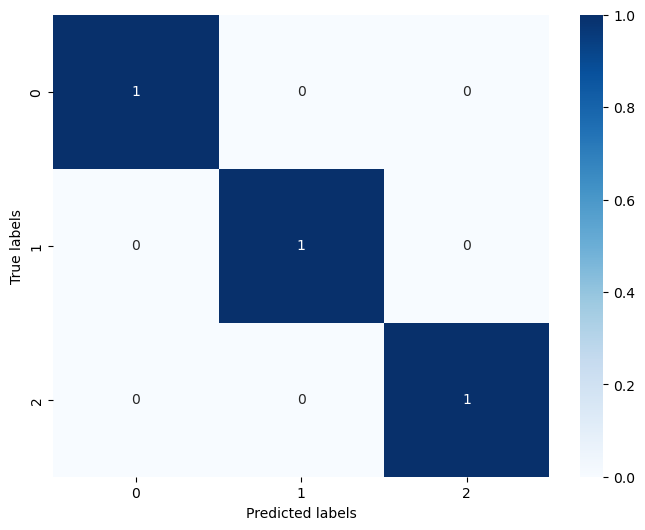

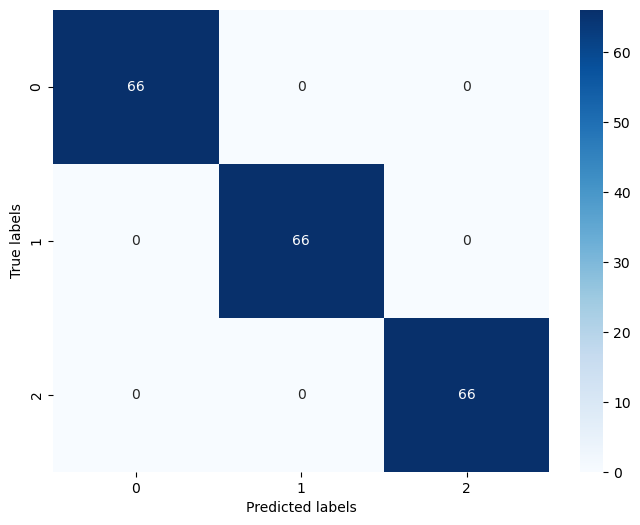

[1]	valid_0's multi_logloss: 1.09213
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.09195
[3]	valid_0's multi_logloss: 1.08567
[4]	valid_0's multi_logloss: 1.08699
[5]	valid_0's multi_logloss: 1.08795
[6]	valid_0's multi_logloss: 1.08641
[7]	valid_0's multi_logloss: 1.08283
[8]	valid_0's multi_logloss: 1.07816
[9]	valid_0's multi_logloss: 1.07752
[10]	valid_0's multi_logloss: 1.07518
[11]	valid_0's multi_logloss: 1.06987
[12]	valid_0's multi_logloss: 1.0646
[13]	valid_0's multi_logloss: 1.06135
[14]	valid_0's multi_logloss: 1.05606
[15]	valid_0's multi_logloss: 1.04995
[16]	valid_0's multi_logloss: 1.04436
[17]	valid_0's multi_logloss: 1.0432
[18]	valid_0's multi_logloss: 1.04164
[19]	valid_0's multi_logloss: 1.03848
[20]	valid_0's multi_logloss: 1.03412
[21]	valid_0's multi_logloss: 1.03272
[22]	valid_0's multi_logloss: 1.0317
[23]	valid_0's multi_logloss: 1.03414
[24]	valid_0's multi_logloss: 1.02993
[25]	valid_0's multi_logloss: 1.02892
[

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


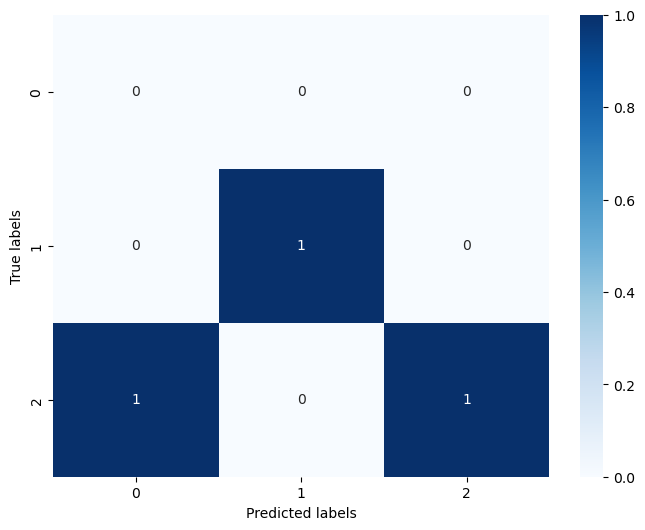

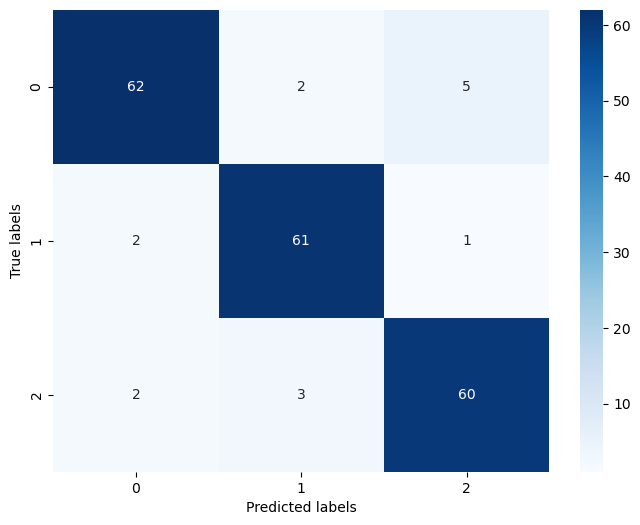

[1]	valid_0's multi_logloss: 1.09882
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10145
[3]	valid_0's multi_logloss: 1.09631
[4]	valid_0's multi_logloss: 1.1022
[5]	valid_0's multi_logloss: 1.1052
[6]	valid_0's multi_logloss: 1.10514
[7]	valid_0's multi_logloss: 1.11033
[8]	valid_0's multi_logloss: 1.10642
[9]	valid_0's multi_logloss: 1.11143
[10]	valid_0's multi_logloss: 1.1138
[11]	valid_0's multi_logloss: 1.10885
[12]	valid_0's multi_logloss: 1.10674
[13]	valid_0's multi_logloss: 1.10636
Early stopping, best iteration is:
[3]	valid_0's multi_logloss: 1.09631
[1]	valid_0's multi_logloss: 1.10026
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.10449
[3]	valid_0's multi_logloss: 1.10366
[4]	valid_0's multi_logloss: 1.11038
[5]	valid_0's multi_logloss: 1.10741
[6]	valid_0's multi_logloss: 1.10662
[7]	valid_0's multi_logloss: 1.11376
[8]	valid_0's multi_logloss: 1.10741
[9]	valid_0's multi_logloss:

D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


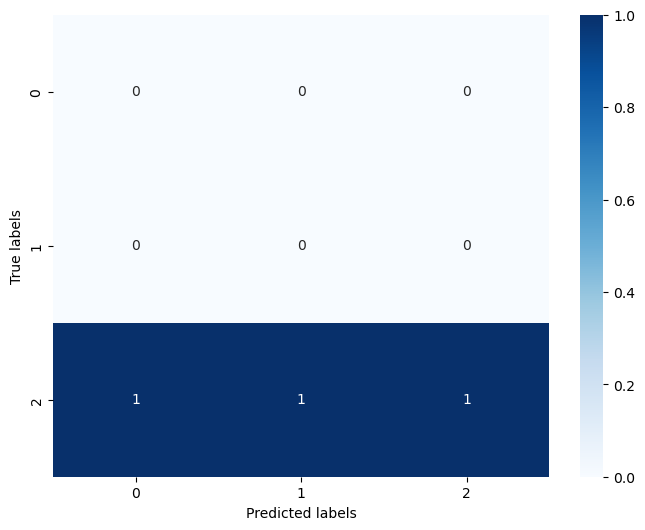

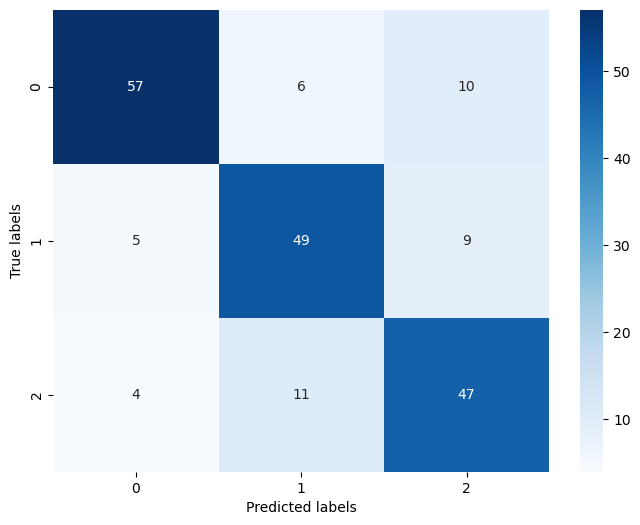

[1]	valid_0's multi_logloss: 1.09451
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08886
[3]	valid_0's multi_logloss: 1.08457
[4]	valid_0's multi_logloss: 1.08526
[5]	valid_0's multi_logloss: 1.08276
[6]	valid_0's multi_logloss: 1.08419
[7]	valid_0's multi_logloss: 1.08577
[8]	valid_0's multi_logloss: 1.08207
[9]	valid_0's multi_logloss: 1.07655
[10]	valid_0's multi_logloss: 1.07593
[11]	valid_0's multi_logloss: 1.07365
[12]	valid_0's multi_logloss: 1.07267
[13]	valid_0's multi_logloss: 1.07092
[14]	valid_0's multi_logloss: 1.06425
[15]	valid_0's multi_logloss: 1.06377
[16]	valid_0's multi_logloss: 1.06122
[17]	valid_0's multi_logloss: 1.06548
[18]	valid_0's multi_logloss: 1.06128
[19]	valid_0's multi_logloss: 1.06163
[20]	valid_0's multi_logloss: 1.06167
[21]	valid_0's multi_logloss: 1.05922
[22]	valid_0's multi_logloss: 1.06157
[23]	valid_0's multi_logloss: 1.0657
[24]	valid_0's multi_logloss: 1.0605
[25]	valid_0's multi_logloss: 1.06443


D:\WorkApp\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


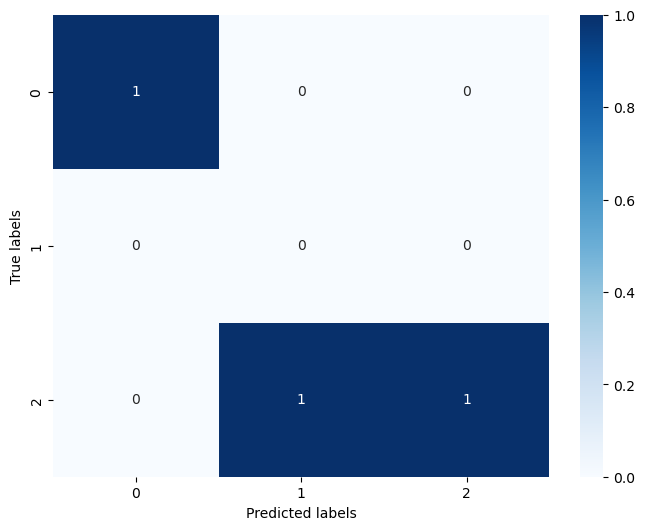

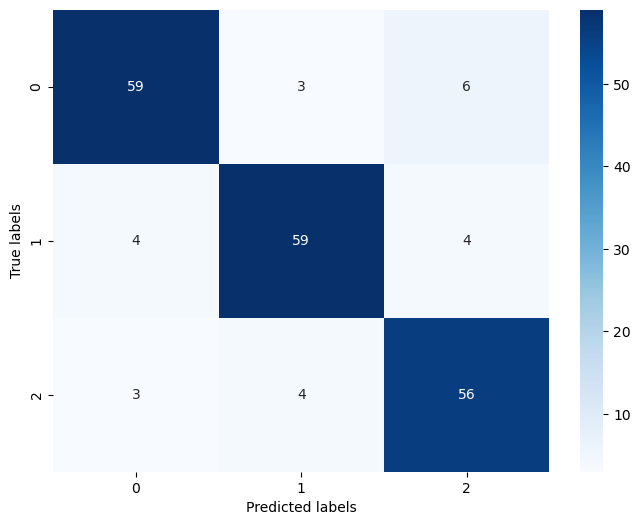

[1]	valid_0's multi_logloss: 1.08881
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08404
[3]	valid_0's multi_logloss: 1.07757
[4]	valid_0's multi_logloss: 1.07098
[5]	valid_0's multi_logloss: 1.06627
[6]	valid_0's multi_logloss: 1.06002
[7]	valid_0's multi_logloss: 1.0519
[8]	valid_0's multi_logloss: 1.04554
[9]	valid_0's multi_logloss: 1.03533
[10]	valid_0's multi_logloss: 1.02866
[11]	valid_0's multi_logloss: 1.02232
[12]	valid_0's multi_logloss: 1.01742
[13]	valid_0's multi_logloss: 1.00618
[14]	valid_0's multi_logloss: 0.996467
[15]	valid_0's multi_logloss: 0.993874
[16]	valid_0's multi_logloss: 0.984855
[17]	valid_0's multi_logloss: 0.980145
[18]	valid_0's multi_logloss: 0.974333
[19]	valid_0's multi_logloss: 0.965624
[20]	valid_0's multi_logloss: 0.957261
[21]	valid_0's multi_logloss: 0.949293
[22]	valid_0's multi_logloss: 0.947
[23]	valid_0's multi_logloss: 0.940315
[24]	valid_0's multi_logloss: 0.935525
[25]	valid_0's multi_logloss:

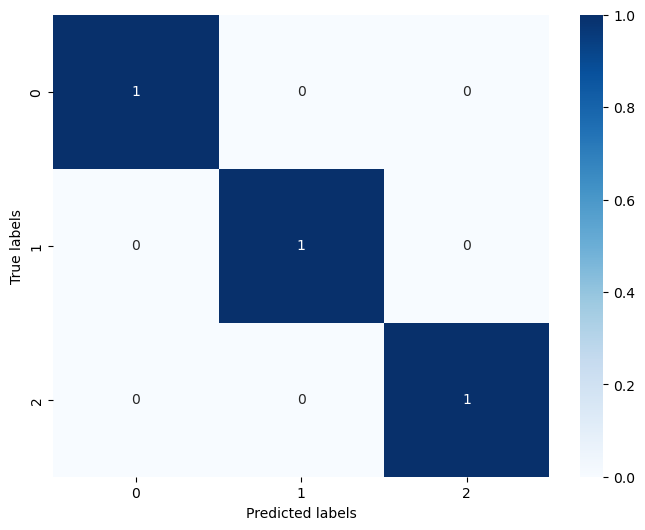

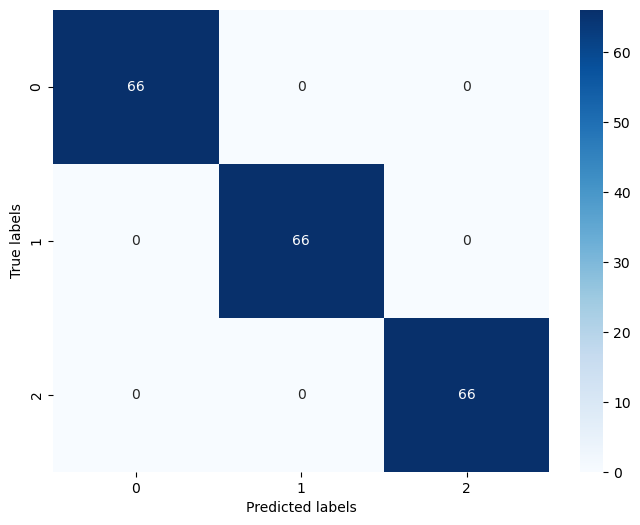

[1]	valid_0's multi_logloss: 1.09253
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.08707
[3]	valid_0's multi_logloss: 1.08206
[4]	valid_0's multi_logloss: 1.07376
[5]	valid_0's multi_logloss: 1.06857
[6]	valid_0's multi_logloss: 1.06486
[7]	valid_0's multi_logloss: 1.06194
[8]	valid_0's multi_logloss: 1.05768
[9]	valid_0's multi_logloss: 1.05292
[10]	valid_0's multi_logloss: 1.0502
[11]	valid_0's multi_logloss: 1.0396
[12]	valid_0's multi_logloss: 1.02911
[13]	valid_0's multi_logloss: 1.02085
[14]	valid_0's multi_logloss: 1.01142
[15]	valid_0's multi_logloss: 1.0023
[16]	valid_0's multi_logloss: 0.99115
[17]	valid_0's multi_logloss: 0.983322
[18]	valid_0's multi_logloss: 0.987494
[19]	valid_0's multi_logloss: 0.979864
[20]	valid_0's multi_logloss: 0.973134
[21]	valid_0's multi_logloss: 0.968301
[22]	valid_0's multi_logloss: 0.959387
[23]	valid_0's multi_logloss: 0.959686
[24]	valid_0's multi_logloss: 0.951671
[25]	valid_0's multi_logloss: 0

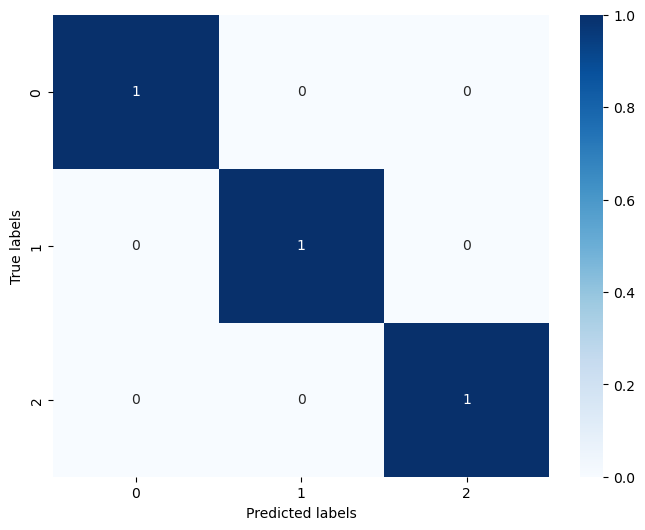

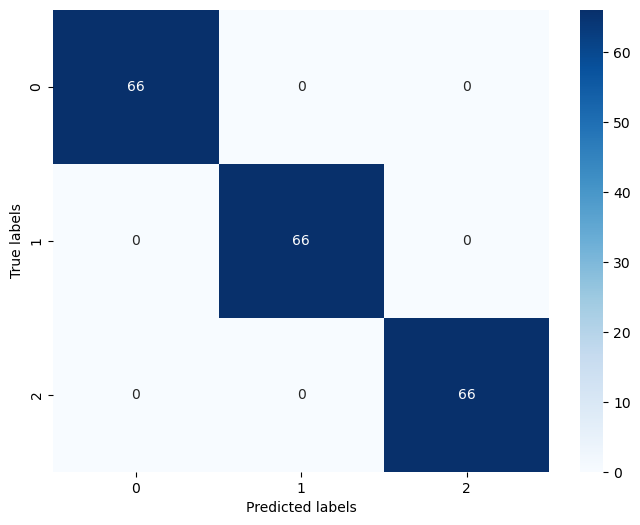

[array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.1206111 , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.20503886, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.09112838, 0.04556419, 0.18225677, 0.04556419, 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.08201555, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.22782096, 0.        , 0.        ,
         0.        , 0.        , 0.        ]]),
 array([[0.02686067, 0.        , 0.        , 0.        , 0.        ,
         

In [4]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
import seaborn as sns
from sklearn.model_selection import KFold
from lightgbm import log_evaluation, early_stopping
X = np.arange(0,201,3)
num = [29,34,20,90,50,18,9,18]
num1 = [0,29,63,83,173,223,241,250,268]
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
df = pd.read_csv("shen_268_parcellation_networklabels.csv",encoding="utf-8")
importance = {'medial frontal':0,'frontoparietal':0,'default mode':0,'subcortical-cerebellum':0,'motor':0,'visual I':0,'visual II':0,'visual association':0}
net_name = ['medial frontal','frontoparietal','default mode','subcortical-cerebellum','motor','visual I','visual II','visual association']

total_importance = []   
loo = LeaveOneOut()
for train_index , test_index in loo.split(X):  # 调用split方法切分数据
    train_x = train_X[X[train_index]]
    train_y = train_Y[X[train_index]]
    #print('train_index:%s , test_index: %s ' %(X[train_index],X[test_index]))
    #print(train_x,train_y)
    train_x = np.append(train_x,train_X[X[train_index]+1],axis=0)
    train_y = np.append(train_y,train_Y[X[train_index]+1],axis=0)
    #print(train_x,train_y,)
    train_x = np.append(train_x,train_X[X[train_index]+2],axis=0)
    train_y = np.append(train_y,train_Y[X[train_index]+2],axis=0)
    #print(train_x,train_y)
    test_x = train_X[X[test_index]]
    test_y = train_Y[X[test_index]]
    test_x = np.append(test_x,train_X[X[test_index]+1],axis=0)
    test_x = np.append(test_x,train_X[X[test_index]+2],axis=0)
    test_y = np.append(test_y,train_Y[X[test_index]+1],axis=0)
    test_y = np.append(test_y,train_Y[X[test_index]+2],axis=0)
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    best_depth = 3
    best_score = 0
    for max_depth in range(3,10):
        gbm = lgb.LGBMClassifier(num_class = 3,
                            max_depth = max_depth,
                            #lambda = 10,
                            subsample = 0.8,
                            colsample_bytree = 0.9,
                            min_child_weight = 4,
                            num_leaves = 8,
                            seed = 0,
                            reg_alpha = 1e-05,
                            learning_rate = 0.01, n_estimators=500,verbosity= -1)
        callbacks = [log_evaluation(period=1), early_stopping(stopping_rounds=10)]
        gbm.fit(train_x, train_y, eval_set=[(test_x, test_y)], callbacks=callbacks)
        pred_test_y = gbm.predict(test_x, num_iteration=gbm.best_iteration_)
        score = accuracy_score(test_y, pred_test_y)
        if score > best_score:
            best_score = score
            best_depth = max_depth
            
    gbm = lgb.LGBMClassifier(num_class = 3,
                            max_depth = best_depth,
                            #lambda = 10,
                            subsample = 0.8,
                            colsample_bytree = 0.9,
                            min_child_weight = 4,
                            num_leaves = 8,
                            seed = 0,
                            reg_alpha = 1e-05,
                            learning_rate = 0.01, n_estimators=500,verbosity= -1)
    callbacks = [log_evaluation(period=1), early_stopping(stopping_rounds=10)]
    gbm.fit(train_x, train_y, eval_set=[(test_x, test_y)], callbacks=callbacks)
    # 预测
    pred_test_y = gbm.predict(test_x, num_iteration=gbm.best_iteration_)
    pred_train_y = gbm.predict(train_x, num_iteration=gbm.best_iteration_)
    print ('Train Accuracy: %.4f' % accuracy_score(train_y,pred_train_y))
    print ('Test Accuracy: %.4f' % accuracy_score(test_y,pred_test_y))
    sum_acc += accuracy_score(test_y,pred_test_y)
    sum_pre += precision_score(test_y,pred_test_y,average='macro')
    sum_rec += recall_score(test_y,pred_test_y,average='macro')
    sum_f1 += f1_score(test_y,pred_test_y,average='macro')
    
    ## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
    confusion_matrix_result = confusion_matrix(pred_test_y,test_y)
    # 利用热力图对于结果进行可视化
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    confusion_matrix_result = confusion_matrix(pred_train_y,train_y)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    
    net_importance =  np.zeros((8,8))
    Node_importance = gbm.feature_importances_
    index = 0
    total = 0
    for i in range(8):
        for j in range(i+1):
            sum_importance = 0
            for k in range(num[i]):
                sum_importance += Node_importance[index]
                index += 1
            net_importance[i][j] = sum_importance/num[i]
            total += net_importance[i][j]
    for i in range(8):
        for j in range(i+1):
            net_importance[i][j] = net_importance[i][j]/total
    total_importance.append(net_importance)
    #break
total_importance

In [5]:
print(sum_acc/67,sum_pre/67,sum_rec/67,sum_f1/67)

0.5323383084577116 0.40878938640132667 0.5323383084577116 0.4485903814262025


In [6]:
all_im = []
for k in range(67):
    k_im = np.zeros(36)
    cnt = 0
    for i in range(8):
        for j in range(i+1):
            k_im[cnt] = total_importance[k][i][j]
            cnt += 1
    all_im.append(k_im)
with open('67net_importance_Light8v28.txt', 'a') as f:
    for k in range(67):
        for i in range(8):
            for j in range(i+1):
                tmp = str(total_importance[k][i][j])
                tmp += '\n'
                f.write(tmp)
with open('67net_importance_Light8v8.txt', 'a') as f:
    for k in range(67):
        for i in range(8):
            tmp = str(total_importance[k][i][i])
            tmp += '\n'
            f.write(tmp)
        tmp = str((all_im[k][2]+all_im[k][4]+all_im[k][7]+all_im[k][11]+all_im[k][16]+all_im[k][22]+all_im[k][29])/7)
        print(tmp)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][2]+all_im[k][5]+all_im[k][8]+all_im[k][12]+all_im[k][17]+all_im[k][23]+all_im[k][30])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][4]+all_im[k][5]+all_im[k][9]+all_im[k][13]+all_im[k][18]+all_im[k][24]+all_im[k][31])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][7]+all_im[k][8]+all_im[k][9]+all_im[k][14]+all_im[k][19]+all_im[k][25]+all_im[k][32])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][11]+all_im[k][12]+all_im[k][13]+all_im[k][14]+all_im[k][20]+all_im[k][26]+all_im[k][33])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][16]+all_im[k][17]+all_im[k][18]+all_im[k][19]+all_im[k][20]+all_im[k][27]+all_im[k][34])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][22]+all_im[k][23]+all_im[k][24]+all_im[k][25]+all_im[k][26]+all_im[k][27]+all_im[k][35])/7)
        tmp += '\n'
        f.write(tmp)
        tmp = str((all_im[k][29]+all_im[k][30]+all_im[k][31]+all_im[k][32]+all_im[k][33]+all_im[k][34]+all_im[k][35])/7)
        tmp += '\n'
        f.write(tmp)
    f.close()

0.02373932687521538
0.021325016138975257
0.004834902306532806
0.01250449874495077
0.0063055100912085965
0.021833461070983422
0.01939504347266041
0.022009585802262026
0.01846862033247307
0.020351431659231995
0.009821160814058991
0.042316627945569195
0.015185759627822542
0.015149056886705951
0.01750532556029133
0.021648103118230833
0.02138214828429399
0.02698977698920895
0.0
0.008217921506080177
0.017887936274725163
0.006103870562515149
0.0
0.0
0.026632568775609027
0.022315726539665272
0.0
0.0013035399968641006
0.0
0.024268079563939532
0.0
0.0
0.020593813459198893
0.007766033962202763
0.030931424354395356
0.012111273065743897
0.01667615245177235
0.011840884914259765
0.021611826278235272
0.020330861382973426
0.017515399615489157
0.0
0.026252123046947903
0.032692132228252346
0.019682497799561795
0.027804833140261578
0.023641546581243702
0.018516509282989452
0.022858242924980364
0.0
0.022750169909941224
0.01077156583620351
0.022470283828304523
0.024923516304990175
0.011535687081234595
0.009

In [27]:
import math
cnt = 0
net_importance = np.zeros((8,8))
net_variance = np.zeros(36)
net_score = np.zeros(36)
for i in range(8):
    for j in range(i+1):
        for k in range(67):
            net_score[cnt] += total_importance[k][i][j]
        net_score[cnt] /= 67
        net_importance[i][j] = net_score[cnt]
        cnt+=1
cnt = 0
for i in range(8):
    for j in range(i+1):
        for k in range(67):
            net_variance[cnt] += math.pow((total_importance[k][i][j] - net_score[cnt]),2)
        net_variance[cnt] /= 67
        net_variance[cnt] = math.sqrt(net_variance[cnt])
        cnt+=1

print(net_score)
print(net_variance)

[0.03916815 0.06110994 0.01043867 0.03291644 0.01744421 0.048433
 0.04959849 0.01606749 0.08097985 0.03118293 0.0074228  0.00816119
 0.06313832 0.02105303 0.02729457 0.02329798 0.04611684 0.03481602
 0.01083902 0.0236941  0.04450885 0.0061586  0.00835783 0.00511483
 0.02194261 0.02627029 0.01730827 0.00866855 0.02586861 0.00402024
 0.02567558 0.01699497 0.10162135 0.00957887 0.0215252  0.00321229]
[0.0389422  0.03697169 0.01616107 0.04017274 0.0225475  0.03918101
 0.01759746 0.01126845 0.0407242  0.01433584 0.00780381 0.00931166
 0.02398418 0.01711274 0.02315445 0.02836781 0.04166671 0.0467364
 0.01576222 0.02331444 0.04237573 0.01950452 0.01713064 0.01155616
 0.05465848 0.03644003 0.03536821 0.0154548  0.03891772 0.00825557
 0.04634205 0.02133278 0.0649306  0.01177725 0.02320453 0.00656207]


In [8]:
with open('net_importance_Light8v28.txt', 'a') as f:
    for k in range(36):
        tmp = str(net_score[k])
        tmp += '\n'
        f.write(tmp)
with open('net_importance_Light8v8.txt', 'a') as f:
    for i in range(8):
        tmp = str(net_importance[i][i])
        tmp += '\n'
        f.write(tmp)
    tmp = str((net_score[2]+net_score[4]+net_score[7]+net_score[11]+net_score[16]+net_score[22]+net_score[29])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[2]+net_score[5]+net_score[8]+net_score[12]+net_score[17]+net_score[23]+net_score[30])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[4]+net_score[5]+net_score[9]+net_score[13]+net_score[18]+net_score[24]+net_score[31])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[7]+net_score[8]+net_score[9]+net_score[14]+net_score[19]+net_score[25]+net_score[32])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[11]+net_score[12]+net_score[13]+net_score[14]+net_score[20]+net_score[26]+net_score[33])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[16]+net_score[17]+net_score[18]+net_score[19]+net_score[20]+net_score[27]+net_score[34])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[22]+net_score[23]+net_score[24]+net_score[25]+net_score[26]+net_score[27]+net_score[35])/7)
    tmp += '\n'
    f.write(tmp)
    tmp = str((net_score[29]+net_score[30]+net_score[31]+net_score[32]+net_score[33]+net_score[34]+net_score[35])/7)
    tmp += '\n'
    f.write(tmp)
    f.close()

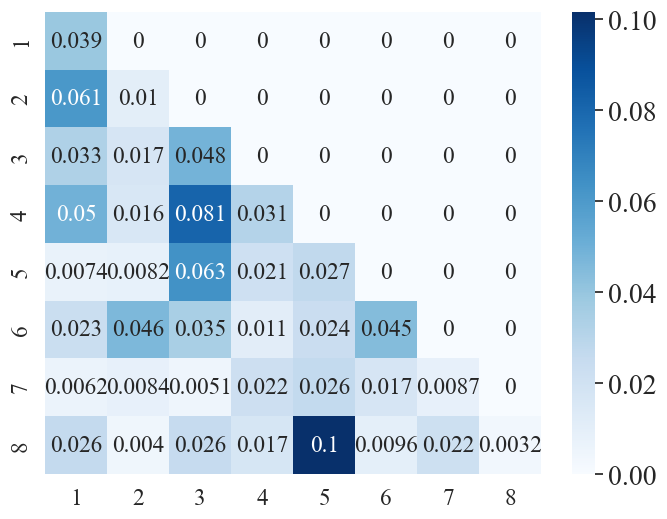

"\nplt.figure(figsize=(8, 6))\nplt.scatter(net_score,net_variance)\nfor i, name in enumerate(['a11','a21','a22','a31','a32','a33','a41','a42','a43','a44','a51','a52','a53','a54','a55','a61','a62','a63','a64','a65','a66',\n                          'a71','a72','a73','a74','a75','a76','a77','a81','a82','a83','a84','a85','a86','a87','a88']):\n    plt.annotate(name,(net_score[i],net_variance[i]))\nplt.title('LightGBM Scatter Plot',fontsize='xx-large',fontweight='heavy')\nplt.xlabel('Importance Score',fontsize=16)\nplt.ylabel('Standard Deviation',fontsize=16)\n\nx_line = np.linspace(0,0.12)\ny_line = x_line\nplt.plot(x_line, y_line, 'r--')\nplt.show()\n"

In [32]:

#x_ticks = ['medial frontal','frontoparietal','default mode','subcortical-cerebellum','motor','visual I','visual II','visual association']
#y_ticks = ['medial frontal','frontoparietal','default mode','subcortical-cerebellum','motor','visual I','visual II','visual association']
x_ticks = ['1','2','3','4','5','6','7','8']
y_ticks = ['1','2','3','4','5','6','7','8']

plt.figure(figsize=(8, 6))
sns.heatmap(net_importance,xticklabels=x_ticks, yticklabels=y_ticks, annot=True, cmap='Blues')#, linewidths=.5
sns.set_theme(style="whitegrid",font='Times New Roman',font_scale=1.4)
plt.xticks(fontsize=20,font='Times New Roman')
plt.yticks(fontsize=20,font='Times New Roman')
#设置colorbar的刻度字体大小
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)
plt.savefig('LightGBM_Heatmap.png', dpi=600, bbox_inches='tight')
plt.show()
'''
plt.figure(figsize=(8, 6))
plt.scatter(net_score,net_variance)
for i, name in enumerate(['a11','a21','a22','a31','a32','a33','a41','a42','a43','a44','a51','a52','a53','a54','a55','a61','a62','a63','a64','a65','a66',
                          'a71','a72','a73','a74','a75','a76','a77','a81','a82','a83','a84','a85','a86','a87','a88']):
    plt.annotate(name,(net_score[i],net_variance[i]))
plt.title('LightGBM Scatter Plot',fontsize='xx-large',fontweight='heavy')
plt.xlabel('Importance Score',fontsize=16)
plt.ylabel('Standard Deviation',fontsize=16)

x_line = np.linspace(0,0.12)
y_line = x_line
plt.plot(x_line, y_line, 'r--')
plt.show()
'''

In [10]:
net_between = 0
net_within = 0
for i in range(8):
    for j in range(i):
        net_between += net_importance[i][j]
for i in range(8):
    net_within += net_importance[i][i]
print(net_between,net_within)
print(net_between/28,net_within/8)

print(((net_between/28)/(net_within/8)))
print(sum_acc/67,sum_pre/67,sum_rec/67,sum_f1/67)

0.7870929996645636 0.2129070003354363
0.028110464273734415 0.026613375041929538
1.0562532647379825
0.5323383084577116 0.40878938640132667 0.5323383084577116 0.4485903814262025


In [11]:
for i in range(8):
    x = 0
    for j in range(8):
        x += net_importance[i][j]
    print(x)
sum_acc/67

0.039168153075547815
0.07154861502981413
0.0987936488180709
0.17782875500212372
0.12706990847473945
0.18327281341016483
0.09382098750038283
0.2084971186891563


0.5323383084577116